<a href="https://colab.research.google.com/github/mAbbaspour/Hyperparameter-Optimization/blob/main/med%20%26%20optuna%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [207]:
import torch
import torch.nn as nn
import torch.nn.functional as f
import numpy as np
import math;

In [5]:
from google.colab import files
uploaded = files.upload()
uploaded2 = files.upload()


Saving lipo(Lables).csv to lipo(Lables) (1).csv


Saving lipo_global_cdf_rdkit.csv to lipo_global_cdf_rdkit (1).csv


In [208]:
import random
random.seed(1)
import pandas as pd
import io
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [209]:
data = pd.read_csv(io.BytesIO(uploaded2['lipo_global_cdf_rdkit.csv']))
dataY = pd.read_csv(io.BytesIO(uploaded['lipo(Lables).csv']))
print(data[data.isnull().any(axis=1)])

      ('RDKit2DNormalized_calculated', <class 'bool'>)  \
1561                                              True   

      ('BalabanJ', <class 'numpy.float64'>)  \
1561                                  0.895   

      ('BertzCT', <class 'numpy.float64'>)  ('Chi0', <class 'numpy.float64'>)  \
1561                              0.230752                           0.031331   

      ('Chi0n', <class 'numpy.float64'>)  ('Chi0v', <class 'numpy.float64'>)  \
1561                            0.032387                            0.061726   

      ('Chi1', <class 'numpy.float64'>)  ('Chi1n', <class 'numpy.float64'>)  \
1561                           0.050799                            0.045963   

      ('Chi1v', <class 'numpy.float64'>)  ('Chi2n', <class 'numpy.float64'>)  \
1561                            0.116251                             0.04344   

      ...  ('fr_sulfonamd', <class 'numpy.float64'>)  \
1561  ...                               1.593061e-17   

      ('fr_sulfone', <class 'nu

In [210]:
data = data.drop(1561)
dataY = dataY.drop(1561)


In [211]:
arrayY = dataY.values
Y = arrayY[0: ,1 ]
array = data.values
X = array[0:,1:]

In [212]:
X_train, X_test ,Y_train , Y_test  = train_test_split(X, Y ,test_size=0.2)
scaler_data  = preprocessing.MinMaxScaler()
X_train = scaler_data.fit_transform(X_train)
X_test =  scaler_data.transform(X_test)
scaler_labels = preprocessing.MinMaxScaler()
Y_train = scaler_labels.fit_transform(Y_train.reshape(-1, 1))
Y_test = scaler_labels.transform(Y_test.reshape(-1, 1))


[1.91474461e-01 7.13030031e-02 6.05795345e-02 5.32003960e-02
 4.49900576e-02 4.26345394e-02 3.39114279e-02 3.08767138e-02
 2.69378689e-02 2.52713180e-02 2.19279229e-02 2.09080449e-02
 1.76472427e-02 1.73332261e-02 1.58191067e-02 1.50477975e-02
 1.45823823e-02 1.36123524e-02 1.32565053e-02 1.20481294e-02
 1.17159862e-02 1.03977082e-02 9.76276820e-03 9.33694112e-03
 8.76711175e-03 8.50898713e-03 8.19812059e-03 7.63257977e-03
 7.17219724e-03 6.88438715e-03 6.55831118e-03 6.24903864e-03
 6.08243701e-03 5.69140598e-03 5.47380485e-03 4.96464022e-03
 4.95056648e-03 4.86123279e-03 4.66984138e-03 4.42039230e-03
 4.26260106e-03 4.10749079e-03 4.02358477e-03 3.84099535e-03
 3.77209999e-03 3.52825139e-03 3.44870443e-03 3.27862557e-03
 3.15718120e-03 3.06469174e-03 2.91070124e-03 2.82629254e-03
 2.76916807e-03 2.73524105e-03 2.66641057e-03 2.55329008e-03
 2.48485366e-03 2.28381692e-03 2.21695025e-03 2.13910370e-03
 2.03096940e-03 1.96383057e-03 1.91025874e-03 1.84916711e-03
 1.81103201e-03 1.727445

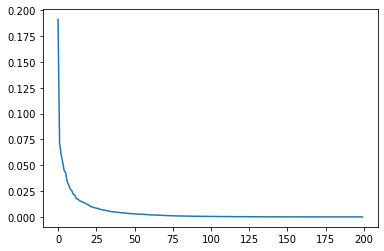

In [213]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=200)
pca.fit(X_train)
print(pca.explained_variance_ratio_)
plt.plot(np.arange(200),pca.explained_variance_ratio_)
plt.show()

In [214]:
pca = PCA(n_components=75)
pca.fit(X_train)
X_train=pca.transform(X_train)



X_test = pca.transform(X_test)


In [215]:
print(X_test.shape)
print(Y_test.shape)
print(X_train.shape)
print(Y_train.shape)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

(840, 75)
(840, 1)
(3359, 75)
(3359, 1)


In [216]:
Y_train_new =  Y_train.astype(np.float)
Y_test_new = Y_test.astype(np.float)
print(Y_train_new.shape)
print(Y_test_new.shape)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
tensor_x_train = torch.tensor(X_train, dtype=torch.float).to(device) 
tensor_x_test = torch.tensor(X_test, dtype=torch.float).to(device) 

tensor_y_train = torch.tensor(Y_train_new , dtype=torch.float).to(device)
tensor_y_test= torch.tensor(Y_test_new, dtype=torch.float).to(device)


(3359, 1)
(840, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [217]:
from torch.utils.data import TensorDataset
trainset = TensorDataset(tensor_x_train, tensor_y_train) 
testset = TensorDataset(tensor_x_test,tensor_y_test)

In [218]:
%%capture
try:
    import ray
except:
    !pip install -U ray
    import ray

In [219]:
from functools import partial
import numpy as np
import os
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import random_split
from torchsummary import summary

from ray import tune
# a = {"a":tune.quniform(50, 200, 10) , "b": 5}
# print(type(a.get("a")))
from ray.tune import CLIReporter
from ray.tune.schedulers import ASHAScheduler

In [220]:
def load_data(data_dir=None):
    return trainset, testset

In [221]:
# # Net().__init__(self , confing) 
#     config = {
#         "act1 ": tune.choice(["relu","tanh","selu"]),
#         "act2" : tune.choice(["relu","tanh","selu"]),
#         "act3" : tune.choice(["relu","tanh","selu"]),
#         "lr": tune.quniform(0.0005, 0.001, 0.0001),
#         "batch_size": tune.choice([8, 16, 32]),
#         "hidden_dim1" : tune.quniform(50, 200, 10),
#         "hidden_dim2" : tune.quniform(50, 200, 10),
#         "hidden_dim3" : tune.quniform(50, 200, 10),
#     }
#   self = { "confing": confing , "hd":}
class Net(nn.Module):
    def __init__(self, config):
        super().__init__()

        self.config = config
        self.hidden_dim1 = int(self.config.get("hidden_dim1", 100))
        self.hidden_dim2 = int(self.config.get("hidden_dim2", 100))
        self.hidden_dim3 = int(self.config.get("hidden_dim3", 100))

        self.act1 = self.config.get("act1", "relu") 
        self.act2 = self.config.get("act2", "relu") 
        self.act3 = self.config.get("act3", "relu")

        self.linear1 = nn.Linear(75, self.hidden_dim1)
        self.linear2 = nn.Linear(self.hidden_dim1, self.hidden_dim2)
        self.linear3 = nn.Linear(self.hidden_dim2, self.hidden_dim3)
        self.linear4 = nn.Linear(self.hidden_dim3, 1)
    
    @staticmethod
    def activation_func(act_str):
        if act_str=="tanh":
            return eval("torch."+act_str)
        elif act_str=="selu" or act_str=="relu":   
            return eval("torch.nn.functional."+act_str)

    def forward(self, x):
        output = self.linear1(x)
        output = self.activation_func(self.act1)(output)
        output = self.linear2(output)
        output = self.activation_func(self.act2)(output)
        output = self.linear3(output)
        output = self.activation_func(self.act3)(output)
        output = self.linear4(output)        
        return output

In [222]:
model = Net({})

In [223]:
from prettytable import PrettyTable

def count_parameters(model):
    table = PrettyTable(["Modules", "Parameters"])
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: continue
        param = parameter.numel()
        table.add_row([name, param])
        total_params+=param
    print(table)
    print(f"Total Trainable Params: {total_params}")
    return total_params

In [224]:
summary(model, (1,tensor_x_train.shape[1]))

count_parameters(model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 100]           7,600
            Linear-2               [-1, 1, 100]          10,100
            Linear-3               [-1, 1, 100]          10,100
            Linear-4                 [-1, 1, 1]             101
Total params: 27,901
Trainable params: 27,901
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.11
Estimated Total Size (MB): 0.11
----------------------------------------------------------------
+----------------+------------+
|    Modules     | Parameters |
+----------------+------------+
| linear1.weight |    7500    |
|  linear1.bias  |    100     |
| linear2.weight |   10000    |
|  linear2.bias  |    100     |
| linear3.weight |   10000    |
|  linear3.bias  |    100     |
| linear4.we

27901

In [225]:
def trainable_func(config, checkpoint_dir=None, data_dir=None, epochs=10):

    net = Net(config)

    device = "cpu"
    if torch.cuda.is_available():
        device = "cuda:0"
        if torch.cuda.device_count() > 1:
            net = nn.DataParallel(net)
    net.to(device)

    '''
    Define a loss function
    '''
    ## Classification
    # criterion = nn.CrossEntropyLoss()

    ## Regression
    criterion = nn.MSELoss(reduction='sum')

    # Define an optimizer 
    optimizer = optim.Adam(net.parameters(), lr=config.get("lr",0.0003))

    if checkpoint_dir:
        model_state, optimizer_state = torch.load(
            os.path.join(checkpoint_dir, "checkpoint"))
        net.load_state_dict(model_state)
        optimizer.load_state_dict(optimizer_state)

    # Load data
    trainset, testset = load_data(data_dir)

    # Split the dataset into training and validation sets
    train_size = int(len(trainset) * 0.8)
    train_subset, val_subset = random_split(trainset, [train_size, len(trainset) - train_size])

    # Define data loaders (which combines a dataset and a sampler, and provides an iterable over the given dataset)
    trainloader = torch.utils.data.DataLoader(
        train_subset,
        batch_size=int(config.get("batch_size",32)),
        shuffle=True,
        num_workers=2)
    valloader = torch.utils.data.DataLoader(
        val_subset,
        batch_size=int(config.get("batch_size",32)),
        shuffle=True,
        num_workers=2)

    for epoch in range(epochs):  # loop over the dataset multiple times
        epoch_train_loss = 0.0
        # epoch_steps = 0
        net.train() # Prepare model for training
        for i, data in enumerate(trainloader):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            '''
            Compute train loss without scaling to print
            ''' 
            # outputs = torch.tensor(scaler_labels.inverse_transform(outputs.detach().cpu())).to(device)    
            # labels = torch.tensor(scaler_labels.inverse_transform(labels.cpu())).to(device)  
            # loss_train = criterion(outputs, labels) 
            # epoch_train_loss += loss_train.detach().item()
        # print("[%d] loss: %.3f" % (epoch + 1, epoch_train_loss / len(train_subset)))

        # Validation loss
        val_loss = 0.0
        net.eval() # Prepare model for evaluation
        for i, data in enumerate(valloader):
            with torch.no_grad():
                inputs, labels = data
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = net(inputs)

                # Inverse transform of the labels' scaler
                outputs = torch.tensor(scaler_labels.inverse_transform(outputs.detach().cpu())).to(device)    
                labels = torch.tensor(scaler_labels.inverse_transform(labels.cpu())).to(device) 

                loss = criterion(outputs, labels)
                val_loss += loss.cpu().numpy()

        with tune.checkpoint_dir(epoch) as checkpoint_dir:
            path = os.path.join(checkpoint_dir, "checkpoint")
            torch.save((net.state_dict(), optimizer.state_dict()), path)

        tune.report(epoch = epoch, loss=(val_loss / len(val_subset)))
    print("Finished Training")

In [226]:
def test_score(config, net, device="cpu"):
    trainset, testset = load_data()

    testloader = torch.utils.data.DataLoader(
        testset, batch_size=int(config.get("batch_size",32)), shuffle=False, num_workers=2)
    
    ## Regression
    criterion = nn.MSELoss(reduction='sum')

    # Test loss
    test_loss = 0.0
    net.eval() # Prepare model for evaluation
    for i, data in enumerate(testloader):
        with torch.no_grad():
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = net(inputs)

            # Inverse transform of the labels' scaler
            outputs = torch.tensor(scaler_labels.inverse_transform(outputs.detach().cpu())).to(device)    
            labels = torch.tensor(scaler_labels.inverse_transform(labels.cpu())).to(device) 

            loss = criterion(outputs, labels)
            test_loss += loss.cpu().numpy()

    return test_loss / len(testset)

In [227]:
ray.shutdown()
ray.init() # Here we use ray.init() to evaluate available_resources for Ray
print(ray.available_resources())
ray.shutdown()  # Restart Ray defensively in case the ray connection is lost. 

# Start Ray runtime with specific resources (not nessesarily all resources)
# You can change this values based on your machine resources)
ray.init(num_cpus=2, num_gpus=0) 

"""Check Ray Tune is working properly (for trainable class)"""
# from ray.tune.utils import validate_save_restore
# validate_save_restore(Trainable)
# validate_save_restore(Trainable, use_object_store=True)
# print("Success!")
""""""

{'CPU': 2.0, 'node:172.28.0.2': 1.0, 'object_store_memory': 4011017011.0, 'memory': 8022034023.0}


''

In [228]:
%%capture

%pip install hpbandster ConfigSpace
!pip install hpbandster ConfigSpace
!pip install bayesian-optimization

In [229]:
ray.shutdown()
from ray.tune.schedulers import AsyncHyperBandScheduler
from ray.tune.suggest.hyperopt import HyperOptSearch
from ray.tune.suggest.bayesopt import BayesOptSearch
from ray.tune.suggest.hyperopt import HyperOptSearch
from ray.tune.schedulers import PopulationBasedTraining
ray.shutdown()
from ray.tune.schedulers import AsyncHyperBandScheduler
from ray.tune.suggest.hyperopt import HyperOptSearch
from ray.tune.suggest.bayesopt import BayesOptSearch
from ray.tune.suggest.hyperopt import HyperOptSearch
from ray.tune.schedulers import PopulationBasedTraining
from ray.tune.schedulers import MedianStoppingRule
def main(num_samples=10, max_num_epochs=10, gpus_per_trial=2):

    # define data directory here if you want to load data from files
    data_dir = os.path.abspath("./data")
    load_data(data_dir)

    # define the search space of hyperparameters
    config = {
        "act1 ": tune.choice(["relu","tanh","selu"]),
        "act2" : tune.choice(["relu","tanh","selu"]),
        "act3" : tune.choice(["relu","tanh","selu"]),
        "lr": tune.quniform(0.0005, 0.001, 0.0001),
        "batch_size": tune.choice([ 8,16, 32 , 64]),
        "hidden_dim1" : tune.quniform(120, 330, 15),
        "hidden_dim2" : tune.quniform(120, 330, 15),
        "hidden_dim3" : tune.quniform(120, 330, 15),
    }

    # Optuna search algorithm
    from ray.tune.suggest.optuna import OptunaSearch 
    from ray.tune.suggest import ConcurrencyLimiter
    search_alg = OptunaSearch(
        metric="loss", #or accuracy, etc.
        mode="min", #or max
        # seed = 42,
        # points_to_evaluate=[
        # {'lr': 0.0005, 'hidden_size': 150.0, 'readout1_out': 200.0, 'readout2_out': 180.0}
        # ],
        )
    search_alg = ConcurrencyLimiter(search_alg, max_concurrent=10)
    training_iteration = 50
    scheduler = MedianStoppingRule(
    time_attr="training_iteration",
    grace_period=10,
    min_samples_required=10,
    hard_stop = True,
    metric="loss", #or accuracy, etc.
    mode="min", #or max
    )
    
    reporter = CLIReporter(
        # parameter_columns=["l1", "l2", "lr", "batch_size"],
        metric_columns=["loss", "training_iteration"]
        )
    
    # wrap data loading and training for tuning using `partial` 
    # (note that there exist other methods for this purpose)
    result = tune.run(
        partial(trainable_func, data_dir=data_dir, epochs=max_num_epochs),
        scheduler=scheduler,
        search_alg=search_alg,
        num_samples=num_samples,
        config=config,
        verbose=2,
        checkpoint_score_attr="loss",
        checkpoint_freq=0,
        keep_checkpoints_num=1,
        # checkpoint_at_end=True,
        # reuse_actors=reuse_actors_status,
        progress_reporter=reporter,
        resources_per_trial={"cpu": 0.5, "gpu": gpus_per_trial},
        stop={"training_iteration": max_num_epochs},                
        )

    best_trial = result.get_best_trial("loss", "min", "last")
    print("Best trial config: {}".format(best_trial.config))
    print("Best trial final validation score: {}".format(
        best_trial.last_result["loss"]))

    best_trained_model = Net(best_trial.config)
    device = "cpu"
    if torch.cuda.is_available():
        device = "cuda:0"
        if gpus_per_trial > 1:
            best_trained_model = nn.DataParallel(best_trained_model)
    best_trained_model.to(device)

    best_checkpoint_dir = best_trial.checkpoint.value
    model_state, optimizer_state = torch.load(os.path.join(
        best_checkpoint_dir, "checkpoint"))
    best_trained_model.load_state_dict(model_state)

    test_score_value = test_score(best_trial.config, best_trained_model, device)
    print("Best trial test set score: {}".format(test_score_value))


if __name__ == "__main__":
    # You can change the number of GPUs per trial here:
    main(num_samples=50, max_num_epochs=50, gpus_per_trial=0)


2022-07-26 14:32:58,479	INFO tune.py:874 -- Initializing Ray automatically.For cluster usage or custom Ray initialization, call `ray.init(...)` before `tune.run`.
[I 2022-07-26 14:33:03,153] A new study created in memory with name: optuna
2022-07-26 14:33:03,158	WARNING callback.py:106 -- The TensorboardX logger cannot be instantiated because either TensorboardX or one of it's dependencies is not installed. Please make sure you have the latest version of TensorboardX installed: `pip install -U tensorboardx`


== Status ==
Current time: 2022-07-26 14:33:03 (running for 00:00:00.23)
Memory usage on this node: 1.4/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 0.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 1/50 (1 RUNNING)


== Status ==
Current time: 2022-07-26 14:33:08 (running for 00:00:05.41)
Memory usage on this node: 1.6/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 5/50 (1 PENDING, 4 RUNNING)


== Status ==
Current time: 2022-07-26 14:33:13 (running for 00:00:10.42)
Memory usage on this node: 2.0/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03


(func pid=269297) 2022-07-26 14:34:37,318	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db2426a8_1_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=315.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-33-03/checkpoint_tmp748678/./
(func pid=269297) 2022-07-26 14:34:37,318	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 29.592334508895874, '_episodes_total': None}


Trial trainable_func_024430e8 reported epoch=0,loss=0.6653445433007145,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 255.0, 'hidden_dim2': 120.0, 'hidden_dim3': 300.0}.
Trial trainable_func_f19bcd82 reported epoch=4,loss=0.6631050386073631,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 225.0, 'hidden_dim2': 315.0, 'hidden_dim3': 315.0}.
Trial trainable_func_db2426a8 reported epoch=0,loss=0.29133571783629314,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 315.0, 'hidden_dim2': 210.0, 'hidden_dim3': 300.0}.
== Status ==
Current time: 2022-07-26 14:34:39 (running for 00:01:36.43)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 Gi

(func pid=269297) 2022-07-26 14:34:40,298	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db2426a8_1_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=315.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-33-03/checkpoint_tmp76890b/./
(func pid=269297) 2022-07-26 14:34:40,298	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 11, '_timesteps_total': None, '_time_total': 31.846400260925293, '_episodes_total': None}


Trial trainable_func_f474cfe0 reported epoch=7,loss=0.5242180636202276,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 225.0, 'hidden_dim2': 210.0, 'hidden_dim3': 240.0}.


(func pid=269297) 2022-07-26 14:34:43,381	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db2426a8_1_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=315.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-33-03/checkpoint_tmp0a56ec/./
(func pid=269297) 2022-07-26 14:34:43,382	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 12, '_timesteps_total': None, '_time_total': 34.17213010787964, '_episodes_total': None}


Trial trainable_func_024430e8 reported epoch=2,loss=0.5301062155929511,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 255.0, 'hidden_dim2': 120.0, 'hidden_dim3': 300.0}.
== Status ==
Current time: 2022-07-26 14:34:45 (running for 00:01:42.17)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 10/50 (6 PAUSED, 4 RUNNING)


Trial trainable_func_db2426a8 reported epoch=0,loss=0.21774947918968834,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 315.0, 'hidden_dim2': 210.0, 'hidden_dim3': 300.0}.
Trial trainable_func_f19bcd82 reported epoch=5,loss=0.5839283207719979,should_checkpoint=True with parameters={'a

(func pid=269297) 2022-07-26 14:34:46,391	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db2426a8_1_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=315.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-33-03/checkpoint_tmpe0a6f5/./
(func pid=269297) 2022-07-26 14:34:46,392	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 13, '_timesteps_total': None, '_time_total': 36.6581084728241, '_episodes_total': None}


Trial trainable_func_f474cfe0 reported epoch=9,loss=0.533005521642772,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 225.0, 'hidden_dim2': 210.0, 'hidden_dim3': 240.0}.


(func pid=269297) 2022-07-26 14:34:49,028	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db2426a8_1_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=315.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-33-03/checkpoint_tmpfe5fb2/./
(func pid=269297) 2022-07-26 14:34:49,029	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 14, '_timesteps_total': None, '_time_total': 38.68879437446594, '_episodes_total': None}
(func pid=269252) 2022-07-26 14:34:49,698	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db477d10_2_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-33-03/checkpoint_tmpd31482/./
(func pid=269252) 2022-07-26 14:34:49,698	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps

Trial trainable_func_024430e8 reported epoch=4,loss=0.5334912725972776,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 255.0, 'hidden_dim2': 120.0, 'hidden_dim3': 300.0}.
Trial trainable_func_db2426a8 reported epoch=0,loss=0.19366065407504696,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 315.0, 'hidden_dim2': 210.0, 'hidden_dim3': 300.0}.
== Status ==
Current time: 2022-07-26 14:34:51 (running for 00:01:48.32)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 10/50 (6 PAUSED, 4 RUNNING)




(func pid=269297) 2022-07-26 14:34:52,004	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db2426a8_1_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=315.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-33-03/checkpoint_tmpe0e0f0/./
(func pid=269297) 2022-07-26 14:34:52,004	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 15, '_timesteps_total': None, '_time_total': 41.12573838233948, '_episodes_total': None}


Trial trainable_func_db477d10 reported epoch=0,loss=0.34101527283440747,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 240.0, 'hidden_dim2': 315.0, 'hidden_dim3': 165.0}.


(func pid=269252) 2022-07-26 14:34:52,689	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db477d10_2_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-33-03/checkpoint_tmp0876b0/./
(func pid=269252) 2022-07-26 14:34:52,690	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 11, '_timesteps_total': None, '_time_total': 30.209430932998657, '_episodes_total': None}


Trial trainable_func_f19bcd82 reported epoch=6,loss=0.5939055745414228,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 225.0, 'hidden_dim2': 315.0, 'hidden_dim3': 315.0}.


(func pid=269297) 2022-07-26 14:34:54,985	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db2426a8_1_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=315.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-33-03/checkpoint_tmpcab88e/./
(func pid=269297) 2022-07-26 14:34:54,985	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 16, '_timesteps_total': None, '_time_total': 43.38860607147217, '_episodes_total': None}
(func pid=269252) 2022-07-26 14:34:55,705	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db477d10_2_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-33-03/checkpoint_tmpf35b9d/./
(func pid=269252) 2022-07-26 14:34:55,705	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 12, '_timesteps

Trial trainable_func_024430e8 reported epoch=6,loss=0.5185944664542065,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 255.0, 'hidden_dim2': 120.0, 'hidden_dim3': 300.0}.
Trial trainable_func_db2426a8 reported epoch=0,loss=0.15183106598725113,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 315.0, 'hidden_dim2': 210.0, 'hidden_dim3': 300.0}.
== Status ==
Current time: 2022-07-26 14:34:57 (running for 00:01:54.13)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 10/50 (6 PAUSED, 4 RUNNING)


Trial trainable_func_db477d10 reported epoch=0,loss=0.21883861058624413,should_checkpoint=True with parameters={'

(func pid=269297) 2022-07-26 14:34:58,005	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db2426a8_1_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=315.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-33-03/checkpoint_tmp54b829/./
(func pid=269297) 2022-07-26 14:34:58,010	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 17, '_timesteps_total': None, '_time_total': 45.65672302246094, '_episodes_total': None}
(func pid=269252) 2022-07-26 14:34:58,738	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db477d10_2_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-33-03/checkpoint_tmpb2cee3/./
(func pid=269252) 2022-07-26 14:34:58,739	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 13, '_timesteps

Trial trainable_func_f19bcd82 reported epoch=7,loss=0.5832504789554575,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 225.0, 'hidden_dim2': 315.0, 'hidden_dim3': 315.0}.


(func pid=269297) 2022-07-26 14:35:01,033	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db2426a8_1_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=315.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-33-03/checkpoint_tmp9f0aeb/./
(func pid=269297) 2022-07-26 14:35:01,034	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 18, '_timesteps_total': None, '_time_total': 47.84490466117859, '_episodes_total': None}
(func pid=269252) 2022-07-26 14:35:01,577	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db477d10_2_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-33-03/checkpoint_tmpff0bf5/./
(func pid=269252) 2022-07-26 14:35:01,578	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 14, '_timesteps

Trial trainable_func_024430e8 reported epoch=8,loss=0.5280078268935205,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 255.0, 'hidden_dim2': 120.0, 'hidden_dim3': 300.0}.
Trial trainable_func_db2426a8 reported epoch=0,loss=0.11310800659798652,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 315.0, 'hidden_dim2': 210.0, 'hidden_dim3': 300.0}.
== Status ==
Current time: 2022-07-26 14:35:03 (running for 00:02:00.42)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 10/50 (6 PAUSED, 4 RUNNING)


Trial trainable_func_db477d10 reported epoch=0,loss=0.17316038826740396,should_checkpoint=True with parameters={'

(func pid=269297) 2022-07-26 14:35:04,146	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db2426a8_1_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=315.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-33-03/checkpoint_tmp53ced8/./
(func pid=269297) 2022-07-26 14:35:04,147	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 19, '_timesteps_total': None, '_time_total': 50.37172842025757, '_episodes_total': None}
(func pid=269252) 2022-07-26 14:35:04,782	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db477d10_2_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-33-03/checkpoint_tmp247324/./
(func pid=269252) 2022-07-26 14:35:04,782	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 15, '_timesteps

Trial trainable_func_db4df2bc reported epoch=0,loss=0.21987838443663837,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 255.0, 'hidden_dim2': 255.0, 'hidden_dim3': 285.0}.


(func pid=269252) 2022-07-26 14:35:07,640	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db477d10_2_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-33-03/checkpoint_tmpae3586/./
(func pid=269252) 2022-07-26 14:35:07,640	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 16, '_timesteps_total': None, '_time_total': 40.864792823791504, '_episodes_total': None}
(func pid=269322) 2022-07-26 14:35:08,262	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db4df2bc_3_act1=tanh,act2=relu,act3=selu,batch_size=64,hidden_dim1=255.0000,hidden_dim2=255.0000,hidden_dim3=285.00_2022-07-26_14-33-03/checkpoint_tmp5af6a7/./
(func pid=269322) 2022-07-26 14:35:08,263	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 11, '_timestep

Trial trainable_func_f19bcd82 reported epoch=8,loss=0.5669135747974,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 225.0, 'hidden_dim2': 315.0, 'hidden_dim3': 315.0}.
Trial trainable_func_db2426a8 reported epoch=0,loss=0.10323971103165175,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 315.0, 'hidden_dim2': 210.0, 'hidden_dim3': 300.0}.
== Status ==
Current time: 2022-07-26 14:35:09 (running for 00:02:05.88)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 10/50 (6 PAUSED, 4 RUNNING)




(func pid=269297) 2022-07-26 14:35:09,708	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db2426a8_1_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=315.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-33-03/checkpoint_tmp697115/./
(func pid=269297) 2022-07-26 14:35:09,709	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 21, '_timesteps_total': None, '_time_total': 54.488688468933105, '_episodes_total': None}


Trial trainable_func_db477d10 reported epoch=0,loss=0.13160350640726687,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 240.0, 'hidden_dim2': 315.0, 'hidden_dim3': 165.0}.


(func pid=269252) 2022-07-26 14:35:10,351	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db477d10_2_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-33-03/checkpoint_tmp43fec3/./
(func pid=269252) 2022-07-26 14:35:10,351	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 17, '_timesteps_total': None, '_time_total': 43.01494789123535, '_episodes_total': None}
(func pid=269322) 2022-07-26 14:35:11,013	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db4df2bc_3_act1=tanh,act2=relu,act3=selu,batch_size=64,hidden_dim1=255.0000,hidden_dim2=255.0000,hidden_dim3=285.00_2022-07-26_14-33-03/checkpoint_tmp345d1d/./
(func pid=269322) 2022-07-26 14:35:11,013	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 12, '_timesteps

Trial trainable_func_db4df2bc reported epoch=0,loss=0.17500496604318974,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 255.0, 'hidden_dim2': 255.0, 'hidden_dim3': 285.0}.


(func pid=269252) 2022-07-26 14:35:12,948	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db477d10_2_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-33-03/checkpoint_tmp5b2451/./
(func pid=269252) 2022-07-26 14:35:12,948	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 18, '_timesteps_total': None, '_time_total': 45.14921307563782, '_episodes_total': None}
(func pid=269322) 2022-07-26 14:35:13,514	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db4df2bc_3_act1=tanh,act2=relu,act3=selu,batch_size=64,hidden_dim1=255.0000,hidden_dim2=255.0000,hidden_dim3=285.00_2022-07-26_14-33-03/checkpoint_tmpdd354e/./
(func pid=269322) 2022-07-26 14:35:13,514	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 13, '_timesteps

Trial trainable_func_db2426a8 reported epoch=0,loss=0.10326474148934753,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 315.0, 'hidden_dim2': 210.0, 'hidden_dim3': 300.0}.
== Status ==
Current time: 2022-07-26 14:35:14 (running for 00:02:11.04)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 10/50 (6 PAUSED, 4 RUNNING)




(func pid=269297) 2022-07-26 14:35:14,738	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db2426a8_1_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=315.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-33-03/checkpoint_tmp4ac24d/./
(func pid=269297) 2022-07-26 14:35:14,738	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 23, '_timesteps_total': None, '_time_total': 58.289592027664185, '_episodes_total': None}


Trial trainable_func_db477d10 reported epoch=0,loss=0.11701951724995784,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 240.0, 'hidden_dim2': 315.0, 'hidden_dim3': 165.0}.


(func pid=269252) 2022-07-26 14:35:15,513	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db477d10_2_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-33-03/checkpoint_tmp2430d8/./
(func pid=269252) 2022-07-26 14:35:15,514	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 19, '_timesteps_total': None, '_time_total': 47.161128520965576, '_episodes_total': None}


Trial trainable_func_f19bcd82 reported epoch=9,loss=0.556973113669169,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 225.0, 'hidden_dim2': 315.0, 'hidden_dim3': 315.0}.


(func pid=269322) 2022-07-26 14:35:15,995	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db4df2bc_3_act1=tanh,act2=relu,act3=selu,batch_size=64,hidden_dim1=255.0000,hidden_dim2=255.0000,hidden_dim3=285.00_2022-07-26_14-33-03/checkpoint_tmp3fbaab/./
(func pid=269322) 2022-07-26 14:35:15,996	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 14, '_timesteps_total': None, '_time_total': 25.45484161376953, '_episodes_total': None}
(func pid=269253) 2022-07-26 14:35:16,718	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db547e7a_4_act1=selu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=225.0000,hidden_dim2=195.0000,hidden_dim3=255.00_2022-07-26_14-33-03/checkpoint_tmp3b3405/./
(func pid=269253) 2022-07-26 14:35:16,718	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps

Trial trainable_func_db4df2bc reported epoch=0,loss=0.10855891801164365,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 255.0, 'hidden_dim2': 255.0, 'hidden_dim3': 285.0}.
== Status ==
Current time: 2022-07-26 14:35:19 (running for 00:02:16.39)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 10/50 (6 PAUSED, 4 RUNNING)


Trial trainable_func_db547e7a reported epoch=0,loss=0.3578746186556505,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 225.0, 'hidden_dim2': 195.0, 'hidden_dim3': 255.0}.


(func pid=269322) 2022-07-26 14:35:19,975	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db4df2bc_3_act1=tanh,act2=relu,act3=selu,batch_size=64,hidden_dim1=255.0000,hidden_dim2=255.0000,hidden_dim3=285.00_2022-07-26_14-33-03/checkpoint_tmpefe8da/./
(func pid=269322) 2022-07-26 14:35:19,975	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 16, '_timesteps_total': None, '_time_total': 28.159597396850586, '_episodes_total': None}


Trial trainable_func_db2426a8 reported epoch=0,loss=0.07617674265086988,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 315.0, 'hidden_dim2': 210.0, 'hidden_dim3': 300.0}.


(func pid=269253) 2022-07-26 14:35:20,535	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db547e7a_4_act1=selu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=225.0000,hidden_dim2=195.0000,hidden_dim3=255.00_2022-07-26_14-33-03/checkpoint_tmp62d896/./
(func pid=269253) 2022-07-26 14:35:20,535	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 11, '_timesteps_total': None, '_time_total': 49.85613250732422, '_episodes_total': None}


Trial trainable_func_db477d10 reported epoch=0,loss=0.11190134977510245,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 240.0, 'hidden_dim2': 315.0, 'hidden_dim3': 165.0}.


(func pid=269297) 2022-07-26 14:35:21,010	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db2426a8_1_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=315.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-33-03/checkpoint_tmp60c2ce/./
(func pid=269297) 2022-07-26 14:35:21,010	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 25, '_timesteps_total': None, '_time_total': 62.57526183128357, '_episodes_total': None}
(func pid=269252) 2022-07-26 14:35:21,663	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db477d10_2_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-33-03/checkpoint_tmpe1c505/./
(func pid=269252) 2022-07-26 14:35:21,663	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 21, '_timesteps

== Status ==
Current time: 2022-07-26 14:35:25 (running for 00:02:21.98)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 10/50 (7 PAUSED, 3 RUNNING)




(func pid=269322) 2022-07-26 14:35:25,170	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db4df2bc_3_act1=tanh,act2=relu,act3=selu,batch_size=64,hidden_dim1=255.0000,hidden_dim2=255.0000,hidden_dim3=285.00_2022-07-26_14-33-03/checkpoint_tmp194f42/./
(func pid=269322) 2022-07-26 14:35:25,173	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 18, '_timesteps_total': None, '_time_total': 30.652228832244873, '_episodes_total': None}
(func pid=269297) 2022-07-26 14:35:25,936	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db2426a8_1_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=315.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-33-03/checkpoint_tmp05d1c6/./
(func pid=269297) 2022-07-26 14:35:25,936	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 27, '_timestep

Trial trainable_func_db477d10 reported epoch=0,loss=0.08669010792234404,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 240.0, 'hidden_dim2': 315.0, 'hidden_dim3': 165.0}.
Trial trainable_func_db4df2bc reported epoch=0,loss=0.05605292427023406,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 255.0, 'hidden_dim2': 255.0, 'hidden_dim3': 285.0}.


(func pid=269252) 2022-07-26 14:35:27,135	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db477d10_2_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-33-03/checkpoint_tmpa963ba/./
(func pid=269252) 2022-07-26 14:35:27,136	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 23, '_timesteps_total': None, '_time_total': 55.35532474517822, '_episodes_total': None}


Trial trainable_func_db547e7a reported epoch=0,loss=0.18959162071729355,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 225.0, 'hidden_dim2': 195.0, 'hidden_dim3': 255.0}.


(func pid=269322) 2022-07-26 14:35:27,561	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db4df2bc_3_act1=tanh,act2=relu,act3=selu,batch_size=64,hidden_dim1=255.0000,hidden_dim2=255.0000,hidden_dim3=285.00_2022-07-26_14-33-03/checkpoint_tmpba75ab/./
(func pid=269322) 2022-07-26 14:35:27,562	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 19, '_timesteps_total': None, '_time_total': 32.30175304412842, '_episodes_total': None}
(func pid=269253) 2022-07-26 14:35:28,216	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db547e7a_4_act1=selu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=225.0000,hidden_dim2=195.0000,hidden_dim3=255.00_2022-07-26_14-33-03/checkpoint_tmp17d5c4/./
(func pid=269253) 2022-07-26 14:35:28,216	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 13, '_timesteps

Trial trainable_func_db2426a8 reported epoch=0,loss=0.09433935907192773,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 315.0, 'hidden_dim2': 210.0, 'hidden_dim3': 300.0}.


(func pid=269297) 2022-07-26 14:35:28,850	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db2426a8_1_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=315.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-33-03/checkpoint_tmp8f5b59/./
(func pid=269297) 2022-07-26 14:35:28,858	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 28, '_timesteps_total': None, '_time_total': 68.16819477081299, '_episodes_total': None}
(func pid=269252) 2022-07-26 14:35:29,677	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db477d10_2_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-33-03/checkpoint_tmp922c4f/./
(func pid=269252) 2022-07-26 14:35:29,677	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 24, '_timesteps

== Status ==
Current time: 2022-07-26 14:35:30 (running for 00:02:27.22)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 10/50 (7 PAUSED, 3 RUNNING)




(func pid=269297) 2022-07-26 14:35:31,483	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db2426a8_1_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=315.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-33-03/checkpoint_tmpf20afe/./
(func pid=269297) 2022-07-26 14:35:31,483	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 29, '_timesteps_total': None, '_time_total': 70.15911412239075, '_episodes_total': None}


Trial trainable_func_db477d10 reported epoch=0,loss=0.08976672165688025,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 240.0, 'hidden_dim2': 315.0, 'hidden_dim3': 165.0}.


(func pid=269253) 2022-07-26 14:35:32,067	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db547e7a_4_act1=selu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=225.0000,hidden_dim2=195.0000,hidden_dim3=255.00_2022-07-26_14-33-03/checkpoint_tmpfa6d78/./
(func pid=269253) 2022-07-26 14:35:32,067	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 14, '_timesteps_total': None, '_time_total': 58.7537362575531, '_episodes_total': None}
(func pid=269322) 2022-07-26 14:35:32,560	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db4df2bc_3_act1=tanh,act2=relu,act3=selu,batch_size=64,hidden_dim1=255.0000,hidden_dim2=255.0000,hidden_dim3=285.00_2022-07-26_14-33-03/checkpoint_tmpdbd994/./
(func pid=269322) 2022-07-26 14:35:32,568	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 21, '_timesteps_

Trial trainable_func_db4df2bc reported epoch=0,loss=0.04223958216324038,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 255.0, 'hidden_dim2': 255.0, 'hidden_dim3': 285.0}.


(func pid=269252) 2022-07-26 14:35:33,210	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db477d10_2_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-33-03/checkpoint_tmpf1f0cf/./
(func pid=269252) 2022-07-26 14:35:33,210	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 25, '_timesteps_total': None, '_time_total': 59.29946231842041, '_episodes_total': None}
(func pid=269297) 2022-07-26 14:35:33,951	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db2426a8_1_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=315.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-33-03/checkpoint_tmp9ae120/./
(func pid=269297) 2022-07-26 14:35:33,951	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 30, '_timesteps

Trial trainable_func_db547e7a reported epoch=0,loss=0.16411768180534034,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 225.0, 'hidden_dim2': 195.0, 'hidden_dim3': 255.0}.


(func pid=269322) 2022-07-26 14:35:34,777	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db4df2bc_3_act1=tanh,act2=relu,act3=selu,batch_size=64,hidden_dim1=255.0000,hidden_dim2=255.0000,hidden_dim3=285.00_2022-07-26_14-33-03/checkpoint_tmpaf2847/./
(func pid=269322) 2022-07-26 14:35:34,777	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 22, '_timesteps_total': None, '_time_total': 36.715646266937256, '_episodes_total': None}


== Status ==
Current time: 2022-07-26 14:35:35 (running for 00:02:32.31)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 10/50 (7 PAUSED, 3 RUNNING)




(func pid=269253) 2022-07-26 14:35:35,484	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db547e7a_4_act1=selu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=225.0000,hidden_dim2=195.0000,hidden_dim3=255.00_2022-07-26_14-33-03/checkpoint_tmp4f5264/./
(func pid=269253) 2022-07-26 14:35:35,484	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 15, '_timesteps_total': None, '_time_total': 61.454813957214355, '_episodes_total': None}


Trial trainable_func_db2426a8 reported epoch=0,loss=0.05212533209592808,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 315.0, 'hidden_dim2': 210.0, 'hidden_dim3': 300.0}.


(func pid=269252) 2022-07-26 14:35:36,145	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db477d10_2_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-33-03/checkpoint_tmpa9fb1b/./
(func pid=269252) 2022-07-26 14:35:36,148	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 26, '_timesteps_total': None, '_time_total': 61.46951103210449, '_episodes_total': None}
(func pid=269297) 2022-07-26 14:35:36,679	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db2426a8_1_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=315.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-33-03/checkpoint_tmp0013c5/./
(func pid=269297) 2022-07-26 14:35:36,679	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 31, '_timesteps

Trial trainable_func_db477d10 reported epoch=0,loss=0.07083109289981102,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 240.0, 'hidden_dim2': 315.0, 'hidden_dim3': 165.0}.


(func pid=269252) 2022-07-26 14:35:38,938	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db477d10_2_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-33-03/checkpoint_tmpc00e3e/./
(func pid=269252) 2022-07-26 14:35:38,938	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 27, '_timesteps_total': None, '_time_total': 63.687256813049316, '_episodes_total': None}
(func pid=269322) 2022-07-26 14:35:39,254	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db4df2bc_3_act1=tanh,act2=relu,act3=selu,batch_size=64,hidden_dim1=255.0000,hidden_dim2=255.0000,hidden_dim3=285.00_2022-07-26_14-33-03/checkpoint_tmpbd1cca/./
(func pid=269322) 2022-07-26 14:35:39,254	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 24, '_timestep

== Status ==
Current time: 2022-07-26 14:35:40 (running for 00:02:37.34)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 10/50 (6 PAUSED, 4 RUNNING)


Trial trainable_func_db4df2bc reported epoch=0,loss=0.04993516090216671,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 255.0, 'hidden_dim2': 255.0, 'hidden_dim3': 285.0}.


(func pid=269322) 2022-07-26 14:35:40,982	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db4df2bc_3_act1=tanh,act2=relu,act3=selu,batch_size=64,hidden_dim1=255.0000,hidden_dim2=255.0000,hidden_dim3=285.00_2022-07-26_14-33-03/checkpoint_tmpcd9339/./
(func pid=269322) 2022-07-26 14:35:40,982	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 25, '_timesteps_total': None, '_time_total': 40.79509782791138, '_episodes_total': None}
(func pid=269252) 2022-07-26 14:35:41,746	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db477d10_2_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-33-03/checkpoint_tmp7aa0dd/./
(func pid=269252) 2022-07-26 14:35:41,747	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 28, '_timesteps

Trial trainable_func_db2426a8 reported epoch=0,loss=0.05969404585092634,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 315.0, 'hidden_dim2': 210.0, 'hidden_dim3': 300.0}.
Trial trainable_func_db547e7a reported epoch=0,loss=0.14186514530854813,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 225.0, 'hidden_dim2': 195.0, 'hidden_dim3': 255.0}.


(func pid=269297) 2022-07-26 14:35:42,799	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db2426a8_1_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=315.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-33-03/checkpoint_tmpee2a16/./
(func pid=269297) 2022-07-26 14:35:42,799	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 33, '_timesteps_total': None, '_time_total': 77.74542880058289, '_episodes_total': None}
(func pid=269322) 2022-07-26 14:35:43,377	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db4df2bc_3_act1=tanh,act2=relu,act3=selu,batch_size=64,hidden_dim1=255.0000,hidden_dim2=255.0000,hidden_dim3=285.00_2022-07-26_14-33-03/checkpoint_tmp9f13c8/./
(func pid=269322) 2022-07-26 14:35:43,377	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 26, '_timesteps

Trial trainable_func_db477d10 reported epoch=0,loss=0.07177924488458565,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 240.0, 'hidden_dim2': 315.0, 'hidden_dim3': 165.0}.


(func pid=269253) 2022-07-26 14:35:43,873	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db547e7a_4_act1=selu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=225.0000,hidden_dim2=195.0000,hidden_dim3=255.00_2022-07-26_14-33-03/checkpoint_tmpce8b66/./
(func pid=269253) 2022-07-26 14:35:43,874	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 17, '_timesteps_total': None, '_time_total': 67.22545337677002, '_episodes_total': None}
(func pid=269252) 2022-07-26 14:35:44,619	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db477d10_2_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-33-03/checkpoint_tmp0bac3f/./
(func pid=269252) 2022-07-26 14:35:44,620	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 29, '_timesteps

== Status ==
Current time: 2022-07-26 14:35:45 (running for 00:02:42.56)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 10/50 (7 PAUSED, 3 RUNNING)




(func pid=269252) 2022-07-26 14:35:47,104	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db477d10_2_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-33-03/checkpoint_tmp2a5efd/./
(func pid=269252) 2022-07-26 14:35:47,104	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 30, '_timesteps_total': None, '_time_total': 68.92164397239685, '_episodes_total': None}


Trial trainable_func_db2426a8 reported epoch=0,loss=0.062077146763005665,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 315.0, 'hidden_dim2': 210.0, 'hidden_dim3': 300.0}.


(func pid=269253) 2022-07-26 14:35:47,685	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db547e7a_4_act1=selu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=225.0000,hidden_dim2=195.0000,hidden_dim3=255.00_2022-07-26_14-33-03/checkpoint_tmp60d9bb/./
(func pid=269253) 2022-07-26 14:35:47,685	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 18, '_timesteps_total': None, '_time_total': 70.42681574821472, '_episodes_total': None}


Trial trainable_func_db4df2bc reported epoch=0,loss=0.033756949247565504,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 255.0, 'hidden_dim2': 255.0, 'hidden_dim3': 285.0}.


(func pid=269297) 2022-07-26 14:35:48,174	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db2426a8_1_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=315.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-33-03/checkpoint_tmp144502/./
(func pid=269297) 2022-07-26 14:35:48,174	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 35, '_timesteps_total': None, '_time_total': 81.77689695358276, '_episodes_total': None}


Trial trainable_func_db477d10 reported epoch=0,loss=0.1015898921491474,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 240.0, 'hidden_dim2': 315.0, 'hidden_dim3': 165.0}.


(func pid=269322) 2022-07-26 14:35:48,982	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db4df2bc_3_act1=tanh,act2=relu,act3=selu,batch_size=64,hidden_dim1=255.0000,hidden_dim2=255.0000,hidden_dim3=285.00_2022-07-26_14-33-03/checkpoint_tmpbc8f05/./
(func pid=269322) 2022-07-26 14:35:48,982	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 28, '_timesteps_total': None, '_time_total': 45.51440954208374, '_episodes_total': None}
(func pid=269252) 2022-07-26 14:35:50,259	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db477d10_2_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-33-03/checkpoint_tmpbf3ba7/./
(func pid=269252) 2022-07-26 14:35:50,259	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 31, '_timesteps

== Status ==
Current time: 2022-07-26 14:35:51 (running for 00:02:47.85)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 10/50 (6 PAUSED, 4 RUNNING)


Trial trainable_func_db547e7a reported epoch=0,loss=0.13561819721184123,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 225.0, 'hidden_dim2': 195.0, 'hidden_dim3': 255.0}.


(func pid=269297) 2022-07-26 14:35:51,495	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db2426a8_1_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=315.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-33-03/checkpoint_tmpe145ab/./
(func pid=269297) 2022-07-26 14:35:51,495	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 36, '_timesteps_total': None, '_time_total': 84.58793759346008, '_episodes_total': None}
(func pid=269253) 2022-07-26 14:35:51,949	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db547e7a_4_act1=selu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=225.0000,hidden_dim2=195.0000,hidden_dim3=255.00_2022-07-26_14-33-03/checkpoint_tmp1a45b5/./
(func pid=269253) 2022-07-26 14:35:51,949	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 19, '_timesteps

Trial trainable_func_db2426a8 reported epoch=0,loss=0.0456282040664436,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 315.0, 'hidden_dim2': 210.0, 'hidden_dim3': 300.0}.


(func pid=269322) 2022-07-26 14:35:52,511	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db4df2bc_3_act1=tanh,act2=relu,act3=selu,batch_size=64,hidden_dim1=255.0000,hidden_dim2=255.0000,hidden_dim3=285.00_2022-07-26_14-33-03/checkpoint_tmp84c9ac/./
(func pid=269322) 2022-07-26 14:35:52,511	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 29, '_timesteps_total': None, '_time_total': 47.7210578918457, '_episodes_total': None}
(func pid=269252) 2022-07-26 14:35:53,162	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db477d10_2_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-33-03/checkpoint_tmp83ccd5/./
(func pid=269252) 2022-07-26 14:35:53,162	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 32, '_timesteps_

Trial trainable_func_db4df2bc reported epoch=0,loss=0.033302963641814745,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 255.0, 'hidden_dim2': 255.0, 'hidden_dim3': 285.0}.


(func pid=269322) 2022-07-26 14:35:54,658	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db4df2bc_3_act1=tanh,act2=relu,act3=selu,batch_size=64,hidden_dim1=255.0000,hidden_dim2=255.0000,hidden_dim3=285.00_2022-07-26_14-33-03/checkpoint_tmpd37ff0/./
(func pid=269322) 2022-07-26 14:35:54,659	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 30, '_timesteps_total': None, '_time_total': 49.23813009262085, '_episodes_total': None}


Trial trainable_func_db477d10 reported epoch=0,loss=0.0579588539852313,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 240.0, 'hidden_dim2': 315.0, 'hidden_dim3': 165.0}.


(func pid=269253) 2022-07-26 14:35:55,639	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db547e7a_4_act1=selu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=225.0000,hidden_dim2=195.0000,hidden_dim3=255.00_2022-07-26_14-33-03/checkpoint_tmp8718c2/./
(func pid=269253) 2022-07-26 14:35:55,639	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 77.05369472503662, '_episodes_total': None}


== Status ==
Current time: 2022-07-26 14:35:56 (running for 00:02:53.00)
Memory usage on this node: 2.4/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 10/50 (7 PAUSED, 3 RUNNING)




(func pid=269252) 2022-07-26 14:35:56,206	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db477d10_2_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-33-03/checkpoint_tmp5eada7/./
(func pid=269252) 2022-07-26 14:35:56,206	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 33, '_timesteps_total': None, '_time_total': 74.13806438446045, '_episodes_total': None}
(func pid=269297) 2022-07-26 14:35:56,657	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db2426a8_1_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=315.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-33-03/checkpoint_tmp8ddc5d/./
(func pid=269297) 2022-07-26 14:35:56,657	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 38, '_timesteps

Trial trainable_func_db547e7a reported epoch=0,loss=0.1105884702018323,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 225.0, 'hidden_dim2': 195.0, 'hidden_dim3': 255.0}.


(func pid=269252) 2022-07-26 14:35:58,599	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db477d10_2_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-33-03/checkpoint_tmpeddf55/./
(func pid=269252) 2022-07-26 14:35:58,600	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 34, '_timesteps_total': None, '_time_total': 75.83427929878235, '_episodes_total': None}


Trial trainable_func_db2426a8 reported epoch=0,loss=0.04302994568595659,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 315.0, 'hidden_dim2': 210.0, 'hidden_dim3': 300.0}.
Trial trainable_func_db4df2bc reported epoch=0,loss=0.05068906788335831,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 255.0, 'hidden_dim2': 255.0, 'hidden_dim3': 285.0}.


(func pid=269253) 2022-07-26 14:35:59,141	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db547e7a_4_act1=selu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=225.0000,hidden_dim2=195.0000,hidden_dim3=255.00_2022-07-26_14-33-03/checkpoint_tmpb17baf/./
(func pid=269253) 2022-07-26 14:35:59,141	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 21, '_timesteps_total': None, '_time_total': 79.93286967277527, '_episodes_total': None}
(func pid=269297) 2022-07-26 14:35:59,562	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db2426a8_1_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=315.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-33-03/checkpoint_tmp475c0a/./
(func pid=269297) 2022-07-26 14:35:59,565	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 39, '_timesteps

== Status ==
Current time: 2022-07-26 14:36:01 (running for 00:02:58.55)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 10/50 (6 PAUSED, 4 RUNNING)




(func pid=269322) 2022-07-26 14:36:02,217	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db4df2bc_3_act1=tanh,act2=relu,act3=selu,batch_size=64,hidden_dim1=255.0000,hidden_dim2=255.0000,hidden_dim3=285.00_2022-07-26_14-33-03/checkpoint_tmpbe97d7/./
(func pid=269322) 2022-07-26 14:36:02,217	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 33, '_timesteps_total': None, '_time_total': 53.48370385169983, '_episodes_total': None}
(func pid=269297) 2022-07-26 14:36:02,629	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db2426a8_1_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=315.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-33-03/checkpoint_tmp091bce/./
(func pid=269297) 2022-07-26 14:36:02,630	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 40, '_timesteps

Trial trainable_func_db477d10 reported epoch=0,loss=0.05996112380933355,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 240.0, 'hidden_dim2': 315.0, 'hidden_dim3': 165.0}.


(func pid=269253) 2022-07-26 14:36:03,243	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db547e7a_4_act1=selu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=225.0000,hidden_dim2=195.0000,hidden_dim3=255.00_2022-07-26_14-33-03/checkpoint_tmp2d4551/./
(func pid=269253) 2022-07-26 14:36:03,243	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 22, '_timesteps_total': None, '_time_total': 83.00241780281067, '_episodes_total': None}
(func pid=269252) 2022-07-26 14:36:03,840	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db477d10_2_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-33-03/checkpoint_tmpd7e122/./
(func pid=269252) 2022-07-26 14:36:03,840	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 36, '_timesteps

Trial trainable_func_db2426a8 reported epoch=0,loss=0.04597572037392835,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 315.0, 'hidden_dim2': 210.0, 'hidden_dim3': 300.0}.


(func pid=269322) 2022-07-26 14:36:04,493	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db4df2bc_3_act1=tanh,act2=relu,act3=selu,batch_size=64,hidden_dim1=255.0000,hidden_dim2=255.0000,hidden_dim3=285.00_2022-07-26_14-33-03/checkpoint_tmp633a87/./
(func pid=269322) 2022-07-26 14:36:04,493	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 34, '_timesteps_total': None, '_time_total': 54.66410732269287, '_episodes_total': None}
(func pid=269297) 2022-07-26 14:36:05,260	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db2426a8_1_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=315.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-33-03/checkpoint_tmpd1a8f4/./
(func pid=269297) 2022-07-26 14:36:05,260	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 41, '_timesteps

Trial trainable_func_db4df2bc reported epoch=0,loss=0.03872798621928213,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 255.0, 'hidden_dim2': 255.0, 'hidden_dim3': 285.0}.


(func pid=269322) 2022-07-26 14:36:06,471	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db4df2bc_3_act1=tanh,act2=relu,act3=selu,batch_size=64,hidden_dim1=255.0000,hidden_dim2=255.0000,hidden_dim3=285.00_2022-07-26_14-33-03/checkpoint_tmp4db4d1/./
(func pid=269322) 2022-07-26 14:36:06,471	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 35, '_timesteps_total': None, '_time_total': 56.186460733413696, '_episodes_total': None}


== Status ==
Current time: 2022-07-26 14:36:07 (running for 00:03:03.87)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 10/50 (7 PAUSED, 3 RUNNING)


Trial trainable_func_db547e7a reported epoch=0,loss=0.08254191716640163,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 225.0, 'hidden_dim2': 195.0, 'hidden_dim3': 255.0}.


(func pid=269252) 2022-07-26 14:36:07,050	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db477d10_2_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-33-03/checkpoint_tmp740bab/./
(func pid=269252) 2022-07-26 14:36:07,050	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 37, '_timesteps_total': None, '_time_total': 81.54549741744995, '_episodes_total': None}
(func pid=269253) 2022-07-26 14:36:07,576	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db547e7a_4_act1=selu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=225.0000,hidden_dim2=195.0000,hidden_dim3=255.00_2022-07-26_14-33-03/checkpoint_tmp9ee8b3/./
(func pid=269253) 2022-07-26 14:36:07,576	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 23, '_timesteps

Trial trainable_func_db477d10 reported epoch=0,loss=0.05112777779373773,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 240.0, 'hidden_dim2': 315.0, 'hidden_dim3': 165.0}.


(func pid=269322) 2022-07-26 14:36:08,835	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db4df2bc_3_act1=tanh,act2=relu,act3=selu,batch_size=64,hidden_dim1=255.0000,hidden_dim2=255.0000,hidden_dim3=285.00_2022-07-26_14-33-03/checkpoint_tmp54860a/./
(func pid=269322) 2022-07-26 14:36:08,835	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 36, '_timesteps_total': None, '_time_total': 57.42016077041626, '_episodes_total': None}
(func pid=269252) 2022-07-26 14:36:09,443	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db477d10_2_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-33-03/checkpoint_tmp0383dd/./
(func pid=269252) 2022-07-26 14:36:09,443	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 38, '_timesteps

Trial trainable_func_db2426a8 reported epoch=0,loss=0.03800985623876416,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 315.0, 'hidden_dim2': 210.0, 'hidden_dim3': 300.0}.


(func pid=269322) 2022-07-26 14:36:10,822	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db4df2bc_3_act1=tanh,act2=relu,act3=selu,batch_size=64,hidden_dim1=255.0000,hidden_dim2=255.0000,hidden_dim3=285.00_2022-07-26_14-33-03/checkpoint_tmp214117/./
(func pid=269322) 2022-07-26 14:36:10,822	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 37, '_timesteps_total': None, '_time_total': 59.02884912490845, '_episodes_total': None}
(func pid=269297) 2022-07-26 14:36:11,373	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db2426a8_1_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=315.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-33-03/checkpoint_tmp09c1bf/./
(func pid=269297) 2022-07-26 14:36:11,373	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 43, '_timesteps

== Status ==
Current time: 2022-07-26 14:36:12 (running for 00:03:09.00)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 10/50 (7 PAUSED, 3 RUNNING)


Trial trainable_func_db4df2bc reported epoch=0,loss=0.03671996214196748,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 255.0, 'hidden_dim2': 255.0, 'hidden_dim3': 285.0}.


(func pid=269322) 2022-07-26 14:36:12,870	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db4df2bc_3_act1=tanh,act2=relu,act3=selu,batch_size=64,hidden_dim1=255.0000,hidden_dim2=255.0000,hidden_dim3=285.00_2022-07-26_14-33-03/checkpoint_tmp69acc7/./
(func pid=269322) 2022-07-26 14:36:12,871	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 38, '_timesteps_total': None, '_time_total': 59.96892690658569, '_episodes_total': None}
(func pid=269297) 2022-07-26 14:36:13,836	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db2426a8_1_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=315.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-33-03/checkpoint_tmp5d8201/./
(func pid=269297) 2022-07-26 14:36:13,837	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 44, '_timesteps

Trial trainable_func_db477d10 reported epoch=0,loss=0.05774699834462321,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 240.0, 'hidden_dim2': 315.0, 'hidden_dim3': 165.0}.
Trial trainable_func_db547e7a reported epoch=0,loss=0.07716714934729697,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 225.0, 'hidden_dim2': 195.0, 'hidden_dim3': 255.0}.


(func pid=269252) 2022-07-26 14:36:14,909	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db477d10_2_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-33-03/checkpoint_tmpea4ff8/./
(func pid=269252) 2022-07-26 14:36:14,909	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 40, '_timesteps_total': None, '_time_total': 87.1325113773346, '_episodes_total': None}
(func pid=269253) 2022-07-26 14:36:15,953	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db547e7a_4_act1=selu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=225.0000,hidden_dim2=195.0000,hidden_dim3=255.00_2022-07-26_14-33-03/checkpoint_tmpda0aea/./
(func pid=269253) 2022-07-26 14:36:15,953	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 25, '_timesteps_

Trial trainable_func_db2426a8 reported epoch=0,loss=0.05680664106584537,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 315.0, 'hidden_dim2': 210.0, 'hidden_dim3': 300.0}.


(func pid=269322) 2022-07-26 14:36:16,661	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db4df2bc_3_act1=tanh,act2=relu,act3=selu,batch_size=64,hidden_dim1=255.0000,hidden_dim2=255.0000,hidden_dim3=285.00_2022-07-26_14-33-03/checkpoint_tmpcf8edf/./
(func pid=269322) 2022-07-26 14:36:16,661	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 39, '_timesteps_total': None, '_time_total': 61.42784333229065, '_episodes_total': None}
(func pid=269297) 2022-07-26 14:36:17,802	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db2426a8_1_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=315.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-33-03/checkpoint_tmpbfbbd2/./
(func pid=269297) 2022-07-26 14:36:17,803	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 45, '_timesteps

== Status ==
Current time: 2022-07-26 14:36:17 (running for 00:03:14.61)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 10/50 (7 PAUSED, 3 RUNNING)


Trial trainable_func_db4df2bc reported epoch=0,loss=0.04267485683624069,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 255.0, 'hidden_dim2': 255.0, 'hidden_dim3': 285.0}.


(func pid=269252) 2022-07-26 14:36:18,791	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db477d10_2_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-33-03/checkpoint_tmp76bc20/./
(func pid=269252) 2022-07-26 14:36:18,791	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 41, '_timesteps_total': None, '_time_total': 90.29083371162415, '_episodes_total': None}
(func pid=269322) 2022-07-26 14:36:19,637	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db4df2bc_3_act1=tanh,act2=relu,act3=selu,batch_size=64,hidden_dim1=255.0000,hidden_dim2=255.0000,hidden_dim3=285.00_2022-07-26_14-33-03/checkpoint_tmpc20309/./
(func pid=269322) 2022-07-26 14:36:19,637	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 40, '_timesteps

Trial trainable_func_db547e7a reported epoch=0,loss=0.08447510422103771,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 225.0, 'hidden_dim2': 195.0, 'hidden_dim3': 255.0}.


(func pid=269253) 2022-07-26 14:36:20,674	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db547e7a_4_act1=selu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=225.0000,hidden_dim2=195.0000,hidden_dim3=255.00_2022-07-26_14-33-03/checkpoint_tmpafdf77/./
(func pid=269253) 2022-07-26 14:36:20,674	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 26, '_timesteps_total': None, '_time_total': 96.42192268371582, '_episodes_total': None}


Trial trainable_func_db477d10 reported epoch=0,loss=0.04552659914400222,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 240.0, 'hidden_dim2': 315.0, 'hidden_dim3': 165.0}.


(func pid=269297) 2022-07-26 14:36:21,133	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db2426a8_1_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=315.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-33-03/checkpoint_tmp79121f/./
(func pid=269297) 2022-07-26 14:36:21,134	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 46, '_timesteps_total': None, '_time_total': 105.52133131027222, '_episodes_total': None}
(func pid=269322) 2022-07-26 14:36:21,716	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db4df2bc_3_act1=tanh,act2=relu,act3=selu,batch_size=64,hidden_dim1=255.0000,hidden_dim2=255.0000,hidden_dim3=285.00_2022-07-26_14-33-03/checkpoint_tmpa62a72/./
(func pid=269322) 2022-07-26 14:36:21,716	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 41, '_timestep

== Status ==
Current time: 2022-07-26 14:36:23 (running for 00:03:20.04)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 10/50 (6 PAUSED, 4 RUNNING)


Trial trainable_func_db2426a8 reported epoch=0,loss=0.04406749732836244,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 315.0, 'hidden_dim2': 210.0, 'hidden_dim3': 300.0}.


(func pid=269322) 2022-07-26 14:36:23,584	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db4df2bc_3_act1=tanh,act2=relu,act3=selu,batch_size=64,hidden_dim1=255.0000,hidden_dim2=255.0000,hidden_dim3=285.00_2022-07-26_14-33-03/checkpoint_tmp2c8fa2/./
(func pid=269322) 2022-07-26 14:36:23,584	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 42, '_timesteps_total': None, '_time_total': 66.23160338401794, '_episodes_total': None}
(func pid=269297) 2022-07-26 14:36:23,962	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db2426a8_1_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=315.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-33-03/checkpoint_tmp04c979/./
(func pid=269297) 2022-07-26 14:36:23,966	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 47, '_timesteps

Trial trainable_func_db4df2bc reported epoch=0,loss=0.03628009038046048,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 255.0, 'hidden_dim2': 255.0, 'hidden_dim3': 285.0}.


(func pid=269252) 2022-07-26 14:36:25,281	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db477d10_2_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-33-03/checkpoint_tmp4d96e7/./
(func pid=269252) 2022-07-26 14:36:25,281	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 43, '_timesteps_total': None, '_time_total': 94.29427361488342, '_episodes_total': None}
(func pid=269322) 2022-07-26 14:36:26,032	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db4df2bc_3_act1=tanh,act2=relu,act3=selu,batch_size=64,hidden_dim1=255.0000,hidden_dim2=255.0000,hidden_dim3=285.00_2022-07-26_14-33-03/checkpoint_tmp11a389/./
(func pid=269322) 2022-07-26 14:36:26,042	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 43, '_timesteps

Trial trainable_func_db477d10 reported epoch=0,loss=0.04774502352263879,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 240.0, 'hidden_dim2': 315.0, 'hidden_dim3': 165.0}.
Trial trainable_func_db547e7a reported epoch=0,loss=0.06944335792919688,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 225.0, 'hidden_dim2': 195.0, 'hidden_dim3': 255.0}.


(func pid=269252) 2022-07-26 14:36:28,003	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db477d10_2_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-33-03/checkpoint_tmp1a0431/./
(func pid=269252) 2022-07-26 14:36:28,004	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 44, '_timesteps_total': None, '_time_total': 96.57134652137756, '_episodes_total': None}


== Status ==
Current time: 2022-07-26 14:36:28 (running for 00:03:25.20)
Memory usage on this node: 2.4/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 10/50 (7 PAUSED, 3 RUNNING)




(func pid=269253) 2022-07-26 14:36:28,391	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db547e7a_4_act1=selu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=225.0000,hidden_dim2=195.0000,hidden_dim3=255.00_2022-07-26_14-33-03/checkpoint_tmp57ae8e/./
(func pid=269253) 2022-07-26 14:36:28,392	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 28, '_timesteps_total': None, '_time_total': 102.48899555206299, '_episodes_total': None}


Trial trainable_func_db2426a8 reported epoch=0,loss=0.04044979156032983,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 315.0, 'hidden_dim2': 210.0, 'hidden_dim3': 300.0}.


(func pid=269322) 2022-07-26 14:36:28,987	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db4df2bc_3_act1=tanh,act2=relu,act3=selu,batch_size=64,hidden_dim1=255.0000,hidden_dim2=255.0000,hidden_dim3=285.00_2022-07-26_14-33-03/checkpoint_tmp65b0bc/./
(func pid=269322) 2022-07-26 14:36:28,988	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 44, '_timesteps_total': None, '_time_total': 69.38054156303406, '_episodes_total': None}
(func pid=269297) 2022-07-26 14:36:29,721	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db2426a8_1_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=315.0000,hidden_dim2=210.0000,hidden_dim3=300.00_2022-07-26_14-33-03/checkpoint_tmp0b2ff3/./
(func pid=269297) 2022-07-26 14:36:29,721	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 49, '_timesteps

Trial trainable_func_db4df2bc reported epoch=0,loss=0.031835766383043466,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 255.0, 'hidden_dim2': 255.0, 'hidden_dim3': 285.0}.


(func pid=269252) 2022-07-26 14:36:30,572	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db477d10_2_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-33-03/checkpoint_tmp01a4b4/./
(func pid=269252) 2022-07-26 14:36:30,572	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 45, '_timesteps_total': None, '_time_total': 98.57118487358093, '_episodes_total': None}
(func pid=269322) 2022-07-26 14:36:31,401	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db4df2bc_3_act1=tanh,act2=relu,act3=selu,batch_size=64,hidden_dim1=255.0000,hidden_dim2=255.0000,hidden_dim3=285.00_2022-07-26_14-33-03/checkpoint_tmp64e18e/./
(func pid=269322) 2022-07-26 14:36:31,401	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 45, '_timesteps

Trial trainable_func_db2426a8 reported epoch=0,loss=0.03811114635633227,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 315.0, 'hidden_dim2': 210.0, 'hidden_dim3': 300.0}. This trial completed.


(func pid=269253) 2022-07-26 14:36:32,428	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db547e7a_4_act1=selu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=225.0000,hidden_dim2=195.0000,hidden_dim3=255.00_2022-07-26_14-33-03/checkpoint_tmp9b51e0/./
(func pid=269253) 2022-07-26 14:36:32,428	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 29, '_timesteps_total': None, '_time_total': 105.85711312294006, '_episodes_total': None}
(func pid=269252) 2022-07-26 14:36:33,208	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db477d10_2_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-33-03/checkpoint_tmp168d3d/./
(func pid=269252) 2022-07-26 14:36:33,209	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 46, '_timestep

== Status ==
Current time: 2022-07-26 14:36:33 (running for 00:03:30.51)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 11/50 (7 PAUSED, 3 RUNNING, 1 TERMINATED)


Trial trainable_func_57dafa64 reported epoch=0,loss=0.9487894519732372,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 120.0, 'hidden_dim2': 150.0, 'hidden_dim3': 330.0}.
Trial trainable_func_db477d10 reported epoch=0,loss=0.0738113455409718,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 240.0, 'hidden_dim2': 315.0, 'hidden_dim3': 165.0}.
Trial trainable_func_db547e7a reported epoch=0,loss=0.07302968000499753,should_checkpoint=True with parameters={'act

(func pid=269322) 2022-07-26 14:36:35,904	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db4df2bc_3_act1=tanh,act2=relu,act3=selu,batch_size=64,hidden_dim1=255.0000,hidden_dim2=255.0000,hidden_dim3=285.00_2022-07-26_14-33-03/checkpoint_tmp470b1b/./
(func pid=269322) 2022-07-26 14:36:35,905	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 47, '_timesteps_total': None, '_time_total': 73.9717948436737, '_episodes_total': None}
(func pid=269252) 2022-07-26 14:36:36,198	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db477d10_2_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-33-03/checkpoint_tmp878182/./
(func pid=269252) 2022-07-26 14:36:36,198	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 47, '_timesteps_

Trial trainable_func_db4df2bc reported epoch=0,loss=0.025764938780525225,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 255.0, 'hidden_dim2': 255.0, 'hidden_dim3': 285.0}.


(func pid=269322) 2022-07-26 14:36:37,640	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db4df2bc_3_act1=tanh,act2=relu,act3=selu,batch_size=64,hidden_dim1=255.0000,hidden_dim2=255.0000,hidden_dim3=285.00_2022-07-26_14-33-03/checkpoint_tmp533049/./
(func pid=269322) 2022-07-26 14:36:37,641	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 48, '_timesteps_total': None, '_time_total': 75.0399751663208, '_episodes_total': None}
(func pid=269252) 2022-07-26 14:36:38,444	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db477d10_2_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=240.0000,hidden_dim2=315.0000,hidden_dim3=165.00_2022-07-26_14-33-03/checkpoint_tmp5b5d77/./
(func pid=269252) 2022-07-26 14:36:38,450	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 48, '_timesteps_

== Status ==
Current time: 2022-07-26 14:36:39 (running for 00:03:36.00)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 11/50 (6 PAUSED, 4 RUNNING, 1 TERMINATED)


Trial trainable_func_57dafa64 reported epoch=4,loss=0.5432327996509125,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 120.0, 'hidden_dim2': 150.0, 'hidden_dim3': 330.0}.


(func pid=269322) 2022-07-26 14:36:39,817	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db4df2bc_3_act1=tanh,act2=relu,act3=selu,batch_size=64,hidden_dim1=255.0000,hidden_dim2=255.0000,hidden_dim3=285.00_2022-07-26_14-33-03/checkpoint_tmp698710/./
(func pid=269322) 2022-07-26 14:36:39,817	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 49, '_timesteps_total': None, '_time_total': 76.53936576843262, '_episodes_total': None}
(func pid=269253) 2022-07-26 14:36:40,602	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db547e7a_4_act1=selu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=225.0000,hidden_dim2=195.0000,hidden_dim3=255.00_2022-07-26_14-33-03/checkpoint_tmpb47992/./
(func pid=269253) 2022-07-26 14:36:40,602	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 31, '_timesteps

Trial trainable_func_db4df2bc reported epoch=0,loss=0.022743515355938236,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 255.0, 'hidden_dim2': 255.0, 'hidden_dim3': 285.0}. This trial completed.
Trial trainable_func_db477d10 reported epoch=0,loss=0.053590074823956425,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 240.0, 'hidden_dim2': 315.0, 'hidden_dim3': 165.0}. This trial completed.
Trial trainable_func_5d45b2a0 reported epoch=0,loss=0.8074613770347993,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 195.0, 'hidden_dim2': 315.0, 'hidden_dim3': 150.0}.
Trial trainable_func_db547e7a reported epoch=0,loss=0.0626595059468006,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'relu', '

(func pid=269253) 2022-07-26 14:36:45,186	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db547e7a_4_act1=selu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=225.0000,hidden_dim2=195.0000,hidden_dim3=255.00_2022-07-26_14-33-03/checkpoint_tmpc425e4/./
(func pid=269253) 2022-07-26 14:36:45,189	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 32, '_timesteps_total': None, '_time_total': 116.18374466896057, '_episodes_total': None}
(func pid=269297) 2022-07-26 14:36:48,523	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db5c1630_5_act1=relu,act2=relu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=210.00_2022-07-26_14-33-40/checkpoint_tmp498817/./
(func pid=269297) 2022-07-26 14:36:48,523	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timestep

Trial trainable_func_5d45b2a0 reported epoch=3,loss=0.5773612435739588,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 195.0, 'hidden_dim2': 315.0, 'hidden_dim3': 150.0}.
== Status ==
Current time: 2022-07-26 14:36:50 (running for 00:03:47.35)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 13/50 (6 PAUSED, 4 RUNNING, 3 TERMINATED)


Trial trainable_func_5e4b47b4 reported epoch=0,loss=0.7656173795711515,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 315.0, 'hidden_dim2': 285.0, 'hidden_dim3': 165.0}.
Trial trainable_func_db5c1630 reported epoch=0,loss=0.19931235659460744,should_checkpoint=True with p

(func pid=269297) 2022-07-26 14:36:53,012	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db5c1630_5_act1=relu,act2=relu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=210.00_2022-07-26_14-33-40/checkpoint_tmp213ebd/./
(func pid=269297) 2022-07-26 14:36:53,013	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 11, '_timesteps_total': None, '_time_total': 54.16748094558716, '_episodes_total': None}
(func pid=269253) 2022-07-26 14:36:53,641	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db547e7a_4_act1=selu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=225.0000,hidden_dim2=195.0000,hidden_dim3=255.00_2022-07-26_14-33-03/checkpoint_tmp2f0dd9/./
(func pid=269253) 2022-07-26 14:36:53,642	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 34, '_timesteps

== Status ==
Current time: 2022-07-26 14:36:56 (running for 00:03:53.54)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 13/50 (6 PAUSED, 4 RUNNING, 3 TERMINATED)


Trial trainable_func_5d45b2a0 reported epoch=6,loss=0.5986952989475137,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 195.0, 'hidden_dim2': 315.0, 'hidden_dim3': 150.0}.
Trial trainable_func_5e4b47b4 reported epoch=1,loss=0.6774531865931325,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 315.0, 'hidden_dim2': 285.0, 'hidden_dim3': 165.0}.


(func pid=269297) 2022-07-26 14:36:57,265	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db5c1630_5_act1=relu,act2=relu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=210.00_2022-07-26_14-33-40/checkpoint_tmp72ac80/./
(func pid=269297) 2022-07-26 14:36:57,265	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 12, '_timesteps_total': None, '_time_total': 57.85117220878601, '_episodes_total': None}
(func pid=269253) 2022-07-26 14:36:58,007	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db547e7a_4_act1=selu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=225.0000,hidden_dim2=195.0000,hidden_dim3=255.00_2022-07-26_14-33-03/checkpoint_tmp8d03d0/./
(func pid=269253) 2022-07-26 14:36:58,008	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 35, '_timesteps

Trial trainable_func_db5c1630 reported epoch=0,loss=0.1410541202654093,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 240.0, 'hidden_dim2': 240.0, 'hidden_dim3': 210.0}.
== Status ==
Current time: 2022-07-26 14:37:01 (running for 00:03:58.74)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 13/50 (7 PAUSED, 3 RUNNING, 3 TERMINATED)


Trial trainable_func_db547e7a reported epoch=0,loss=0.05699296552432965,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 225.0, 'hidden_dim2': 195.0, 'hidden_dim3': 255.0}.


(func pid=269297) 2022-07-26 14:37:01,928	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db5c1630_5_act1=relu,act2=relu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=210.00_2022-07-26_14-33-40/checkpoint_tmp956666/./
(func pid=269297) 2022-07-26 14:37:01,928	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 13, '_timesteps_total': None, '_time_total': 61.978679895401, '_episodes_total': None}


Trial trainable_func_5d45b2a0 reported epoch=9,loss=0.579365928827527,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 195.0, 'hidden_dim2': 315.0, 'hidden_dim3': 150.0}. This trial completed.


(func pid=269253) 2022-07-26 14:37:02,613	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db547e7a_4_act1=selu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=225.0000,hidden_dim2=195.0000,hidden_dim3=255.00_2022-07-26_14-33-03/checkpoint_tmpe7a4bb/./
(func pid=269253) 2022-07-26 14:37:02,614	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 36, '_timesteps_total': None, '_time_total': 129.78595185279846, '_episodes_total': None}


Trial trainable_func_5e4b47b4 reported epoch=2,loss=0.6493535431003022,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 315.0, 'hidden_dim2': 285.0, 'hidden_dim3': 165.0}.


(func pid=269253) 2022-07-26 14:37:06,376	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db547e7a_4_act1=selu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=225.0000,hidden_dim2=195.0000,hidden_dim3=255.00_2022-07-26_14-33-03/checkpoint_tmpa10b77/./
(func pid=269253) 2022-07-26 14:37:06,376	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 37, '_timesteps_total': None, '_time_total': 133.05002355575562, '_episodes_total': None}
(func pid=269297) 2022-07-26 14:37:07,149	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db5c1630_5_act1=relu,act2=relu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=210.00_2022-07-26_14-33-40/checkpoint_tmpedf5d2/./
(func pid=269297) 2022-07-26 14:37:07,150	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 14, '_timestep

== Status ==
Current time: 2022-07-26 14:37:07 (running for 00:04:03.97)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=1.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 14/50 (7 PAUSED, 3 RUNNING, 4 TERMINATED)


Trial trainable_func_db547e7a reported epoch=0,loss=0.060717278163298874,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 225.0, 'hidden_dim2': 195.0, 'hidden_dim3': 255.0}.
Trial trainable_func_69e07374 reported epoch=0,loss=0.6704202985610317,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 135.0, 'hidden_dim2': 300.0, 'hidden_dim3': 330.0}.


(func pid=269253) 2022-07-26 14:37:10,107	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db547e7a_4_act1=selu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=225.0000,hidden_dim2=195.0000,hidden_dim3=255.00_2022-07-26_14-33-03/checkpoint_tmp8d8c64/./
(func pid=269253) 2022-07-26 14:37:10,107	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 38, '_timesteps_total': None, '_time_total': 136.10480642318726, '_episodes_total': None}


Trial trainable_func_5e4b47b4 reported epoch=3,loss=0.5949676833436148,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 315.0, 'hidden_dim2': 285.0, 'hidden_dim3': 165.0}.
Trial trainable_func_db5c1630 reported epoch=0,loss=0.10620938873421266,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 240.0, 'hidden_dim2': 240.0, 'hidden_dim3': 210.0}.


(func pid=269297) 2022-07-26 14:37:11,430	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db5c1630_5_act1=relu,act2=relu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=210.00_2022-07-26_14-33-40/checkpoint_tmp663993/./
(func pid=269297) 2022-07-26 14:37:11,440	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 15, '_timesteps_total': None, '_time_total': 69.73621654510498, '_episodes_total': None}


== Status ==
Current time: 2022-07-26 14:37:13 (running for 00:04:10.14)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=1.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 14/50 (6 PAUSED, 4 RUNNING, 4 TERMINATED)




(func pid=269253) 2022-07-26 14:37:14,062	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db547e7a_4_act1=selu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=225.0000,hidden_dim2=195.0000,hidden_dim3=255.00_2022-07-26_14-33-03/checkpoint_tmpe5f5f9/./
(func pid=269253) 2022-07-26 14:37:14,062	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 39, '_timesteps_total': None, '_time_total': 139.28870248794556, '_episodes_total': None}
(func pid=269297) 2022-07-26 14:37:16,095	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db5c1630_5_act1=relu,act2=relu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=210.00_2022-07-26_14-33-40/checkpoint_tmp500e07/./
(func pid=269297) 2022-07-26 14:37:16,096	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 16, '_timestep

Trial trainable_func_69e07374 reported epoch=1,loss=0.5819997263331746,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 135.0, 'hidden_dim2': 300.0, 'hidden_dim3': 330.0}.
Trial trainable_func_5e4b47b4 reported epoch=4,loss=0.613426288671407,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 315.0, 'hidden_dim2': 285.0, 'hidden_dim3': 165.0}.
Trial trainable_func_db547e7a reported epoch=0,loss=0.05546273007927169,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 225.0, 'hidden_dim2': 195.0, 'hidden_dim3': 255.0}.


(func pid=269253) 2022-07-26 14:37:18,306	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db547e7a_4_act1=selu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=225.0000,hidden_dim2=195.0000,hidden_dim3=255.00_2022-07-26_14-33-03/checkpoint_tmp9c89d2/./
(func pid=269253) 2022-07-26 14:37:18,306	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 40, '_timesteps_total': None, '_time_total': 142.7725145816803, '_episodes_total': None}


Trial trainable_func_db5c1630 reported epoch=0,loss=0.08714611712900958,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 240.0, 'hidden_dim2': 240.0, 'hidden_dim3': 210.0}.
== Status ==
Current time: 2022-07-26 14:37:20 (running for 00:04:17.02)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=1.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 14/50 (6 PAUSED, 4 RUNNING, 4 TERMINATED)




(func pid=269297) 2022-07-26 14:37:20,761	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db5c1630_5_act1=relu,act2=relu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=210.00_2022-07-26_14-33-40/checkpoint_tmp0d636e/./
(func pid=269297) 2022-07-26 14:37:20,763	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 17, '_timesteps_total': None, '_time_total': 77.6831533908844, '_episodes_total': None}
(func pid=269253) 2022-07-26 14:37:22,252	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db547e7a_4_act1=selu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=225.0000,hidden_dim2=195.0000,hidden_dim3=255.00_2022-07-26_14-33-03/checkpoint_tmpf5d623/./
(func pid=269253) 2022-07-26 14:37:22,252	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 41, '_timesteps_

Trial trainable_func_69e07374 reported epoch=2,loss=0.5626683922027711,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 135.0, 'hidden_dim2': 300.0, 'hidden_dim3': 330.0}.
Trial trainable_func_5e4b47b4 reported epoch=5,loss=0.6061440597474311,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 315.0, 'hidden_dim2': 285.0, 'hidden_dim3': 165.0}.


(func pid=269297) 2022-07-26 14:37:24,764	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db5c1630_5_act1=relu,act2=relu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=210.00_2022-07-26_14-33-40/checkpoint_tmpdc4292/./
(func pid=269297) 2022-07-26 14:37:24,764	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 18, '_timesteps_total': None, '_time_total': 81.03551387786865, '_episodes_total': None}


Trial trainable_func_db547e7a reported epoch=0,loss=0.06426738581356879,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 225.0, 'hidden_dim2': 195.0, 'hidden_dim3': 255.0}.
== Status ==
Current time: 2022-07-26 14:37:25 (running for 00:04:22.39)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=1.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 14/50 (6 PAUSED, 4 RUNNING, 4 TERMINATED)




(func pid=269253) 2022-07-26 14:37:26,241	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db547e7a_4_act1=selu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=225.0000,hidden_dim2=195.0000,hidden_dim3=255.00_2022-07-26_14-33-03/checkpoint_tmp30170d/./
(func pid=269253) 2022-07-26 14:37:26,241	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 42, '_timesteps_total': None, '_time_total': 149.27679181098938, '_episodes_total': None}


Trial trainable_func_db5c1630 reported epoch=0,loss=0.10003808049367159,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 240.0, 'hidden_dim2': 240.0, 'hidden_dim3': 210.0}.


(func pid=269297) 2022-07-26 14:37:29,408	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db5c1630_5_act1=relu,act2=relu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=210.00_2022-07-26_14-33-40/checkpoint_tmpf050c1/./
(func pid=269297) 2022-07-26 14:37:29,409	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 19, '_timesteps_total': None, '_time_total': 84.95987820625305, '_episodes_total': None}
(func pid=269253) 2022-07-26 14:37:30,199	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db547e7a_4_act1=selu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=225.0000,hidden_dim2=195.0000,hidden_dim3=255.00_2022-07-26_14-33-03/checkpoint_tmpc49da5/./
(func pid=269253) 2022-07-26 14:37:30,200	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 43, '_timesteps

Trial trainable_func_5e4b47b4 reported epoch=6,loss=0.5692591018272096,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 315.0, 'hidden_dim2': 285.0, 'hidden_dim3': 165.0}.
== Status ==
Current time: 2022-07-26 14:37:31 (running for 00:04:28.45)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=1.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 14/50 (6 PAUSED, 4 RUNNING, 4 TERMINATED)


Trial trainable_func_69e07374 reported epoch=3,loss=0.5172092082253293,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 135.0, 'hidden_dim2': 300.0, 'hidden_dim3': 330.0}.
Trial trainable_func_db547e7a reported epoch=0,loss=0.05709015120009822,should_checkpoint=True with parameters={'act1

(func pid=269297) 2022-07-26 14:37:33,909	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db5c1630_5_act1=relu,act2=relu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=210.00_2022-07-26_14-33-40/checkpoint_tmp29095c/./
(func pid=269297) 2022-07-26 14:37:33,910	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 88.95830631256104, '_episodes_total': None}
(func pid=269253) 2022-07-26 14:37:34,655	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db547e7a_4_act1=selu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=225.0000,hidden_dim2=195.0000,hidden_dim3=255.00_2022-07-26_14-33-03/checkpoint_tmpa625e5/./
(func pid=269253) 2022-07-26 14:37:34,655	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 44, '_timesteps

Trial trainable_func_db5c1630 reported epoch=0,loss=0.07041023924947472,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 240.0, 'hidden_dim2': 240.0, 'hidden_dim3': 210.0}.
== Status ==
Current time: 2022-07-26 14:37:37 (running for 00:04:34.77)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=1.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 14/50 (6 PAUSED, 4 RUNNING, 4 TERMINATED)


Trial trainable_func_5e4b47b4 reported epoch=7,loss=0.6047281345224653,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 315.0, 'hidden_dim2': 285.0, 'hidden_dim3': 165.0}.


(func pid=269297) 2022-07-26 14:37:38,392	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db5c1630_5_act1=relu,act2=relu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=210.00_2022-07-26_14-33-40/checkpoint_tmp484de0/./
(func pid=269297) 2022-07-26 14:37:38,394	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 21, '_timesteps_total': None, '_time_total': 92.96633100509644, '_episodes_total': None}
(func pid=269253) 2022-07-26 14:37:39,147	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db547e7a_4_act1=selu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=225.0000,hidden_dim2=195.0000,hidden_dim3=255.00_2022-07-26_14-33-03/checkpoint_tmpb50b83/./
(func pid=269253) 2022-07-26 14:37:39,147	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 45, '_timesteps

Trial trainable_func_69e07374 reported epoch=4,loss=0.5503131578449871,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 135.0, 'hidden_dim2': 300.0, 'hidden_dim3': 330.0}.
Trial trainable_func_db547e7a reported epoch=0,loss=0.045140919774784335,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 225.0, 'hidden_dim2': 195.0, 'hidden_dim3': 255.0}.


(func pid=269297) 2022-07-26 14:37:42,727	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db5c1630_5_act1=relu,act2=relu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=210.00_2022-07-26_14-33-40/checkpoint_tmp71c923/./
(func pid=269297) 2022-07-26 14:37:42,728	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 22, '_timesteps_total': None, '_time_total': 96.90466833114624, '_episodes_total': None}
(func pid=269253) 2022-07-26 14:37:43,463	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db547e7a_4_act1=selu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=225.0000,hidden_dim2=195.0000,hidden_dim3=255.00_2022-07-26_14-33-03/checkpoint_tmpa860c8/./
(func pid=269253) 2022-07-26 14:37:43,464	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 46, '_timesteps

== Status ==
Current time: 2022-07-26 14:37:43 (running for 00:04:40.27)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=1.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 14/50 (7 PAUSED, 3 RUNNING, 4 TERMINATED)


Trial trainable_func_5e4b47b4 reported epoch=8,loss=0.5967384803505636,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 315.0, 'hidden_dim2': 285.0, 'hidden_dim3': 165.0}.
Trial trainable_func_db5c1630 reported epoch=0,loss=0.06708479072546078,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 240.0, 'hidden_dim2': 240.0, 'hidden_dim3': 210.0}.
Trial trainable_func_69e07374 reported epoch=5,loss=0.5476230483345793,should_checkpoint=True with parameters={'act1

(func pid=269297) 2022-07-26 14:37:47,155	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db5c1630_5_act1=relu,act2=relu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=210.00_2022-07-26_14-33-40/checkpoint_tmp613ef0/./
(func pid=269297) 2022-07-26 14:37:47,156	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 23, '_timesteps_total': None, '_time_total': 100.89289736747742, '_episodes_total': None}
(func pid=269253) 2022-07-26 14:37:47,774	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db547e7a_4_act1=selu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=225.0000,hidden_dim2=195.0000,hidden_dim3=255.00_2022-07-26_14-33-03/checkpoint_tmp8e4d97/./
(func pid=269253) 2022-07-26 14:37:47,774	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 47, '_timestep

== Status ==
Current time: 2022-07-26 14:37:50 (running for 00:04:47.58)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=1.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 14/50 (6 PAUSED, 4 RUNNING, 4 TERMINATED)


Trial trainable_func_db547e7a reported epoch=0,loss=0.04377855798771498,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 225.0, 'hidden_dim2': 195.0, 'hidden_dim3': 255.0}.


(func pid=269297) 2022-07-26 14:37:51,394	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db5c1630_5_act1=relu,act2=relu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=210.00_2022-07-26_14-33-40/checkpoint_tmpcb04c3/./
(func pid=269297) 2022-07-26 14:37:51,394	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 24, '_timesteps_total': None, '_time_total': 104.46345400810242, '_episodes_total': None}
(func pid=269253) 2022-07-26 14:37:52,027	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db547e7a_4_act1=selu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=225.0000,hidden_dim2=195.0000,hidden_dim3=255.00_2022-07-26_14-33-03/checkpoint_tmp4049ad/./
(func pid=269253) 2022-07-26 14:37:52,027	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 48, '_timestep

Trial trainable_func_5e4b47b4 reported epoch=9,loss=0.5898675234307748,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 315.0, 'hidden_dim2': 285.0, 'hidden_dim3': 165.0}. This trial completed.
Trial trainable_func_87539166 reported epoch=0,loss=0.6461951297418607,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 120.0, 'hidden_dim3': 225.0}.
Trial trainable_func_69e07374 reported epoch=6,loss=0.529075214207337,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 135.0, 'hidden_dim2': 300.0, 'hidden_dim3': 330.0}.
Trial trainable_func_db5c1630 reported epoch=0,loss=0.053357811659218324,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim

(func pid=269297) 2022-07-26 14:37:55,882	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db5c1630_5_act1=relu,act2=relu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=210.00_2022-07-26_14-33-40/checkpoint_tmp30424f/./
(func pid=269297) 2022-07-26 14:37:55,882	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 25, '_timesteps_total': None, '_time_total': 108.54767346382141, '_episodes_total': None}
(func pid=269253) 2022-07-26 14:37:56,640	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db547e7a_4_act1=selu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=225.0000,hidden_dim2=195.0000,hidden_dim3=255.00_2022-07-26_14-33-03/checkpoint_tmpcd5299/./
(func pid=269253) 2022-07-26 14:37:56,640	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 49, '_timestep

Trial trainable_func_87539166 reported epoch=4,loss=0.5230913242561817,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 120.0, 'hidden_dim3': 225.0}.
Trial trainable_func_db547e7a reported epoch=0,loss=0.05419177196872722,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 225.0, 'hidden_dim2': 195.0, 'hidden_dim3': 255.0}. This trial completed.


(func pid=269297) 2022-07-26 14:38:00,480	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db5c1630_5_act1=relu,act2=relu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=210.00_2022-07-26_14-33-40/checkpoint_tmp1eb8d7/./
(func pid=269297) 2022-07-26 14:38:00,480	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 26, '_timesteps_total': None, '_time_total': 112.54707932472229, '_episodes_total': None}


== Status ==
Current time: 2022-07-26 14:38:01 (running for 00:04:58.11)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 16/50 (6 PAUSED, 4 RUNNING, 6 TERMINATED)


Trial trainable_func_8c5b9ef6 reported epoch=0,loss=0.8088894002656316,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0008, 'batch_size': 32, 'hidden_dim1': 120.0, 'hidden_dim2': 120.0, 'hidden_dim3': 135.0}.
Trial trainable_func_69e07374 reported epoch=7,loss=0.5253351029854185,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 135.0, 'hidden_dim2': 300.0, 'hidden_dim3': 330.0}.
Trial trainable_func_87539166 reported epoch=7,loss=0.5039651142111199,should_checkpoint=True with parameters={'act1

(func pid=269297) 2022-07-26 14:38:05,574	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db5c1630_5_act1=relu,act2=relu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=210.00_2022-07-26_14-33-40/checkpoint_tmp0bd071/./
(func pid=269297) 2022-07-26 14:38:05,580	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 27, '_timesteps_total': None, '_time_total': 117.01424098014832, '_episodes_total': None}


== Status ==
Current time: 2022-07-26 14:38:06 (running for 00:05:03.40)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 16/50 (6 PAUSED, 4 RUNNING, 6 TERMINATED)


Trial trainable_func_8c5b9ef6 reported epoch=3,loss=0.535458122059842,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0008, 'batch_size': 32, 'hidden_dim1': 120.0, 'hidden_dim2': 120.0, 'hidden_dim3': 135.0}.
Trial trainable_func_87539166 reported epoch=10,loss=0.5208464922374151,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 120.0, 'hidden_dim3': 225.0}.


(func pid=269297) 2022-07-26 14:38:10,252	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db5c1630_5_act1=relu,act2=relu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=210.00_2022-07-26_14-33-40/checkpoint_tmpb07bcd/./
(func pid=269297) 2022-07-26 14:38:10,252	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 28, '_timesteps_total': None, '_time_total': 121.07639861106873, '_episodes_total': None}
(func pid=269252) 2022-07-26 14:38:10,880	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f19bcd82_6_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=225.0000,hidden_dim2=315.0000,hidden_dim3=315.000_2022-07-26_14-33-43/checkpoint_tmp0d3f52/./
(func pid=269252) 2022-07-26 14:38:10,880	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timestep

Trial trainable_func_69e07374 reported epoch=8,loss=0.5262495417540113,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 135.0, 'hidden_dim2': 300.0, 'hidden_dim3': 330.0}.
Trial trainable_func_8c5b9ef6 reported epoch=6,loss=0.5281927915257507,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0008, 'batch_size': 32, 'hidden_dim1': 120.0, 'hidden_dim2': 120.0, 'hidden_dim3': 135.0}.
== Status ==
Current time: 2022-07-26 14:38:12 (running for 00:05:09.28)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 16/50 (6 PAUSED, 4 RUNNING, 6 TERMINATED)


Trial trainable_func_db5c1630 reported epoch=0,loss=0.06179983799759332,should_checkpoint=True with parameters={'act

(func pid=269297) 2022-07-26 14:38:14,787	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db5c1630_5_act1=relu,act2=relu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=210.00_2022-07-26_14-33-40/checkpoint_tmp2d0dfa/./
(func pid=269297) 2022-07-26 14:38:14,787	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 29, '_timesteps_total': None, '_time_total': 124.8953070640564, '_episodes_total': None}


Trial trainable_func_f19bcd82 reported epoch=0,loss=0.24944317452414524,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 225.0, 'hidden_dim2': 315.0, 'hidden_dim3': 315.0}.
== Status ==
Current time: 2022-07-26 14:38:18 (running for 00:05:15.26)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 16/50 (6 PAUSED, 4 RUNNING, 6 TERMINATED)


Trial trainable_func_69e07374 reported epoch=9,loss=0.5286586019267637,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 135.0, 'hidden_dim2': 300.0, 'hidden_dim3': 330.0}.
Trial trainable_func_8c5b9ef6 reported epoch=10,loss=0.5269209718692067,should_checkpoint=True with parameters={'act

(func pid=269252) 2022-07-26 14:38:19,009	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f19bcd82_6_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=225.0000,hidden_dim2=315.0000,hidden_dim3=315.000_2022-07-26_14-33-43/checkpoint_tmpe415f1/./
(func pid=269252) 2022-07-26 14:38:19,009	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 11, '_timesteps_total': None, '_time_total': 99.97268652915955, '_episodes_total': None}
(func pid=269297) 2022-07-26 14:38:19,601	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db5c1630_5_act1=relu,act2=relu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=210.00_2022-07-26_14-33-40/checkpoint_tmpefdc14/./
(func pid=269297) 2022-07-26 14:38:19,604	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 30, '_timesteps

Trial trainable_func_f328243e reported epoch=0,loss=0.21793762062043162,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 120.0, 'hidden_dim2': 330.0, 'hidden_dim3': 315.0}.


(func pid=269253) 2022-07-26 14:38:22,407	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f328243e_7_act1=selu,act2=relu,act3=tanh,batch_size=64,hidden_dim1=120.0000,hidden_dim2=330.0000,hidden_dim3=315.00_2022-07-26_14-33-45/checkpoint_tmp72cf7a/./
(func pid=269253) 2022-07-26 14:38:22,407	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 11, '_timesteps_total': None, '_time_total': 21.032825231552124, '_episodes_total': None}


Trial trainable_func_db5c1630 reported epoch=0,loss=0.09368282521952147,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 240.0, 'hidden_dim2': 240.0, 'hidden_dim3': 210.0}.
== Status ==
Current time: 2022-07-26 14:38:23 (running for 00:05:20.47)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 16/50 (6 PAUSED, 4 RUNNING, 6 TERMINATED)




(func pid=269297) 2022-07-26 14:38:24,137	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db5c1630_5_act1=relu,act2=relu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=210.00_2022-07-26_14-33-40/checkpoint_tmp3606b5/./
(func pid=269297) 2022-07-26 14:38:24,143	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 31, '_timesteps_total': None, '_time_total': 132.98669004440308, '_episodes_total': None}
(func pid=269253) 2022-07-26 14:38:24,826	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f328243e_7_act1=selu,act2=relu,act3=tanh,batch_size=64,hidden_dim1=120.0000,hidden_dim2=330.0000,hidden_dim3=315.00_2022-07-26_14-33-45/checkpoint_tmpd72be0/./
(func pid=269253) 2022-07-26 14:38:24,826	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 12, '_timestep

Trial trainable_func_69e07374 reported epoch=10,loss=0.524248734519922,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 135.0, 'hidden_dim2': 300.0, 'hidden_dim3': 330.0}. This trial completed.
Trial trainable_func_f19bcd82 reported epoch=0,loss=0.22377292576647326,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 225.0, 'hidden_dim2': 315.0, 'hidden_dim3': 315.0}.


(func pid=269252) 2022-07-26 14:38:26,624	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f19bcd82_6_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=225.0000,hidden_dim2=315.0000,hidden_dim3=315.000_2022-07-26_14-33-43/checkpoint_tmp615311/./
(func pid=269252) 2022-07-26 14:38:26,624	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 12, '_timesteps_total': None, '_time_total': 106.79439616203308, '_episodes_total': None}
(func pid=269253) 2022-07-26 14:38:27,328	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f328243e_7_act1=selu,act2=relu,act3=tanh,batch_size=64,hidden_dim1=120.0000,hidden_dim2=330.0000,hidden_dim3=315.00_2022-07-26_14-33-45/checkpoint_tmpc9475b/./
(func pid=269253) 2022-07-26 14:38:27,328	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 13, '_timestep

Trial trainable_func_9b7d283c reported epoch=0,loss=0.8579698345766125,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 210.0, 'hidden_dim2': 165.0, 'hidden_dim3': 135.0}.


(func pid=269297) 2022-07-26 14:38:28,343	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db5c1630_5_act1=relu,act2=relu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=210.00_2022-07-26_14-33-40/checkpoint_tmp6c0b61/./
(func pid=269297) 2022-07-26 14:38:28,343	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 32, '_timesteps_total': None, '_time_total': 136.4709930419922, '_episodes_total': None}


Trial trainable_func_f328243e reported epoch=0,loss=0.12140825408846745,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 120.0, 'hidden_dim2': 330.0, 'hidden_dim3': 315.0}.
== Status ==
Current time: 2022-07-26 14:38:28 (running for 00:05:25.79)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=3.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 17/50 (6 PAUSED, 4 RUNNING, 7 TERMINATED)




(func pid=269253) 2022-07-26 14:38:29,649	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f328243e_7_act1=selu,act2=relu,act3=tanh,batch_size=64,hidden_dim1=120.0000,hidden_dim2=330.0000,hidden_dim3=315.00_2022-07-26_14-33-45/checkpoint_tmp39d503/./
(func pid=269253) 2022-07-26 14:38:29,649	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 14, '_timesteps_total': None, '_time_total': 25.445011854171753, '_episodes_total': None}
(func pid=269253) 2022-07-26 14:38:32,027	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f328243e_7_act1=selu,act2=relu,act3=tanh,batch_size=64,hidden_dim1=120.0000,hidden_dim2=330.0000,hidden_dim3=315.00_2022-07-26_14-33-45/checkpoint_tmpec8b2b/./
(func pid=269253) 2022-07-26 14:38:32,027	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 15, '_timestep

Trial trainable_func_db5c1630 reported epoch=0,loss=0.052470442026718335,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 240.0, 'hidden_dim2': 240.0, 'hidden_dim3': 210.0}.


(func pid=269297) 2022-07-26 14:38:32,945	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db5c1630_5_act1=relu,act2=relu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=210.00_2022-07-26_14-33-40/checkpoint_tmpd23681/./
(func pid=269297) 2022-07-26 14:38:32,945	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 33, '_timesteps_total': None, '_time_total': 140.36534452438354, '_episodes_total': None}


Trial trainable_func_9b7d283c reported epoch=5,loss=0.5491659819721507,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 210.0, 'hidden_dim2': 165.0, 'hidden_dim3': 135.0}.
== Status ==
Current time: 2022-07-26 14:38:34 (running for 00:05:31.07)
Memory usage on this node: 2.4/12.7 GiB
Using MedianStoppingRule: num_stopped=3.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 17/50 (7 PAUSED, 3 RUNNING, 7 TERMINATED)


Trial trainable_func_f19bcd82 reported epoch=0,loss=0.17985138275639578,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 225.0, 'hidden_dim2': 315.0, 'hidden_dim3': 315.0}.


(func pid=269253) 2022-07-26 14:38:34,254	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f328243e_7_act1=selu,act2=relu,act3=tanh,batch_size=64,hidden_dim1=120.0000,hidden_dim2=330.0000,hidden_dim3=315.00_2022-07-26_14-33-45/checkpoint_tmped7c4d/./
(func pid=269253) 2022-07-26 14:38:34,254	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 16, '_timesteps_total': None, '_time_total': 28.672176122665405, '_episodes_total': None}
(func pid=269252) 2022-07-26 14:38:34,727	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f19bcd82_6_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=225.0000,hidden_dim2=315.0000,hidden_dim3=315.000_2022-07-26_14-33-43/checkpoint_tmp117e9a/./
(func pid=269252) 2022-07-26 14:38:34,727	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 13, '_timestep

Trial trainable_func_f328243e reported epoch=0,loss=0.07013105380283675,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 120.0, 'hidden_dim2': 330.0, 'hidden_dim3': 315.0}.


(func pid=269253) 2022-07-26 14:38:36,211	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f328243e_7_act1=selu,act2=relu,act3=tanh,batch_size=64,hidden_dim1=120.0000,hidden_dim2=330.0000,hidden_dim3=315.00_2022-07-26_14-33-45/checkpoint_tmpcd9518/./
(func pid=269253) 2022-07-26 14:38:36,214	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 17, '_timesteps_total': None, '_time_total': 29.871811628341675, '_episodes_total': None}
(func pid=269297) 2022-07-26 14:38:37,058	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db5c1630_5_act1=relu,act2=relu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=210.00_2022-07-26_14-33-40/checkpoint_tmp8859bb/./
(func pid=269297) 2022-07-26 14:38:37,058	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 34, '_timestep

Trial trainable_func_9b7d283c reported epoch=9,loss=0.5366267415862754,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 210.0, 'hidden_dim2': 165.0, 'hidden_dim3': 135.0}. This trial completed.


(func pid=269253) 2022-07-26 14:38:38,501	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f328243e_7_act1=selu,act2=relu,act3=tanh,batch_size=64,hidden_dim1=120.0000,hidden_dim2=330.0000,hidden_dim3=315.00_2022-07-26_14-33-45/checkpoint_tmpe666ca/./
(func pid=269253) 2022-07-26 14:38:38,501	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 18, '_timesteps_total': None, '_time_total': 31.394298791885376, '_episodes_total': None}


== Status ==
Current time: 2022-07-26 14:38:40 (running for 00:05:36.99)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=4.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 18/50 (6 PAUSED, 4 RUNNING, 8 TERMINATED)


Trial trainable_func_a306f592 reported epoch=0,loss=0.6960311268322146,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 240.0, 'hidden_dim2': 210.0, 'hidden_dim3': 195.0}.


(func pid=269253) 2022-07-26 14:38:40,778	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f328243e_7_act1=selu,act2=relu,act3=tanh,batch_size=64,hidden_dim1=120.0000,hidden_dim2=330.0000,hidden_dim3=315.00_2022-07-26_14-33-45/checkpoint_tmpe8206a/./
(func pid=269253) 2022-07-26 14:38:40,785	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 19, '_timesteps_total': None, '_time_total': 33.022730350494385, '_episodes_total': None}


Trial trainable_func_db5c1630 reported epoch=0,loss=0.053390959556605756,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 240.0, 'hidden_dim2': 240.0, 'hidden_dim3': 210.0}.


(func pid=269297) 2022-07-26 14:38:41,806	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db5c1630_5_act1=relu,act2=relu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=210.00_2022-07-26_14-33-40/checkpoint_tmp620ee9/./
(func pid=269297) 2022-07-26 14:38:41,816	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 35, '_timesteps_total': None, '_time_total': 147.67538571357727, '_episodes_total': None}


Trial trainable_func_f328243e reported epoch=0,loss=0.046237681590111664,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 120.0, 'hidden_dim2': 330.0, 'hidden_dim3': 315.0}.
Trial trainable_func_f19bcd82 reported epoch=0,loss=0.18953877798868382,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 225.0, 'hidden_dim2': 315.0, 'hidden_dim3': 315.0}.


(func pid=269253) 2022-07-26 14:38:42,763	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f328243e_7_act1=selu,act2=relu,act3=tanh,batch_size=64,hidden_dim1=120.0000,hidden_dim2=330.0000,hidden_dim3=315.00_2022-07-26_14-33-45/checkpoint_tmp984539/./
(func pid=269253) 2022-07-26 14:38:42,764	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 34.38738012313843, '_episodes_total': None}
(func pid=269252) 2022-07-26 14:38:43,286	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f19bcd82_6_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=225.0000,hidden_dim2=315.0000,hidden_dim3=315.000_2022-07-26_14-33-43/checkpoint_tmped80ab/./
(func pid=269252) 2022-07-26 14:38:43,286	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 14, '_timesteps

== Status ==
Current time: 2022-07-26 14:38:45 (running for 00:05:42.04)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=4.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 18/50 (6 PAUSED, 4 RUNNING, 8 TERMINATED)




(func pid=269297) 2022-07-26 14:38:46,095	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db5c1630_5_act1=relu,act2=relu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=210.00_2022-07-26_14-33-40/checkpoint_tmp67f281/./
(func pid=269297) 2022-07-26 14:38:46,095	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 36, '_timesteps_total': None, '_time_total': 151.24169778823853, '_episodes_total': None}
(func pid=269253) 2022-07-26 14:38:47,004	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f328243e_7_act1=selu,act2=relu,act3=tanh,batch_size=64,hidden_dim1=120.0000,hidden_dim2=330.0000,hidden_dim3=315.00_2022-07-26_14-33-45/checkpoint_tmp14632e/./
(func pid=269253) 2022-07-26 14:38:47,004	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 22, '_timestep

Trial trainable_func_a306f592 reported epoch=3,loss=0.5490730959829079,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 240.0, 'hidden_dim2': 210.0, 'hidden_dim3': 195.0}.
Trial trainable_func_f328243e reported epoch=0,loss=0.03650963938719653,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 120.0, 'hidden_dim2': 330.0, 'hidden_dim3': 315.0}.


(func pid=269253) 2022-07-26 14:38:49,136	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f328243e_7_act1=selu,act2=relu,act3=tanh,batch_size=64,hidden_dim1=120.0000,hidden_dim2=330.0000,hidden_dim3=315.00_2022-07-26_14-33-45/checkpoint_tmp070b46/./
(func pid=269253) 2022-07-26 14:38:49,136	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 23, '_timesteps_total': None, '_time_total': 38.46349263191223, '_episodes_total': None}


Trial trainable_func_db5c1630 reported epoch=0,loss=0.04510394018100134,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 240.0, 'hidden_dim2': 240.0, 'hidden_dim3': 210.0}.
== Status ==
Current time: 2022-07-26 14:38:50 (running for 00:05:47.36)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=4.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 18/50 (7 PAUSED, 3 RUNNING, 8 TERMINATED)


Trial trainable_func_f19bcd82 reported epoch=0,loss=0.19087629559735825,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 225.0, 'hidden_dim2': 315.0, 'hidden_dim3': 315.0}.


(func pid=269297) 2022-07-26 14:38:50,540	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db5c1630_5_act1=relu,act2=relu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=210.00_2022-07-26_14-33-40/checkpoint_tmpdcaf56/./
(func pid=269297) 2022-07-26 14:38:50,540	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 37, '_timesteps_total': None, '_time_total': 154.96648406982422, '_episodes_total': None}
(func pid=269252) 2022-07-26 14:38:51,169	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f19bcd82_6_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=225.0000,hidden_dim2=315.0000,hidden_dim3=315.000_2022-07-26_14-33-43/checkpoint_tmpa60120/./
(func pid=269252) 2022-07-26 14:38:51,169	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 15, '_timestep

Trial trainable_func_a306f592 reported epoch=6,loss=0.4914459151388425,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 240.0, 'hidden_dim2': 210.0, 'hidden_dim3': 195.0}.
Trial trainable_func_f328243e reported epoch=0,loss=0.044879754415699365,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 120.0, 'hidden_dim2': 330.0, 'hidden_dim3': 315.0}.


(func pid=269253) 2022-07-26 14:38:54,331	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f328243e_7_act1=selu,act2=relu,act3=tanh,batch_size=64,hidden_dim1=120.0000,hidden_dim2=330.0000,hidden_dim3=315.00_2022-07-26_14-33-45/checkpoint_tmp09bf22/./
(func pid=269253) 2022-07-26 14:38:54,331	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 25, '_timesteps_total': None, '_time_total': 41.59517478942871, '_episodes_total': None}
(func pid=269297) 2022-07-26 14:38:54,835	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db5c1630_5_act1=relu,act2=relu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=210.00_2022-07-26_14-33-40/checkpoint_tmp41f1c1/./
(func pid=269297) 2022-07-26 14:38:54,835	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 38, '_timesteps

== Status ==
Current time: 2022-07-26 14:38:55 (running for 00:05:52.50)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=4.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 18/50 (6 PAUSED, 4 RUNNING, 8 TERMINATED)




(func pid=269253) 2022-07-26 14:38:56,363	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f328243e_7_act1=selu,act2=relu,act3=tanh,batch_size=64,hidden_dim1=120.0000,hidden_dim2=330.0000,hidden_dim3=315.00_2022-07-26_14-33-45/checkpoint_tmp5af13d/./
(func pid=269253) 2022-07-26 14:38:56,363	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 26, '_timesteps_total': None, '_time_total': 42.878772497177124, '_episodes_total': None}


Trial trainable_func_a306f592 reported epoch=9,loss=0.5129666085777311,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 240.0, 'hidden_dim2': 210.0, 'hidden_dim3': 195.0}.
Trial trainable_func_db5c1630 reported epoch=0,loss=0.05163110606123382,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 240.0, 'hidden_dim2': 240.0, 'hidden_dim3': 210.0}.


(func pid=269253) 2022-07-26 14:38:58,733	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f328243e_7_act1=selu,act2=relu,act3=tanh,batch_size=64,hidden_dim1=120.0000,hidden_dim2=330.0000,hidden_dim3=315.00_2022-07-26_14-33-45/checkpoint_tmpc424c6/./
(func pid=269253) 2022-07-26 14:38:58,733	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 27, '_timesteps_total': None, '_time_total': 44.564266204833984, '_episodes_total': None}


Trial trainable_func_f19bcd82 reported epoch=0,loss=0.2211489582980054,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 225.0, 'hidden_dim2': 315.0, 'hidden_dim3': 315.0}.


(func pid=269297) 2022-07-26 14:38:59,052	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db5c1630_5_act1=relu,act2=relu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=210.00_2022-07-26_14-33-40/checkpoint_tmp72b965/./
(func pid=269297) 2022-07-26 14:38:59,052	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 39, '_timesteps_total': None, '_time_total': 162.43602514266968, '_episodes_total': None}


Trial trainable_func_f328243e reported epoch=0,loss=0.03140920700040658,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 120.0, 'hidden_dim2': 330.0, 'hidden_dim3': 315.0}.


(func pid=269252) 2022-07-26 14:38:59,799	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f19bcd82_6_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=225.0000,hidden_dim2=315.0000,hidden_dim3=315.000_2022-07-26_14-33-43/checkpoint_tmp551730/./
(func pid=269252) 2022-07-26 14:38:59,799	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 16, '_timesteps_total': None, '_time_total': 136.67837953567505, '_episodes_total': None}
(func pid=269253) 2022-07-26 14:39:00,487	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f328243e_7_act1=selu,act2=relu,act3=tanh,batch_size=64,hidden_dim1=120.0000,hidden_dim2=330.0000,hidden_dim3=315.00_2022-07-26_14-33-45/checkpoint_tmpa7de24/./
(func pid=269253) 2022-07-26 14:39:00,487	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 28, '_timestep

Trial trainable_func_a306f592 reported epoch=10,loss=0.5858461563432147,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 240.0, 'hidden_dim2': 210.0, 'hidden_dim3': 195.0}. This trial completed.
== Status ==
Current time: 2022-07-26 14:39:00 (running for 00:05:57.69)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=5.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 18/50 (6 PAUSED, 4 RUNNING, 8 TERMINATED)




(func pid=269253) 2022-07-26 14:39:02,635	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f328243e_7_act1=selu,act2=relu,act3=tanh,batch_size=64,hidden_dim1=120.0000,hidden_dim2=330.0000,hidden_dim3=315.00_2022-07-26_14-33-45/checkpoint_tmp60367b/./
(func pid=269253) 2022-07-26 14:39:02,637	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 29, '_timesteps_total': None, '_time_total': 47.03175640106201, '_episodes_total': None}
(func pid=269297) 2022-07-26 14:39:03,421	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db5c1630_5_act1=relu,act2=relu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=210.00_2022-07-26_14-33-40/checkpoint_tmpbd83d8/./
(func pid=269297) 2022-07-26 14:39:03,421	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 40, '_timesteps

Trial trainable_func_b057d806 reported epoch=0,loss=0.6804510817392286,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 255.0, 'hidden_dim2': 210.0, 'hidden_dim3': 330.0}.


(func pid=269253) 2022-07-26 14:39:04,851	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f328243e_7_act1=selu,act2=relu,act3=tanh,batch_size=64,hidden_dim1=120.0000,hidden_dim2=330.0000,hidden_dim3=315.00_2022-07-26_14-33-45/checkpoint_tmp4f4449/./
(func pid=269253) 2022-07-26 14:39:04,851	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 30, '_timesteps_total': None, '_time_total': 48.56694531440735, '_episodes_total': None}


Trial trainable_func_f328243e reported epoch=0,loss=0.043881310548899176,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 120.0, 'hidden_dim2': 330.0, 'hidden_dim3': 315.0}.
== Status ==
Current time: 2022-07-26 14:39:06 (running for 00:06:03.25)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=5.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 19/50 (6 PAUSED, 4 RUNNING, 9 TERMINATED)


Trial trainable_func_f19bcd82 reported epoch=0,loss=0.14346803902847172,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 225.0, 'hidden_dim2': 315.0, 'hidden_dim3': 315.0}.


(func pid=269253) 2022-07-26 14:39:07,184	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f328243e_7_act1=selu,act2=relu,act3=tanh,batch_size=64,hidden_dim1=120.0000,hidden_dim2=330.0000,hidden_dim3=315.00_2022-07-26_14-33-45/checkpoint_tmp82f8fc/./
(func pid=269253) 2022-07-26 14:39:07,185	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 31, '_timesteps_total': None, '_time_total': 50.1046404838562, '_episodes_total': None}


Trial trainable_func_db5c1630 reported epoch=0,loss=0.03733148581702747,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 240.0, 'hidden_dim2': 240.0, 'hidden_dim3': 210.0}.


(func pid=269252) 2022-07-26 14:39:07,673	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f19bcd82_6_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=225.0000,hidden_dim2=315.0000,hidden_dim3=315.000_2022-07-26_14-33-43/checkpoint_tmp99a286/./
(func pid=269252) 2022-07-26 14:39:07,673	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 17, '_timesteps_total': None, '_time_total': 143.73188829421997, '_episodes_total': None}
(func pid=269297) 2022-07-26 14:39:08,381	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db5c1630_5_act1=relu,act2=relu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=210.00_2022-07-26_14-33-40/checkpoint_tmp3f3a75/./
(func pid=269297) 2022-07-26 14:39:08,382	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 41, '_timestep

== Status ==
Current time: 2022-07-26 14:39:11 (running for 00:06:08.41)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=5.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 19/50 (7 PAUSED, 3 RUNNING, 9 TERMINATED)




(func pid=269253) 2022-07-26 14:39:11,599	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f328243e_7_act1=selu,act2=relu,act3=tanh,batch_size=64,hidden_dim1=120.0000,hidden_dim2=330.0000,hidden_dim3=315.00_2022-07-26_14-33-45/checkpoint_tmpe871c3/./
(func pid=269253) 2022-07-26 14:39:11,599	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 33, '_timesteps_total': None, '_time_total': 53.126325368881226, '_episodes_total': None}


Trial trainable_func_b057d806 reported epoch=2,loss=0.64044711706018,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 255.0, 'hidden_dim2': 210.0, 'hidden_dim3': 330.0}.


(func pid=269297) 2022-07-26 14:39:12,829	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db5c1630_5_act1=relu,act2=relu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=210.00_2022-07-26_14-33-40/checkpoint_tmp464c40/./
(func pid=269297) 2022-07-26 14:39:12,829	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 42, '_timesteps_total': None, '_time_total': 173.8698229789734, '_episodes_total': None}


Trial trainable_func_f328243e reported epoch=0,loss=0.03344290598205847,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 120.0, 'hidden_dim2': 330.0, 'hidden_dim3': 315.0}.


(func pid=269253) 2022-07-26 14:39:13,753	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f328243e_7_act1=selu,act2=relu,act3=tanh,batch_size=64,hidden_dim1=120.0000,hidden_dim2=330.0000,hidden_dim3=315.00_2022-07-26_14-33-45/checkpoint_tmp96fdef/./
(func pid=269253) 2022-07-26 14:39:13,753	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 34, '_timesteps_total': None, '_time_total': 54.610015869140625, '_episodes_total': None}


Trial trainable_func_f19bcd82 reported epoch=0,loss=0.11446360387686674,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 225.0, 'hidden_dim2': 315.0, 'hidden_dim3': 315.0}.


(func pid=269252) 2022-07-26 14:39:15,544	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f19bcd82_6_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=225.0000,hidden_dim2=315.0000,hidden_dim3=315.000_2022-07-26_14-33-43/checkpoint_tmp0f0378/./
(func pid=269252) 2022-07-26 14:39:15,547	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 18, '_timesteps_total': None, '_time_total': 151.17969870567322, '_episodes_total': None}
(func pid=269253) 2022-07-26 14:39:16,315	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f328243e_7_act1=selu,act2=relu,act3=tanh,batch_size=64,hidden_dim1=120.0000,hidden_dim2=330.0000,hidden_dim3=315.00_2022-07-26_14-33-45/checkpoint_tmp56a569/./
(func pid=269253) 2022-07-26 14:39:16,315	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 35, '_timestep

Trial trainable_func_db5c1630 reported epoch=0,loss=0.037093741959187715,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 240.0, 'hidden_dim2': 240.0, 'hidden_dim3': 210.0}.
== Status ==
Current time: 2022-07-26 14:39:17 (running for 00:06:14.05)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=5.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 19/50 (7 PAUSED, 3 RUNNING, 9 TERMINATED)




(func pid=269297) 2022-07-26 14:39:17,229	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db5c1630_5_act1=relu,act2=relu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=210.00_2022-07-26_14-33-40/checkpoint_tmpda0f12/./
(func pid=269297) 2022-07-26 14:39:17,236	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 43, '_timesteps_total': None, '_time_total': 177.4909269809723, '_episodes_total': None}
(func pid=269253) 2022-07-26 14:39:18,392	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f328243e_7_act1=selu,act2=relu,act3=tanh,batch_size=64,hidden_dim1=120.0000,hidden_dim2=330.0000,hidden_dim3=315.00_2022-07-26_14-33-45/checkpoint_tmp260bd5/./
(func pid=269253) 2022-07-26 14:39:18,392	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 36, '_timesteps

Trial trainable_func_f328243e reported epoch=0,loss=0.025316004026692287,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 120.0, 'hidden_dim2': 330.0, 'hidden_dim3': 315.0}.
Trial trainable_func_b057d806 reported epoch=4,loss=0.6211760241955583,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 255.0, 'hidden_dim2': 210.0, 'hidden_dim3': 330.0}.


(func pid=269253) 2022-07-26 14:39:20,310	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f328243e_7_act1=selu,act2=relu,act3=tanh,batch_size=64,hidden_dim1=120.0000,hidden_dim2=330.0000,hidden_dim3=315.00_2022-07-26_14-33-45/checkpoint_tmp3accee/./
(func pid=269253) 2022-07-26 14:39:20,311	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 37, '_timesteps_total': None, '_time_total': 58.90944290161133, '_episodes_total': None}
(func pid=269297) 2022-07-26 14:39:21,867	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db5c1630_5_act1=relu,act2=relu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=210.00_2022-07-26_14-33-40/checkpoint_tmpc309e3/./
(func pid=269297) 2022-07-26 14:39:21,868	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 44, '_timesteps

== Status ==
Current time: 2022-07-26 14:39:22 (running for 00:06:19.40)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=5.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 19/50 (7 PAUSED, 3 RUNNING, 9 TERMINATED)


Trial trainable_func_f19bcd82 reported epoch=0,loss=0.1293139515258911,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 225.0, 'hidden_dim2': 315.0, 'hidden_dim3': 315.0}.


(func pid=269252) 2022-07-26 14:39:23,640	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f19bcd82_6_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=225.0000,hidden_dim2=315.0000,hidden_dim3=315.000_2022-07-26_14-33-43/checkpoint_tmp70c4f6/./
(func pid=269252) 2022-07-26 14:39:23,640	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 19, '_timesteps_total': None, '_time_total': 158.52455592155457, '_episodes_total': None}
(func pid=269253) 2022-07-26 14:39:24,806	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f328243e_7_act1=selu,act2=relu,act3=tanh,batch_size=64,hidden_dim1=120.0000,hidden_dim2=330.0000,hidden_dim3=315.00_2022-07-26_14-33-45/checkpoint_tmp216d82/./
(func pid=269253) 2022-07-26 14:39:24,807	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 39, '_timestep

Trial trainable_func_db5c1630 reported epoch=0,loss=0.029257547196890204,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 240.0, 'hidden_dim2': 240.0, 'hidden_dim3': 210.0}.
Trial trainable_func_f328243e reported epoch=0,loss=0.030146695552975413,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 120.0, 'hidden_dim2': 330.0, 'hidden_dim3': 315.0}.


(func pid=269297) 2022-07-26 14:39:26,630	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db5c1630_5_act1=relu,act2=relu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=210.00_2022-07-26_14-33-40/checkpoint_tmpeb7268/./
(func pid=269297) 2022-07-26 14:39:26,630	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 45, '_timesteps_total': None, '_time_total': 185.55912280082703, '_episodes_total': None}
(func pid=269253) 2022-07-26 14:39:27,333	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f328243e_7_act1=selu,act2=relu,act3=tanh,batch_size=64,hidden_dim1=120.0000,hidden_dim2=330.0000,hidden_dim3=315.00_2022-07-26_14-33-45/checkpoint_tmpe16920/./
(func pid=269253) 2022-07-26 14:39:27,334	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 40, '_timestep

Trial trainable_func_b057d806 reported epoch=6,loss=0.6087846083073722,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 255.0, 'hidden_dim2': 210.0, 'hidden_dim3': 330.0}.
== Status ==
Current time: 2022-07-26 14:39:28 (running for 00:06:25.01)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=5.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 19/50 (6 PAUSED, 4 RUNNING, 9 TERMINATED)




(func pid=269253) 2022-07-26 14:39:29,656	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f328243e_7_act1=selu,act2=relu,act3=tanh,batch_size=64,hidden_dim1=120.0000,hidden_dim2=330.0000,hidden_dim3=315.00_2022-07-26_14-33-45/checkpoint_tmp14f1c0/./
(func pid=269253) 2022-07-26 14:39:29,657	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 41, '_timesteps_total': None, '_time_total': 65.16690492630005, '_episodes_total': None}


Trial trainable_func_f19bcd82 reported epoch=0,loss=0.16338531055525243,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 225.0, 'hidden_dim2': 315.0, 'hidden_dim3': 315.0}.


(func pid=269297) 2022-07-26 14:39:31,027	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db5c1630_5_act1=relu,act2=relu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=210.00_2022-07-26_14-33-40/checkpoint_tmp16e7d6/./
(func pid=269297) 2022-07-26 14:39:31,027	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 46, '_timesteps_total': None, '_time_total': 189.25114226341248, '_episodes_total': None}
(func pid=269252) 2022-07-26 14:39:31,645	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f19bcd82_6_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=225.0000,hidden_dim2=315.0000,hidden_dim3=315.000_2022-07-26_14-33-43/checkpoint_tmpa49c82/./
(func pid=269252) 2022-07-26 14:39:31,645	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timestep

Trial trainable_func_f328243e reported epoch=0,loss=0.036304515888431206,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 120.0, 'hidden_dim2': 330.0, 'hidden_dim3': 315.0}.
== Status ==
Current time: 2022-07-26 14:39:33 (running for 00:06:30.55)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=5.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 19/50 (6 PAUSED, 4 RUNNING, 9 TERMINATED)




(func pid=269253) 2022-07-26 14:39:34,258	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f328243e_7_act1=selu,act2=relu,act3=tanh,batch_size=64,hidden_dim1=120.0000,hidden_dim2=330.0000,hidden_dim3=315.00_2022-07-26_14-33-45/checkpoint_tmp54989f/./
(func pid=269253) 2022-07-26 14:39:34,259	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 43, '_timesteps_total': None, '_time_total': 68.10307097434998, '_episodes_total': None}


Trial trainable_func_db5c1630 reported epoch=0,loss=0.04111918924443909,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 240.0, 'hidden_dim2': 240.0, 'hidden_dim3': 210.0}.


(func pid=269297) 2022-07-26 14:39:35,371	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db5c1630_5_act1=relu,act2=relu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=210.00_2022-07-26_14-33-40/checkpoint_tmp4ece1f/./
(func pid=269297) 2022-07-26 14:39:35,372	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 47, '_timesteps_total': None, '_time_total': 192.95892190933228, '_episodes_total': None}


Trial trainable_func_b057d806 reported epoch=8,loss=0.5604694166900045,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 255.0, 'hidden_dim2': 210.0, 'hidden_dim3': 330.0}.


(func pid=269253) 2022-07-26 14:39:36,434	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f328243e_7_act1=selu,act2=relu,act3=tanh,batch_size=64,hidden_dim1=120.0000,hidden_dim2=330.0000,hidden_dim3=315.00_2022-07-26_14-33-45/checkpoint_tmp46d696/./
(func pid=269253) 2022-07-26 14:39:36,434	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 44, '_timesteps_total': None, '_time_total': 69.65053629875183, '_episodes_total': None}
(func pid=269253) 2022-07-26 14:39:38,421	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f328243e_7_act1=selu,act2=relu,act3=tanh,batch_size=64,hidden_dim1=120.0000,hidden_dim2=330.0000,hidden_dim3=315.00_2022-07-26_14-33-45/checkpoint_tmpfba617/./
(func pid=269253) 2022-07-26 14:39:38,422	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 45, '_timesteps

Trial trainable_func_f19bcd82 reported epoch=0,loss=0.11958581295671676,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 225.0, 'hidden_dim2': 315.0, 'hidden_dim3': 315.0}.
== Status ==
Current time: 2022-07-26 14:39:39 (running for 00:06:35.86)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=5.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 19/50 (7 PAUSED, 3 RUNNING, 9 TERMINATED)




(func pid=269252) 2022-07-26 14:39:39,046	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f19bcd82_6_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=225.0000,hidden_dim2=315.0000,hidden_dim3=315.000_2022-07-26_14-33-43/checkpoint_tmp6362c0/./
(func pid=269252) 2022-07-26 14:39:39,047	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 21, '_timesteps_total': None, '_time_total': 172.8591079711914, '_episodes_total': None}


Trial trainable_func_f328243e reported epoch=0,loss=0.03969927722203975,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 120.0, 'hidden_dim2': 330.0, 'hidden_dim3': 315.0}.


(func pid=269297) 2022-07-26 14:39:40,136	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db5c1630_5_act1=relu,act2=relu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=210.00_2022-07-26_14-33-40/checkpoint_tmpcd01d8/./
(func pid=269297) 2022-07-26 14:39:40,136	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 48, '_timesteps_total': None, '_time_total': 197.11093711853027, '_episodes_total': None}
(func pid=269253) 2022-07-26 14:39:40,837	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f328243e_7_act1=selu,act2=relu,act3=tanh,batch_size=64,hidden_dim1=120.0000,hidden_dim2=330.0000,hidden_dim3=315.00_2022-07-26_14-33-45/checkpoint_tmp2931f2/./
(func pid=269253) 2022-07-26 14:39:40,837	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 46, '_timestep

Trial trainable_func_b057d806 reported epoch=9,loss=0.5805494224635497,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 255.0, 'hidden_dim2': 210.0, 'hidden_dim3': 330.0}. This trial completed.
Trial trainable_func_c82e5202 reported epoch=0,loss=0.8617051198953322,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0008, 'batch_size': 64, 'hidden_dim1': 165.0, 'hidden_dim2': 255.0, 'hidden_dim3': 255.0}.


(func pid=269253) 2022-07-26 14:39:43,006	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f328243e_7_act1=selu,act2=relu,act3=tanh,batch_size=64,hidden_dim1=120.0000,hidden_dim2=330.0000,hidden_dim3=315.00_2022-07-26_14-33-45/checkpoint_tmp851fc2/./
(func pid=269253) 2022-07-26 14:39:43,010	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 47, '_timesteps_total': None, '_time_total': 73.8032615184784, '_episodes_total': None}


== Status ==
Current time: 2022-07-26 14:39:44 (running for 00:06:41.37)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=6.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 20/50 (6 PAUSED, 4 RUNNING, 10 TERMINATED)


Trial trainable_func_db5c1630 reported epoch=0,loss=0.048925558771898116,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 240.0, 'hidden_dim2': 240.0, 'hidden_dim3': 210.0}.


(func pid=269253) 2022-07-26 14:39:44,961	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f328243e_7_act1=selu,act2=relu,act3=tanh,batch_size=64,hidden_dim1=120.0000,hidden_dim2=330.0000,hidden_dim3=315.00_2022-07-26_14-33-45/checkpoint_tmp00ce7e/./
(func pid=269253) 2022-07-26 14:39:44,961	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 48, '_timesteps_total': None, '_time_total': 75.2919270992279, '_episodes_total': None}
(func pid=269297) 2022-07-26 14:39:45,608	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_db5c1630_5_act1=relu,act2=relu,act3=relu,batch_size=16,hidden_dim1=240.0000,hidden_dim2=240.0000,hidden_dim3=210.00_2022-07-26_14-33-40/checkpoint_tmp1e7ce0/./
(func pid=269297) 2022-07-26 14:39:45,608	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 49, '_timesteps_

Trial trainable_func_f19bcd82 reported epoch=0,loss=0.12376468926551819,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 225.0, 'hidden_dim2': 315.0, 'hidden_dim3': 315.0}.
Trial trainable_func_f328243e reported epoch=0,loss=0.026829633258575934,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 120.0, 'hidden_dim2': 330.0, 'hidden_dim3': 315.0}.


(func pid=269252) 2022-07-26 14:39:46,462	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f19bcd82_6_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=225.0000,hidden_dim2=315.0000,hidden_dim3=315.000_2022-07-26_14-33-43/checkpoint_tmpecab3b/./
(func pid=269252) 2022-07-26 14:39:46,462	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 22, '_timesteps_total': None, '_time_total': 179.69048833847046, '_episodes_total': None}
(func pid=269253) 2022-07-26 14:39:47,259	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f328243e_7_act1=selu,act2=relu,act3=tanh,batch_size=64,hidden_dim1=120.0000,hidden_dim2=330.0000,hidden_dim3=315.00_2022-07-26_14-33-45/checkpoint_tmp0bcdc9/./
(func pid=269253) 2022-07-26 14:39:47,260	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 49, '_timestep

Trial trainable_func_c82e5202 reported epoch=4,loss=0.5388463786656148,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0008, 'batch_size': 64, 'hidden_dim1': 165.0, 'hidden_dim2': 255.0, 'hidden_dim3': 255.0}.
Trial trainable_func_f328243e reported epoch=0,loss=0.03026427533880667,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 120.0, 'hidden_dim2': 330.0, 'hidden_dim3': 315.0}. This trial completed.
Trial trainable_func_db5c1630 reported epoch=0,loss=0.04653142993898138,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 240.0, 'hidden_dim2': 240.0, 'hidden_dim3': 210.0}. This trial completed.
== Status ==
Current time: 2022-07-26 14:39:49 (running for 00:06:46.61)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=6.
Resources requested: 2.0

(func pid=269252) 2022-07-26 14:39:55,247	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f19bcd82_6_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=225.0000,hidden_dim2=315.0000,hidden_dim3=315.000_2022-07-26_14-33-43/checkpoint_tmpd65a5e/./
(func pid=269252) 2022-07-26 14:39:55,247	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 23, '_timesteps_total': None, '_time_total': 187.75583219528198, '_episodes_total': None}


Trial trainable_func_ccead41e reported epoch=4,loss=0.5014045051370158,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0008, 'batch_size': 64, 'hidden_dim1': 120.0, 'hidden_dim2': 255.0, 'hidden_dim3': 270.0}.
Trial trainable_func_c82e5202 reported epoch=10,loss=0.5398467494452104,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0008, 'batch_size': 64, 'hidden_dim1': 165.0, 'hidden_dim2': 255.0, 'hidden_dim3': 255.0}. This trial completed.
Trial trainable_func_cd5a29b8 reported epoch=4,loss=0.5870245558848998,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0008, 'batch_size': 64, 'hidden_dim1': 135.0, 'hidden_dim2': 255.0, 'hidden_dim3': 270.0}.
Trial trainable_func_d10eb060 reported epoch=0,loss=0.8511748699057943,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0008, 'batch_size': 64, 'hidden_

(func pid=269252) 2022-07-26 14:40:03,702	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f19bcd82_6_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=225.0000,hidden_dim2=315.0000,hidden_dim3=315.000_2022-07-26_14-33-43/checkpoint_tmpcaae26/./
(func pid=269252) 2022-07-26 14:40:03,702	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 24, '_timesteps_total': None, '_time_total': 195.6236219406128, '_episodes_total': None}


Trial trainable_func_cd5a29b8 reported epoch=9,loss=0.6261178495241532,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0008, 'batch_size': 64, 'hidden_dim1': 135.0, 'hidden_dim2': 255.0, 'hidden_dim3': 270.0}. This trial completed.
Trial trainable_func_ccead41e reported epoch=10,loss=0.4928842477621154,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0008, 'batch_size': 64, 'hidden_dim1': 120.0, 'hidden_dim2': 255.0, 'hidden_dim3': 270.0}. This trial completed.
Trial trainable_func_d5fec510 reported epoch=0,loss=0.7860224947943716,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 270.0, 'hidden_dim2': 120.0, 'hidden_dim3': 285.0}.
Trial trainable_func_d617acce reported epoch=0,loss=0.9058260025957393,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0009, 'bat

(func pid=269252) 2022-07-26 14:40:12,415	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f19bcd82_6_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=225.0000,hidden_dim2=315.0000,hidden_dim3=315.000_2022-07-26_14-33-43/checkpoint_tmpdd9b1e/./
(func pid=269252) 2022-07-26 14:40:12,415	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 25, '_timesteps_total': None, '_time_total': 203.80881571769714, '_episodes_total': None}


Trial trainable_func_d99fe3ca reported epoch=0,loss=0.9536602703766919,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 180.0, 'hidden_dim2': 330.0, 'hidden_dim3': 300.0}.
Trial trainable_func_d617acce reported epoch=8,loss=0.5419332960443912,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 270.0, 'hidden_dim2': 135.0, 'hidden_dim3': 300.0}.
== Status ==
Current time: 2022-07-26 14:40:17 (running for 00:07:14.04)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=10.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 26/50 (6 PAUSED, 4 RUNNING, 16 TERMINATED)


Trial trainable_func_d5fec510 reported epoch=10,loss=0.49909279515968696,should_checkpoint=True with parameters={

(func pid=269297) 2022-07-26 14:40:19,373	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f474cfe0_8_act1=selu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=225.0000,hidden_dim2=210.0000,hidden_dim3=240.00_2022-07-26_14-34-05/checkpoint_tmp61e557/./
(func pid=269297) 2022-07-26 14:40:19,374	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 43.03346061706543, '_episodes_total': None}


Trial trainable_func_f19bcd82 reported epoch=0,loss=0.09839464061852667,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 225.0, 'hidden_dim2': 315.0, 'hidden_dim3': 315.0}.
Trial trainable_func_df263fd8 reported epoch=0,loss=0.8413687723683546,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 180.0, 'hidden_dim2': 330.0, 'hidden_dim3': 240.0}.


(func pid=269252) 2022-07-26 14:40:21,039	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f19bcd82_6_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=225.0000,hidden_dim2=315.0000,hidden_dim3=315.000_2022-07-26_14-33-43/checkpoint_tmp023d03/./
(func pid=269252) 2022-07-26 14:40:21,040	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 26, '_timesteps_total': None, '_time_total': 211.62410306930542, '_episodes_total': None}


== Status ==
Current time: 2022-07-26 14:40:22 (running for 00:07:19.23)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=11.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 27/50 (6 PAUSED, 4 RUNNING, 17 TERMINATED)


Trial trainable_func_f474cfe0 reported epoch=0,loss=0.26684558575807393,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 225.0, 'hidden_dim2': 210.0, 'hidden_dim3': 240.0}.
Trial trainable_func_d99fe3ca reported epoch=8,loss=0.6282787010708335,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 180.0, 'hidden_dim2': 330.0, 'hidden_dim3': 300.0}.


(func pid=269297) 2022-07-26 14:40:26,645	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f474cfe0_8_act1=selu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=225.0000,hidden_dim2=210.0000,hidden_dim3=240.00_2022-07-26_14-34-05/checkpoint_tmp5f4ab3/./
(func pid=269297) 2022-07-26 14:40:26,648	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 12, '_timesteps_total': None, '_time_total': 49.609394550323486, '_episodes_total': None}


Trial trainable_func_d99fe3ca reported epoch=9,loss=0.6213441349075495,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 180.0, 'hidden_dim2': 330.0, 'hidden_dim3': 300.0}. This trial completed.
Trial trainable_func_df263fd8 reported epoch=4,loss=0.513438305478824,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 180.0, 'hidden_dim2': 330.0, 'hidden_dim3': 240.0}.
== Status ==
Current time: 2022-07-26 14:40:28 (running for 00:07:25.20)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=12.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 28/50 (6 PAUSED, 4 RUNNING, 18 TERMINATED)


Trial trainable_func_e38ab8d8 reported epoch=0,loss=0.7876999156645963,should_checkpoint=Tru

(func pid=269252) 2022-07-26 14:40:29,511	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f19bcd82_6_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=225.0000,hidden_dim2=315.0000,hidden_dim3=315.000_2022-07-26_14-33-43/checkpoint_tmp47b4da/./
(func pid=269252) 2022-07-26 14:40:29,511	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 27, '_timesteps_total': None, '_time_total': 219.46037364006042, '_episodes_total': None}


Trial trainable_func_f474cfe0 reported epoch=0,loss=0.25208839618748513,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 225.0, 'hidden_dim2': 210.0, 'hidden_dim3': 240.0}.


(func pid=269297) 2022-07-26 14:40:31,130	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f474cfe0_8_act1=selu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=225.0000,hidden_dim2=210.0000,hidden_dim3=240.00_2022-07-26_14-34-05/checkpoint_tmp074172/./
(func pid=269297) 2022-07-26 14:40:31,130	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 13, '_timesteps_total': None, '_time_total': 53.271477460861206, '_episodes_total': None}


Trial trainable_func_df263fd8 reported epoch=8,loss=0.5040000689920815,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 180.0, 'hidden_dim2': 330.0, 'hidden_dim3': 240.0}.
== Status ==
Current time: 2022-07-26 14:40:34 (running for 00:07:30.98)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=12.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 28/50 (6 PAUSED, 4 RUNNING, 18 TERMINATED)




(func pid=269297) 2022-07-26 14:40:35,113	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f474cfe0_8_act1=selu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=225.0000,hidden_dim2=210.0000,hidden_dim3=240.00_2022-07-26_14-34-05/checkpoint_tmp17e166/./
(func pid=269297) 2022-07-26 14:40:35,121	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 14, '_timesteps_total': None, '_time_total': 56.716196060180664, '_episodes_total': None}


Trial trainable_func_e38ab8d8 reported epoch=4,loss=0.5812636663709747,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0007, 'batch_size': 64, 'hidden_dim1': 285.0, 'hidden_dim2': 285.0, 'hidden_dim3': 225.0}.
Trial trainable_func_f19bcd82 reported epoch=0,loss=0.08127209305372386,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 225.0, 'hidden_dim2': 315.0, 'hidden_dim3': 315.0}.


(func pid=269253) 2022-07-26 14:40:37,558	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_007a81ea_9_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=120.0000,hidden_dim2=285.0000,hidden_dim3=225.00_2022-07-26_14-34-08/checkpoint_tmpaa7b12/./
(func pid=269253) 2022-07-26 14:40:37,558	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 27.593076467514038, '_episodes_total': None}
(func pid=269252) 2022-07-26 14:40:38,252	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f19bcd82_6_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=225.0000,hidden_dim2=315.0000,hidden_dim3=315.000_2022-07-26_14-33-43/checkpoint_tmpdd1277/./
(func pid=269252) 2022-07-26 14:40:38,252	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 28, '_timestep

Trial trainable_func_f474cfe0 reported epoch=0,loss=0.15939257841941545,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 225.0, 'hidden_dim2': 210.0, 'hidden_dim3': 240.0}.
== Status ==
Current time: 2022-07-26 14:40:39 (running for 00:07:36.26)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=12.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 28/50 (7 PAUSED, 3 RUNNING, 18 TERMINATED)


Trial trainable_func_007a81ea reported epoch=0,loss=0.348935703024556,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 120.0, 'hidden_dim2': 285.0, 'hidden_dim3': 225.0}.


(func pid=269297) 2022-07-26 14:40:39,463	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f474cfe0_8_act1=selu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=225.0000,hidden_dim2=210.0000,hidden_dim3=240.00_2022-07-26_14-34-05/checkpoint_tmpd82db7/./
(func pid=269297) 2022-07-26 14:40:39,464	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 15, '_timesteps_total': None, '_time_total': 60.26907968521118, '_episodes_total': None}


Trial trainable_func_e38ab8d8 reported epoch=8,loss=0.5978847712269252,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0007, 'batch_size': 64, 'hidden_dim1': 285.0, 'hidden_dim2': 285.0, 'hidden_dim3': 225.0}.
Trial trainable_func_e38ab8d8 reported epoch=9,loss=0.5614555818590732,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0007, 'batch_size': 64, 'hidden_dim1': 285.0, 'hidden_dim2': 285.0, 'hidden_dim3': 225.0}. This trial completed.


(func pid=269297) 2022-07-26 14:40:43,800	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f474cfe0_8_act1=selu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=225.0000,hidden_dim2=210.0000,hidden_dim3=240.00_2022-07-26_14-34-05/checkpoint_tmpf67a6c/./
(func pid=269297) 2022-07-26 14:40:43,800	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 16, '_timesteps_total': None, '_time_total': 63.87845206260681, '_episodes_total': None}


== Status ==
Current time: 2022-07-26 14:40:44 (running for 00:07:41.34)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=13.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 29/50 (7 PAUSED, 3 RUNNING, 19 TERMINATED)




(func pid=269253) 2022-07-26 14:40:44,534	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_007a81ea_9_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=120.0000,hidden_dim2=285.0000,hidden_dim3=225.00_2022-07-26_14-34-08/checkpoint_tmpbc958e/./
(func pid=269253) 2022-07-26 14:40:44,534	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 13, '_timesteps_total': None, '_time_total': 33.615336418151855, '_episodes_total': None}


Trial trainable_func_f19bcd82 reported epoch=0,loss=0.08731006779299773,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 225.0, 'hidden_dim2': 315.0, 'hidden_dim3': 315.0}.
Trial trainable_func_007a81ea reported epoch=0,loss=0.2796559861397928,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 120.0, 'hidden_dim2': 285.0, 'hidden_dim3': 225.0}.


(func pid=269252) 2022-07-26 14:40:46,686	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f19bcd82_6_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=225.0000,hidden_dim2=315.0000,hidden_dim3=315.000_2022-07-26_14-33-43/checkpoint_tmp724c6f/./
(func pid=269252) 2022-07-26 14:40:46,686	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 29, '_timesteps_total': None, '_time_total': 234.97155570983887, '_episodes_total': None}


Trial trainable_func_f474cfe0 reported epoch=0,loss=0.13944259042887883,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 225.0, 'hidden_dim2': 210.0, 'hidden_dim3': 240.0}.


(func pid=269253) 2022-07-26 14:40:47,244	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_007a81ea_9_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=120.0000,hidden_dim2=285.0000,hidden_dim3=225.00_2022-07-26_14-34-08/checkpoint_tmp7a8a6c/./
(func pid=269253) 2022-07-26 14:40:47,244	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 14, '_timesteps_total': None, '_time_total': 35.775883436203, '_episodes_total': None}
(func pid=269297) 2022-07-26 14:40:47,662	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f474cfe0_8_act1=selu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=225.0000,hidden_dim2=210.0000,hidden_dim3=240.00_2022-07-26_14-34-05/checkpoint_tmp90b1b8/./
(func pid=269297) 2022-07-26 14:40:47,662	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 17, '_timesteps_t

== Status ==
Current time: 2022-07-26 14:40:49 (running for 00:07:46.74)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=13.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 29/50 (7 PAUSED, 3 RUNNING, 19 TERMINATED)


Trial trainable_func_ed1381a0 reported epoch=0,loss=0.7899924452978747,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 165.0, 'hidden_dim2': 285.0, 'hidden_dim3': 330.0}.


(func pid=269253) 2022-07-26 14:40:49,922	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_007a81ea_9_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=120.0000,hidden_dim2=285.0000,hidden_dim3=225.00_2022-07-26_14-34-08/checkpoint_tmpe3cddf/./
(func pid=269253) 2022-07-26 14:40:49,923	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 15, '_timesteps_total': None, '_time_total': 37.89140248298645, '_episodes_total': None}
(func pid=269297) 2022-07-26 14:40:51,645	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f474cfe0_8_act1=selu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=225.0000,hidden_dim2=210.0000,hidden_dim3=240.00_2022-07-26_14-34-05/checkpoint_tmp3e0b24/./
(func pid=269297) 2022-07-26 14:40:51,646	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 18, '_timesteps

Trial trainable_func_007a81ea reported epoch=0,loss=0.22796807956521603,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 120.0, 'hidden_dim2': 285.0, 'hidden_dim3': 225.0}.


(func pid=269253) 2022-07-26 14:40:52,630	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_007a81ea_9_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=120.0000,hidden_dim2=285.0000,hidden_dim3=225.00_2022-07-26_14-34-08/checkpoint_tmpec3f87/./
(func pid=269253) 2022-07-26 14:40:52,630	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 16, '_timesteps_total': None, '_time_total': 39.7700297832489, '_episodes_total': None}


Trial trainable_func_f19bcd82 reported epoch=0,loss=0.09716789833041994,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 225.0, 'hidden_dim2': 315.0, 'hidden_dim3': 315.0}.


(func pid=269252) 2022-07-26 14:40:54,595	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f19bcd82_6_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=225.0000,hidden_dim2=315.0000,hidden_dim3=315.000_2022-07-26_14-33-43/checkpoint_tmp1c5289/./
(func pid=269252) 2022-07-26 14:40:54,599	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 30, '_timesteps_total': None, '_time_total': 242.0768072605133, '_episodes_total': None}


== Status ==
Current time: 2022-07-26 14:40:55 (running for 00:07:52.06)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=13.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 29/50 (7 PAUSED, 3 RUNNING, 19 TERMINATED)


Trial trainable_func_f474cfe0 reported epoch=0,loss=0.12699984443168588,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 225.0, 'hidden_dim2': 210.0, 'hidden_dim3': 240.0}.


(func pid=269253) 2022-07-26 14:40:55,245	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_007a81ea_9_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=120.0000,hidden_dim2=285.0000,hidden_dim3=225.00_2022-07-26_14-34-08/checkpoint_tmp45f9b3/./
(func pid=269253) 2022-07-26 14:40:55,245	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 17, '_timesteps_total': None, '_time_total': 41.61022734642029, '_episodes_total': None}
(func pid=269297) 2022-07-26 14:40:55,879	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f474cfe0_8_act1=selu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=225.0000,hidden_dim2=210.0000,hidden_dim3=240.00_2022-07-26_14-34-05/checkpoint_tmp4e320c/./
(func pid=269297) 2022-07-26 14:40:55,880	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 19, '_timesteps

Trial trainable_func_ed1381a0 reported epoch=1,loss=0.5859850120004088,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 165.0, 'hidden_dim2': 285.0, 'hidden_dim3': 330.0}.
Trial trainable_func_007a81ea reported epoch=0,loss=0.1973413353454462,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 120.0, 'hidden_dim2': 285.0, 'hidden_dim3': 225.0}.


(func pid=269253) 2022-07-26 14:40:58,235	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_007a81ea_9_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=120.0000,hidden_dim2=285.0000,hidden_dim3=225.00_2022-07-26_14-34-08/checkpoint_tmp004823/./
(func pid=269253) 2022-07-26 14:40:58,235	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 18, '_timesteps_total': None, '_time_total': 43.813703536987305, '_episodes_total': None}
(func pid=269297) 2022-07-26 14:41:00,172	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f474cfe0_8_act1=selu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=225.0000,hidden_dim2=210.0000,hidden_dim3=240.00_2022-07-26_14-34-05/checkpoint_tmpbd3346/./
(func pid=269297) 2022-07-26 14:41:00,172	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timestep

== Status ==
Current time: 2022-07-26 14:41:00 (running for 00:07:57.12)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=13.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 29/50 (6 PAUSED, 4 RUNNING, 19 TERMINATED)




(func pid=269253) 2022-07-26 14:41:01,117	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_007a81ea_9_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=120.0000,hidden_dim2=285.0000,hidden_dim3=225.00_2022-07-26_14-34-08/checkpoint_tmp188014/./
(func pid=269253) 2022-07-26 14:41:01,117	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 19, '_timesteps_total': None, '_time_total': 45.83038783073425, '_episodes_total': None}


Trial trainable_func_f19bcd82 reported epoch=0,loss=0.07933180824782134,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 225.0, 'hidden_dim2': 315.0, 'hidden_dim3': 315.0}.


(func pid=269252) 2022-07-26 14:41:02,743	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f19bcd82_6_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=225.0000,hidden_dim2=315.0000,hidden_dim3=315.000_2022-07-26_14-33-43/checkpoint_tmpa6415a/./
(func pid=269252) 2022-07-26 14:41:02,743	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 31, '_timesteps_total': None, '_time_total': 249.39959025382996, '_episodes_total': None}


Trial trainable_func_007a81ea reported epoch=0,loss=0.19044570531890057,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 120.0, 'hidden_dim2': 285.0, 'hidden_dim3': 225.0}.
Trial trainable_func_ed1381a0 reported epoch=2,loss=0.8345991200765209,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 165.0, 'hidden_dim2': 285.0, 'hidden_dim3': 330.0}.
Trial trainable_func_f474cfe0 reported epoch=0,loss=0.10972574975893097,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 225.0, 'hidden_dim2': 210.0, 'hidden_dim3': 240.0}.


(func pid=269253) 2022-07-26 14:41:03,876	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_007a81ea_9_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=120.0000,hidden_dim2=285.0000,hidden_dim3=225.00_2022-07-26_14-34-08/checkpoint_tmpd892b9/./
(func pid=269253) 2022-07-26 14:41:03,876	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 47.92390155792236, '_episodes_total': None}
(func pid=269297) 2022-07-26 14:41:04,409	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f474cfe0_8_act1=selu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=225.0000,hidden_dim2=210.0000,hidden_dim3=240.00_2022-07-26_14-34-05/checkpoint_tmp16fed4/./
(func pid=269297) 2022-07-26 14:41:04,409	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 21, '_timesteps

== Status ==
Current time: 2022-07-26 14:41:05 (running for 00:08:02.51)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=13.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 29/50 (6 PAUSED, 4 RUNNING, 19 TERMINATED)




(func pid=269253) 2022-07-26 14:41:06,414	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_007a81ea_9_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=120.0000,hidden_dim2=285.0000,hidden_dim3=225.00_2022-07-26_14-34-08/checkpoint_tmp3fdd7b/./
(func pid=269253) 2022-07-26 14:41:06,416	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 21, '_timesteps_total': None, '_time_total': 49.69269061088562, '_episodes_total': None}
(func pid=269297) 2022-07-26 14:41:08,277	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f474cfe0_8_act1=selu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=225.0000,hidden_dim2=210.0000,hidden_dim3=240.00_2022-07-26_14-34-05/checkpoint_tmp7dabe9/./
(func pid=269297) 2022-07-26 14:41:08,277	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 22, '_timesteps

Trial trainable_func_007a81ea reported epoch=0,loss=0.16417560846897308,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 120.0, 'hidden_dim2': 285.0, 'hidden_dim3': 225.0}.


(func pid=269253) 2022-07-26 14:41:09,225	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_007a81ea_9_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=120.0000,hidden_dim2=285.0000,hidden_dim3=225.00_2022-07-26_14-34-08/checkpoint_tmp660365/./
(func pid=269253) 2022-07-26 14:41:09,226	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 22, '_timesteps_total': None, '_time_total': 51.87897777557373, '_episodes_total': None}


Trial trainable_func_f19bcd82 reported epoch=0,loss=0.09051263154870864,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 225.0, 'hidden_dim2': 315.0, 'hidden_dim3': 315.0}.
== Status ==
Current time: 2022-07-26 14:41:10 (running for 00:08:07.79)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=13.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 29/50 (7 PAUSED, 3 RUNNING, 19 TERMINATED)




(func pid=269252) 2022-07-26 14:41:10,982	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f19bcd82_6_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=225.0000,hidden_dim2=315.0000,hidden_dim3=315.000_2022-07-26_14-33-43/checkpoint_tmp5b88be/./
(func pid=269252) 2022-07-26 14:41:10,982	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 32, '_timesteps_total': None, '_time_total': 256.9333894252777, '_episodes_total': None}


Trial trainable_func_f474cfe0 reported epoch=0,loss=0.10091740563448652,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 225.0, 'hidden_dim2': 210.0, 'hidden_dim3': 240.0}.


(func pid=269253) 2022-07-26 14:41:11,938	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_007a81ea_9_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=120.0000,hidden_dim2=285.0000,hidden_dim3=225.00_2022-07-26_14-34-08/checkpoint_tmpb28ee6/./
(func pid=269253) 2022-07-26 14:41:11,938	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 23, '_timesteps_total': None, '_time_total': 53.95403504371643, '_episodes_total': None}
(func pid=269297) 2022-07-26 14:41:12,534	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f474cfe0_8_act1=selu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=225.0000,hidden_dim2=210.0000,hidden_dim3=240.00_2022-07-26_14-34-05/checkpoint_tmpbea26d/./
(func pid=269297) 2022-07-26 14:41:12,535	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 23, '_timesteps

Trial trainable_func_ed1381a0 reported epoch=3,loss=0.5848262163910971,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 165.0, 'hidden_dim2': 285.0, 'hidden_dim3': 330.0}.


(func pid=269253) 2022-07-26 14:41:14,255	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_007a81ea_9_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=120.0000,hidden_dim2=285.0000,hidden_dim3=225.00_2022-07-26_14-34-08/checkpoint_tmp9002b4/./
(func pid=269253) 2022-07-26 14:41:14,255	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 24, '_timesteps_total': None, '_time_total': 55.60862469673157, '_episodes_total': None}


== Status ==
Current time: 2022-07-26 14:41:15 (running for 00:08:12.83)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=13.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 29/50 (6 PAUSED, 4 RUNNING, 19 TERMINATED)


Trial trainable_func_007a81ea reported epoch=0,loss=0.16076512872342133,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 120.0, 'hidden_dim2': 285.0, 'hidden_dim3': 225.0}.


(func pid=269297) 2022-07-26 14:41:16,387	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f474cfe0_8_act1=selu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=225.0000,hidden_dim2=210.0000,hidden_dim3=240.00_2022-07-26_14-34-05/checkpoint_tmpd03073/./
(func pid=269297) 2022-07-26 14:41:16,387	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 24, '_timesteps_total': None, '_time_total': 90.84869861602783, '_episodes_total': None}
(func pid=269253) 2022-07-26 14:41:16,957	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_007a81ea_9_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=120.0000,hidden_dim2=285.0000,hidden_dim3=225.00_2022-07-26_14-34-08/checkpoint_tmpa1f008/./
(func pid=269253) 2022-07-26 14:41:16,957	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 25, '_timesteps

Trial trainable_func_f19bcd82 reported epoch=0,loss=0.06970146513975765,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 225.0, 'hidden_dim2': 315.0, 'hidden_dim3': 315.0}.


(func pid=269252) 2022-07-26 14:41:18,679	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f19bcd82_6_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=225.0000,hidden_dim2=315.0000,hidden_dim3=315.000_2022-07-26_14-33-43/checkpoint_tmp86814f/./
(func pid=269252) 2022-07-26 14:41:18,679	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 33, '_timesteps_total': None, '_time_total': 263.86235904693604, '_episodes_total': None}
(func pid=269253) 2022-07-26 14:41:19,656	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_007a81ea_9_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=120.0000,hidden_dim2=285.0000,hidden_dim3=225.00_2022-07-26_14-34-08/checkpoint_tmp5b2da2/./
(func pid=269253) 2022-07-26 14:41:19,656	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 26, '_timestep

Trial trainable_func_f474cfe0 reported epoch=0,loss=0.08288819664261148,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 225.0, 'hidden_dim2': 210.0, 'hidden_dim3': 240.0}.
Trial trainable_func_ed1381a0 reported epoch=4,loss=0.49350078079485593,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 165.0, 'hidden_dim2': 285.0, 'hidden_dim3': 330.0}.


(func pid=269297) 2022-07-26 14:41:20,238	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f474cfe0_8_act1=selu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=225.0000,hidden_dim2=210.0000,hidden_dim3=240.00_2022-07-26_14-34-05/checkpoint_tmp617e90/./
(func pid=269297) 2022-07-26 14:41:20,238	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 25, '_timesteps_total': None, '_time_total': 94.20273208618164, '_episodes_total': None}


Trial trainable_func_007a81ea reported epoch=0,loss=0.12532321974016045,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 120.0, 'hidden_dim2': 285.0, 'hidden_dim3': 225.0}.
== Status ==
Current time: 2022-07-26 14:41:21 (running for 00:08:18.50)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=13.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 29/50 (6 PAUSED, 4 RUNNING, 19 TERMINATED)




(func pid=269253) 2022-07-26 14:41:22,394	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_007a81ea_9_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=120.0000,hidden_dim2=285.0000,hidden_dim3=225.00_2022-07-26_14-34-08/checkpoint_tmpc417a3/./
(func pid=269253) 2022-07-26 14:41:22,394	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 27, '_timesteps_total': None, '_time_total': 61.53216791152954, '_episodes_total': None}
(func pid=269297) 2022-07-26 14:41:24,180	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f474cfe0_8_act1=selu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=225.0000,hidden_dim2=210.0000,hidden_dim3=240.00_2022-07-26_14-34-05/checkpoint_tmp494ae3/./
(func pid=269297) 2022-07-26 14:41:24,180	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 26, '_timesteps

Trial trainable_func_f19bcd82 reported epoch=0,loss=0.06999082563136758,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 225.0, 'hidden_dim2': 315.0, 'hidden_dim3': 315.0}.
== Status ==
Current time: 2022-07-26 14:41:26 (running for 00:08:23.68)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=13.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 29/50 (7 PAUSED, 3 RUNNING, 19 TERMINATED)




(func pid=269252) 2022-07-26 14:41:26,888	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f19bcd82_6_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=225.0000,hidden_dim2=315.0000,hidden_dim3=315.000_2022-07-26_14-33-43/checkpoint_tmp10aa83/./
(func pid=269252) 2022-07-26 14:41:26,889	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 34, '_timesteps_total': None, '_time_total': 271.253440618515, '_episodes_total': None}


Trial trainable_func_007a81ea reported epoch=0,loss=0.11821815057830445,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 120.0, 'hidden_dim2': 285.0, 'hidden_dim3': 225.0}.
Trial trainable_func_f474cfe0 reported epoch=0,loss=0.08494981388221703,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 225.0, 'hidden_dim2': 210.0, 'hidden_dim3': 240.0}.


(func pid=269253) 2022-07-26 14:41:27,898	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_007a81ea_9_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=120.0000,hidden_dim2=285.0000,hidden_dim3=225.00_2022-07-26_14-34-08/checkpoint_tmp51b314/./
(func pid=269253) 2022-07-26 14:41:27,898	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 29, '_timesteps_total': None, '_time_total': 65.42535638809204, '_episodes_total': None}
(func pid=269297) 2022-07-26 14:41:28,456	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f474cfe0_8_act1=selu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=225.0000,hidden_dim2=210.0000,hidden_dim3=240.00_2022-07-26_14-34-05/checkpoint_tmpcfe7d2/./
(func pid=269297) 2022-07-26 14:41:28,456	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 27, '_timesteps

Trial trainable_func_ed1381a0 reported epoch=5,loss=0.4952367034633626,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 165.0, 'hidden_dim2': 285.0, 'hidden_dim3': 330.0}.


(func pid=269253) 2022-07-26 14:41:30,372	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_007a81ea_9_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=120.0000,hidden_dim2=285.0000,hidden_dim3=225.00_2022-07-26_14-34-08/checkpoint_tmpea9b20/./
(func pid=269253) 2022-07-26 14:41:30,373	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 30, '_timesteps_total': None, '_time_total': 67.18377447128296, '_episodes_total': None}


== Status ==
Current time: 2022-07-26 14:41:31 (running for 00:08:28.70)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=13.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 29/50 (6 PAUSED, 4 RUNNING, 19 TERMINATED)


Trial trainable_func_007a81ea reported epoch=0,loss=0.13479957691957573,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 120.0, 'hidden_dim2': 285.0, 'hidden_dim3': 225.0}.


(func pid=269297) 2022-07-26 14:41:32,551	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f474cfe0_8_act1=selu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=225.0000,hidden_dim2=210.0000,hidden_dim3=240.00_2022-07-26_14-34-05/checkpoint_tmp25d5a3/./
(func pid=269297) 2022-07-26 14:41:32,552	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 28, '_timesteps_total': None, '_time_total': 104.16290092468262, '_episodes_total': None}
(func pid=269253) 2022-07-26 14:41:33,152	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_007a81ea_9_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=120.0000,hidden_dim2=285.0000,hidden_dim3=225.00_2022-07-26_14-34-08/checkpoint_tmpae36fc/./
(func pid=269253) 2022-07-26 14:41:33,153	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 31, '_timestep

Trial trainable_func_f19bcd82 reported epoch=0,loss=0.1035909593234091,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 225.0, 'hidden_dim2': 315.0, 'hidden_dim3': 315.0}.


(func pid=269252) 2022-07-26 14:41:35,126	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f19bcd82_6_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=225.0000,hidden_dim2=315.0000,hidden_dim3=315.000_2022-07-26_14-33-43/checkpoint_tmp705b5b/./
(func pid=269252) 2022-07-26 14:41:35,126	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 35, '_timesteps_total': None, '_time_total': 278.5465683937073, '_episodes_total': None}


Trial trainable_func_ed1381a0 reported epoch=6,loss=0.6005954956874434,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 165.0, 'hidden_dim2': 285.0, 'hidden_dim3': 330.0}.
Trial trainable_func_f474cfe0 reported epoch=0,loss=0.08811630853768304,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 225.0, 'hidden_dim2': 210.0, 'hidden_dim3': 240.0}.


(func pid=269253) 2022-07-26 14:41:35,845	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_007a81ea_9_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=120.0000,hidden_dim2=285.0000,hidden_dim3=225.00_2022-07-26_14-34-08/checkpoint_tmp3466ce/./
(func pid=269253) 2022-07-26 14:41:35,845	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 32, '_timesteps_total': None, '_time_total': 71.18846225738525, '_episodes_total': None}
(func pid=269297) 2022-07-26 14:41:36,626	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f474cfe0_8_act1=selu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=225.0000,hidden_dim2=210.0000,hidden_dim3=240.00_2022-07-26_14-34-05/checkpoint_tmpc62ac5/./
(func pid=269297) 2022-07-26 14:41:36,626	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 29, '_timesteps

Trial trainable_func_007a81ea reported epoch=0,loss=0.1300535587324662,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 120.0, 'hidden_dim2': 285.0, 'hidden_dim3': 225.0}.
== Status ==
Current time: 2022-07-26 14:41:37 (running for 00:08:34.82)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=13.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 29/50 (6 PAUSED, 4 RUNNING, 19 TERMINATED)




(func pid=269253) 2022-07-26 14:41:38,686	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_007a81ea_9_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=120.0000,hidden_dim2=285.0000,hidden_dim3=225.00_2022-07-26_14-34-08/checkpoint_tmp32c162/./
(func pid=269253) 2022-07-26 14:41:38,686	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 33, '_timesteps_total': None, '_time_total': 73.27833580970764, '_episodes_total': None}
(func pid=269297) 2022-07-26 14:41:40,575	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f474cfe0_8_act1=selu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=225.0000,hidden_dim2=210.0000,hidden_dim3=240.00_2022-07-26_14-34-05/checkpoint_tmpc54594/./
(func pid=269297) 2022-07-26 14:41:40,575	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 30, '_timesteps

Trial trainable_func_f19bcd82 reported epoch=0,loss=0.08161378082171027,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 225.0, 'hidden_dim2': 315.0, 'hidden_dim3': 315.0}.
== Status ==
Current time: 2022-07-26 14:41:43 (running for 00:08:40.11)
Memory usage on this node: 2.4/12.7 GiB
Using MedianStoppingRule: num_stopped=13.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 29/50 (7 PAUSED, 3 RUNNING, 19 TERMINATED)


Trial trainable_func_007a81ea reported epoch=0,loss=0.08831835752577824,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 120.0, 'hidden_dim2': 285.0, 'hidden_dim3': 225.0}.
Trial trainable_func_ed1381a0 reported epoch=7,loss=0.5189873114103634,should_checkpoint=True with parameters={'

(func pid=269252) 2022-07-26 14:41:43,289	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f19bcd82_6_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=225.0000,hidden_dim2=315.0000,hidden_dim3=315.000_2022-07-26_14-33-43/checkpoint_tmp5d8630/./
(func pid=269252) 2022-07-26 14:41:43,290	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 36, '_timesteps_total': None, '_time_total': 286.1624186038971, '_episodes_total': None}


Trial trainable_func_f474cfe0 reported epoch=0,loss=0.11112027561401051,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 225.0, 'hidden_dim2': 210.0, 'hidden_dim3': 240.0}.


(func pid=269253) 2022-07-26 14:41:43,768	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_007a81ea_9_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=120.0000,hidden_dim2=285.0000,hidden_dim3=225.00_2022-07-26_14-34-08/checkpoint_tmp7ad320/./
(func pid=269253) 2022-07-26 14:41:43,768	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 35, '_timesteps_total': None, '_time_total': 76.98140025138855, '_episodes_total': None}
(func pid=269297) 2022-07-26 14:41:44,638	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f474cfe0_8_act1=selu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=225.0000,hidden_dim2=210.0000,hidden_dim3=240.00_2022-07-26_14-34-05/checkpoint_tmp9ad64c/./
(func pid=269297) 2022-07-26 14:41:44,638	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 31, '_timesteps

== Status ==
Current time: 2022-07-26 14:41:48 (running for 00:08:45.54)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=13.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 29/50 (7 PAUSED, 3 RUNNING, 19 TERMINATED)




(func pid=269253) 2022-07-26 14:41:48,721	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_007a81ea_9_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=120.0000,hidden_dim2=285.0000,hidden_dim3=225.00_2022-07-26_14-34-08/checkpoint_tmp6ab273/./
(func pid=269253) 2022-07-26 14:41:48,722	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 37, '_timesteps_total': None, '_time_total': 80.75654363632202, '_episodes_total': None}
(func pid=269297) 2022-07-26 14:41:49,520	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f474cfe0_8_act1=selu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=225.0000,hidden_dim2=210.0000,hidden_dim3=240.00_2022-07-26_14-34-05/checkpoint_tmp27d4c7/./
(func pid=269297) 2022-07-26 14:41:49,530	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 32, '_timesteps

Trial trainable_func_f19bcd82 reported epoch=0,loss=0.07598678091313388,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 225.0, 'hidden_dim2': 315.0, 'hidden_dim3': 315.0}.
Trial trainable_func_ed1381a0 reported epoch=8,loss=0.4947030881877297,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 165.0, 'hidden_dim2': 285.0, 'hidden_dim3': 330.0}.
Trial trainable_func_007a81ea reported epoch=0,loss=0.09254918669823356,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 120.0, 'hidden_dim2': 285.0, 'hidden_dim3': 225.0}.


(func pid=269252) 2022-07-26 14:41:50,713	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f19bcd82_6_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=225.0000,hidden_dim2=315.0000,hidden_dim3=315.000_2022-07-26_14-33-43/checkpoint_tmpf750dc/./
(func pid=269252) 2022-07-26 14:41:50,713	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 37, '_timesteps_total': None, '_time_total': 293.13497042655945, '_episodes_total': None}
(func pid=269253) 2022-07-26 14:41:51,442	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_007a81ea_9_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=120.0000,hidden_dim2=285.0000,hidden_dim3=225.00_2022-07-26_14-34-08/checkpoint_tmp29e7f1/./
(func pid=269253) 2022-07-26 14:41:51,442	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 38, '_timestep

Trial trainable_func_f474cfe0 reported epoch=0,loss=0.12383826566122662,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 225.0, 'hidden_dim2': 210.0, 'hidden_dim3': 240.0}.


(func pid=269297) 2022-07-26 14:41:53,395	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f474cfe0_8_act1=selu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=225.0000,hidden_dim2=210.0000,hidden_dim3=240.00_2022-07-26_14-34-05/checkpoint_tmpbd1710/./
(func pid=269297) 2022-07-26 14:41:53,395	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 33, '_timesteps_total': None, '_time_total': 120.38176012039185, '_episodes_total': None}


== Status ==
Current time: 2022-07-26 14:41:54 (running for 00:08:51.15)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=13.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 29/50 (7 PAUSED, 3 RUNNING, 19 TERMINATED)




(func pid=269253) 2022-07-26 14:41:54,338	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_007a81ea_9_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=120.0000,hidden_dim2=285.0000,hidden_dim3=225.00_2022-07-26_14-34-08/checkpoint_tmp4ad70d/./
(func pid=269253) 2022-07-26 14:41:54,339	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 39, '_timesteps_total': None, '_time_total': 84.66618943214417, '_episodes_total': None}


Trial trainable_func_007a81ea reported epoch=0,loss=0.09596762817769132,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 120.0, 'hidden_dim2': 285.0, 'hidden_dim3': 225.0}.


(func pid=269253) 2022-07-26 14:41:56,922	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_007a81ea_9_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=120.0000,hidden_dim2=285.0000,hidden_dim3=225.00_2022-07-26_14-34-08/checkpoint_tmpfdd19f/./
(func pid=269253) 2022-07-26 14:41:56,922	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 40, '_timesteps_total': None, '_time_total': 86.57906031608582, '_episodes_total': None}
(func pid=269297) 2022-07-26 14:41:57,647	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f474cfe0_8_act1=selu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=225.0000,hidden_dim2=210.0000,hidden_dim3=240.00_2022-07-26_14-34-05/checkpoint_tmp35056b/./
(func pid=269297) 2022-07-26 14:41:57,647	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 34, '_timesteps

Trial trainable_func_f19bcd82 reported epoch=0,loss=0.0736810958381722,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 225.0, 'hidden_dim2': 315.0, 'hidden_dim3': 315.0}.
Trial trainable_func_ed1381a0 reported epoch=9,loss=0.47111644174717715,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 165.0, 'hidden_dim2': 285.0, 'hidden_dim3': 330.0}.


(func pid=269252) 2022-07-26 14:41:58,677	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f19bcd82_6_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=225.0000,hidden_dim2=315.0000,hidden_dim3=315.000_2022-07-26_14-33-43/checkpoint_tmp2a56e5/./
(func pid=269252) 2022-07-26 14:41:58,677	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 38, '_timesteps_total': None, '_time_total': 300.45443987846375, '_episodes_total': None}


== Status ==
Current time: 2022-07-26 14:41:59 (running for 00:08:56.54)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=13.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 29/50 (7 PAUSED, 3 RUNNING, 19 TERMINATED)




(func pid=269253) 2022-07-26 14:41:59,728	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_007a81ea_9_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=120.0000,hidden_dim2=285.0000,hidden_dim3=225.00_2022-07-26_14-34-08/checkpoint_tmp5927e1/./
(func pid=269253) 2022-07-26 14:41:59,728	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 41, '_timesteps_total': None, '_time_total': 88.71629023551941, '_episodes_total': None}


Trial trainable_func_f474cfe0 reported epoch=0,loss=0.057230289026587784,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 225.0, 'hidden_dim2': 210.0, 'hidden_dim3': 240.0}.


(func pid=269297) 2022-07-26 14:42:01,341	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f474cfe0_8_act1=selu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=225.0000,hidden_dim2=210.0000,hidden_dim3=240.00_2022-07-26_14-34-05/checkpoint_tmp20c5d3/./
(func pid=269297) 2022-07-26 14:42:01,346	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 35, '_timesteps_total': None, '_time_total': 126.80122494697571, '_episodes_total': None}


Trial trainable_func_007a81ea reported epoch=0,loss=0.07574564549358206,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 120.0, 'hidden_dim2': 285.0, 'hidden_dim3': 225.0}.


(func pid=269253) 2022-07-26 14:42:02,580	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_007a81ea_9_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=120.0000,hidden_dim2=285.0000,hidden_dim3=225.00_2022-07-26_14-34-08/checkpoint_tmp28026c/./
(func pid=269253) 2022-07-26 14:42:02,580	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 42, '_timesteps_total': None, '_time_total': 90.76468443870544, '_episodes_total': None}


== Status ==
Current time: 2022-07-26 14:42:04 (running for 00:09:01.57)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=13.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 29/50 (6 PAUSED, 4 RUNNING, 19 TERMINATED)




(func pid=269297) 2022-07-26 14:42:05,132	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f474cfe0_8_act1=selu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=225.0000,hidden_dim2=210.0000,hidden_dim3=240.00_2022-07-26_14-34-05/checkpoint_tmpa131be/./
(func pid=269297) 2022-07-26 14:42:05,132	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 36, '_timesteps_total': None, '_time_total': 130.16886591911316, '_episodes_total': None}
(func pid=269253) 2022-07-26 14:42:05,861	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_007a81ea_9_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=120.0000,hidden_dim2=285.0000,hidden_dim3=225.00_2022-07-26_14-34-08/checkpoint_tmpbd97dc/./
(func pid=269253) 2022-07-26 14:42:05,862	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 43, '_timestep

Trial trainable_func_f19bcd82 reported epoch=0,loss=0.05876155931142665,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 225.0, 'hidden_dim2': 315.0, 'hidden_dim3': 315.0}.
Trial trainable_func_ed1381a0 reported epoch=10,loss=0.4925870120758552,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 165.0, 'hidden_dim2': 285.0, 'hidden_dim3': 330.0}.


(func pid=269252) 2022-07-26 14:42:06,464	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f19bcd82_6_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=225.0000,hidden_dim2=315.0000,hidden_dim3=315.000_2022-07-26_14-33-43/checkpoint_tmpcf87a4/./
(func pid=269252) 2022-07-26 14:42:06,465	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 39, '_timesteps_total': None, '_time_total': 307.70053267478943, '_episodes_total': None}


Trial trainable_func_007a81ea reported epoch=0,loss=0.06995958125879606,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 120.0, 'hidden_dim2': 285.0, 'hidden_dim3': 225.0}.
Trial trainable_func_f474cfe0 reported epoch=0,loss=0.06287431863947394,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 225.0, 'hidden_dim2': 210.0, 'hidden_dim3': 240.0}.


(func pid=269253) 2022-07-26 14:42:08,576	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_007a81ea_9_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=120.0000,hidden_dim2=285.0000,hidden_dim3=225.00_2022-07-26_14-34-08/checkpoint_tmpe6a540/./
(func pid=269253) 2022-07-26 14:42:08,581	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 44, '_timesteps_total': None, '_time_total': 94.88259220123291, '_episodes_total': None}
(func pid=269297) 2022-07-26 14:42:09,318	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f474cfe0_8_act1=selu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=225.0000,hidden_dim2=210.0000,hidden_dim3=240.00_2022-07-26_14-34-05/checkpoint_tmpac7595/./
(func pid=269297) 2022-07-26 14:42:09,318	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 37, '_timesteps

== Status ==
Current time: 2022-07-26 14:42:10 (running for 00:09:07.49)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=13.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 29/50 (6 PAUSED, 4 RUNNING, 19 TERMINATED)




(func pid=269253) 2022-07-26 14:42:11,392	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_007a81ea_9_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=120.0000,hidden_dim2=285.0000,hidden_dim3=225.00_2022-07-26_14-34-08/checkpoint_tmp12dc20/./
(func pid=269253) 2022-07-26 14:42:11,392	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 45, '_timesteps_total': None, '_time_total': 96.9279625415802, '_episodes_total': None}


Trial trainable_func_007a81ea reported epoch=0,loss=0.0656010174203608,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 120.0, 'hidden_dim2': 285.0, 'hidden_dim3': 225.0}.


(func pid=269297) 2022-07-26 14:42:13,684	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f474cfe0_8_act1=selu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=225.0000,hidden_dim2=210.0000,hidden_dim3=240.00_2022-07-26_14-34-05/checkpoint_tmp9484d6/./
(func pid=269297) 2022-07-26 14:42:13,684	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 38, '_timesteps_total': None, '_time_total': 137.33093309402466, '_episodes_total': None}
(func pid=269253) 2022-07-26 14:42:14,072	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_007a81ea_9_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=120.0000,hidden_dim2=285.0000,hidden_dim3=225.00_2022-07-26_14-34-08/checkpoint_tmp8bb6dc/./
(func pid=269253) 2022-07-26 14:42:14,072	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 46, '_timestep

Trial trainable_func_ed1381a0 reported epoch=11,loss=0.47754365485106703,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 165.0, 'hidden_dim2': 285.0, 'hidden_dim3': 330.0}. This trial completed.
Trial trainable_func_f19bcd82 reported epoch=0,loss=0.07043762113427686,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 225.0, 'hidden_dim2': 315.0, 'hidden_dim3': 315.0}.


(func pid=269252) 2022-07-26 14:42:14,781	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f19bcd82_6_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=225.0000,hidden_dim2=315.0000,hidden_dim3=315.000_2022-07-26_14-33-43/checkpoint_tmpf61983/./
(func pid=269252) 2022-07-26 14:42:14,781	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 40, '_timesteps_total': None, '_time_total': 315.20829582214355, '_episodes_total': None}


Trial trainable_func_2382bef4 reported epoch=0,loss=0.7672703130840319,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 64, 'hidden_dim1': 330.0, 'hidden_dim2': 180.0, 'hidden_dim3': 240.0}.
== Status ==
Current time: 2022-07-26 14:42:16 (running for 00:09:13.20)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=14.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 30/50 (6 PAUSED, 4 RUNNING, 20 TERMINATED)


Trial trainable_func_f474cfe0 reported epoch=0,loss=0.0633846432539545,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 225.0, 'hidden_dim2': 210.0, 'hidden_dim3': 240.0}.


(func pid=269253) 2022-07-26 14:42:17,137	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_007a81ea_9_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=120.0000,hidden_dim2=285.0000,hidden_dim3=225.00_2022-07-26_14-34-08/checkpoint_tmpba9749/./
(func pid=269253) 2022-07-26 14:42:17,137	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 47, '_timesteps_total': None, '_time_total': 101.34694457054138, '_episodes_total': None}
(func pid=269297) 2022-07-26 14:42:17,639	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f474cfe0_8_act1=selu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=225.0000,hidden_dim2=210.0000,hidden_dim3=240.00_2022-07-26_14-34-05/checkpoint_tmpf7d847/./
(func pid=269297) 2022-07-26 14:42:17,640	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 39, '_timestep

Trial trainable_func_007a81ea reported epoch=0,loss=0.06911513691790308,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 120.0, 'hidden_dim2': 285.0, 'hidden_dim3': 225.0}.


(func pid=269253) 2022-07-26 14:42:19,288	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_007a81ea_9_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=120.0000,hidden_dim2=285.0000,hidden_dim3=225.00_2022-07-26_14-34-08/checkpoint_tmp359ccf/./
(func pid=269253) 2022-07-26 14:42:19,289	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 48, '_timesteps_total': None, '_time_total': 103.04781341552734, '_episodes_total': None}


== Status ==
Current time: 2022-07-26 14:42:21 (running for 00:09:18.60)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=14.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 30/50 (7 PAUSED, 3 RUNNING, 20 TERMINATED)




(func pid=269297) 2022-07-26 14:42:21,798	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f474cfe0_8_act1=selu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=225.0000,hidden_dim2=210.0000,hidden_dim3=240.00_2022-07-26_14-34-05/checkpoint_tmp72064d/./
(func pid=269297) 2022-07-26 14:42:21,799	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 40, '_timesteps_total': None, '_time_total': 144.34643745422363, '_episodes_total': None}


Trial trainable_func_f19bcd82 reported epoch=0,loss=0.07007726296764168,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 225.0, 'hidden_dim2': 315.0, 'hidden_dim3': 315.0}.
Trial trainable_func_2382bef4 reported epoch=4,loss=0.53504464729044,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 64, 'hidden_dim1': 330.0, 'hidden_dim2': 180.0, 'hidden_dim3': 240.0}.


(func pid=269253) 2022-07-26 14:42:22,156	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_007a81ea_9_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=120.0000,hidden_dim2=285.0000,hidden_dim3=225.00_2022-07-26_14-34-08/checkpoint_tmp05a651/./
(func pid=269253) 2022-07-26 14:42:22,157	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 49, '_timesteps_total': None, '_time_total': 104.99583125114441, '_episodes_total': None}
(func pid=269252) 2022-07-26 14:42:22,585	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f19bcd82_6_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=225.0000,hidden_dim2=315.0000,hidden_dim3=315.000_2022-07-26_14-33-43/checkpoint_tmp25bb6a/./
(func pid=269252) 2022-07-26 14:42:22,585	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 41, '_timestep

Trial trainable_func_007a81ea reported epoch=0,loss=0.0710114898949904,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 120.0, 'hidden_dim2': 285.0, 'hidden_dim3': 225.0}. This trial completed.
Trial trainable_func_f474cfe0 reported epoch=0,loss=0.059089574065897106,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 225.0, 'hidden_dim2': 210.0, 'hidden_dim3': 240.0}.


(func pid=269297) 2022-07-26 14:42:25,105	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f474cfe0_8_act1=selu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=225.0000,hidden_dim2=210.0000,hidden_dim3=240.00_2022-07-26_14-34-05/checkpoint_tmpecf635/./
(func pid=269297) 2022-07-26 14:42:25,105	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 41, '_timesteps_total': None, '_time_total': 147.1165256500244, '_episodes_total': None}


Trial trainable_func_29b12590 reported epoch=0,loss=0.686825132338737,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 330.0, 'hidden_dim2': 180.0, 'hidden_dim3': 300.0}.
== Status ==
Current time: 2022-07-26 14:42:26 (running for 00:09:23.67)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=14.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 31/50 (6 PAUSED, 4 RUNNING, 21 TERMINATED)


Trial trainable_func_2382bef4 reported epoch=8,loss=0.45543299646973673,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 64, 'hidden_dim1': 330.0, 'hidden_dim2': 180.0, 'hidden_dim3': 240.0}.


(func pid=269297) 2022-07-26 14:42:29,136	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f474cfe0_8_act1=selu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=225.0000,hidden_dim2=210.0000,hidden_dim3=240.00_2022-07-26_14-34-05/checkpoint_tmp504305/./
(func pid=269297) 2022-07-26 14:42:29,138	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 42, '_timesteps_total': None, '_time_total': 150.38925576210022, '_episodes_total': None}


Trial trainable_func_f19bcd82 reported epoch=0,loss=0.05858379518668163,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 225.0, 'hidden_dim2': 315.0, 'hidden_dim3': 315.0}.


(func pid=269252) 2022-07-26 14:42:31,380	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f19bcd82_6_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=225.0000,hidden_dim2=315.0000,hidden_dim3=315.000_2022-07-26_14-33-43/checkpoint_tmp10ad77/./
(func pid=269252) 2022-07-26 14:42:31,382	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 42, '_timesteps_total': None, '_time_total': 330.3415620326996, '_episodes_total': None}


Trial trainable_func_f474cfe0 reported epoch=0,loss=0.05926403272741192,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 225.0, 'hidden_dim2': 210.0, 'hidden_dim3': 240.0}.
== Status ==
Current time: 2022-07-26 14:42:32 (running for 00:09:29.10)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=14.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 31/50 (6 PAUSED, 4 RUNNING, 21 TERMINATED)


Trial trainable_func_2382bef4 reported epoch=11,loss=0.4716977427520551,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 64, 'hidden_dim1': 330.0, 'hidden_dim2': 180.0, 'hidden_dim3': 240.0}. This trial completed.


(func pid=269297) 2022-07-26 14:42:32,860	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f474cfe0_8_act1=selu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=225.0000,hidden_dim2=210.0000,hidden_dim3=240.00_2022-07-26_14-34-05/checkpoint_tmp3f3ad8/./
(func pid=269297) 2022-07-26 14:42:32,860	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 43, '_timesteps_total': None, '_time_total': 153.49256563186646, '_episodes_total': None}


Trial trainable_func_29b12590 reported epoch=3,loss=0.5665491533577696,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 330.0, 'hidden_dim2': 180.0, 'hidden_dim3': 300.0}.
Trial trainable_func_2eb77ddc reported epoch=0,loss=0.6861619169642593,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 300.0, 'hidden_dim2': 225.0, 'hidden_dim3': 300.0}.


(func pid=269297) 2022-07-26 14:42:36,952	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f474cfe0_8_act1=selu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=225.0000,hidden_dim2=210.0000,hidden_dim3=240.00_2022-07-26_14-34-05/checkpoint_tmp8d1855/./
(func pid=269297) 2022-07-26 14:42:36,952	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 44, '_timesteps_total': None, '_time_total': 156.89797925949097, '_episodes_total': None}


== Status ==
Current time: 2022-07-26 14:42:37 (running for 00:09:34.39)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=15.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 32/50 (6 PAUSED, 4 RUNNING, 22 TERMINATED)


Trial trainable_func_f19bcd82 reported epoch=0,loss=0.07606355537551909,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 225.0, 'hidden_dim2': 315.0, 'hidden_dim3': 315.0}.
Trial trainable_func_29b12590 reported epoch=6,loss=0.5780174272280424,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 330.0, 'hidden_dim2': 180.0, 'hidden_dim3': 300.0}.


(func pid=269252) 2022-07-26 14:42:40,163	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f19bcd82_6_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=225.0000,hidden_dim2=315.0000,hidden_dim3=315.000_2022-07-26_14-33-43/checkpoint_tmp51544b/./
(func pid=269252) 2022-07-26 14:42:40,163	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 43, '_timesteps_total': None, '_time_total': 338.50430727005005, '_episodes_total': None}


Trial trainable_func_f474cfe0 reported epoch=0,loss=0.06775812075474989,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 225.0, 'hidden_dim2': 210.0, 'hidden_dim3': 240.0}.


(func pid=269297) 2022-07-26 14:42:41,042	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f474cfe0_8_act1=selu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=225.0000,hidden_dim2=210.0000,hidden_dim3=240.00_2022-07-26_14-34-05/checkpoint_tmp02e085/./
(func pid=269297) 2022-07-26 14:42:41,042	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 45, '_timesteps_total': None, '_time_total': 160.3520758152008, '_episodes_total': None}


Trial trainable_func_2eb77ddc reported epoch=3,loss=0.5496489137898275,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 300.0, 'hidden_dim2': 225.0, 'hidden_dim3': 300.0}.
== Status ==
Current time: 2022-07-26 14:42:42 (running for 00:09:39.41)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=15.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 32/50 (6 PAUSED, 4 RUNNING, 22 TERMINATED)




(func pid=269297) 2022-07-26 14:42:45,519	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f474cfe0_8_act1=selu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=225.0000,hidden_dim2=210.0000,hidden_dim3=240.00_2022-07-26_14-34-05/checkpoint_tmpd46c94/./
(func pid=269297) 2022-07-26 14:42:45,519	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 46, '_timesteps_total': None, '_time_total': 164.16451978683472, '_episodes_total': None}


Trial trainable_func_29b12590 reported epoch=9,loss=0.5734741578412537,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 330.0, 'hidden_dim2': 180.0, 'hidden_dim3': 300.0}. This trial completed.
Trial trainable_func_f19bcd82 reported epoch=0,loss=0.06768440703323708,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 225.0, 'hidden_dim2': 315.0, 'hidden_dim3': 315.0}.
== Status ==
Current time: 2022-07-26 14:42:48 (running for 00:09:44.99)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=16.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 33/50 (6 PAUSED, 4 RUNNING, 23 TERMINATED)


Trial trainable_func_f474cfe0 reported epoch=0,loss=0.07507141309561659,shou

(func pid=269252) 2022-07-26 14:42:48,962	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f19bcd82_6_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=225.0000,hidden_dim2=315.0000,hidden_dim3=315.000_2022-07-26_14-33-43/checkpoint_tmp6df248/./
(func pid=269252) 2022-07-26 14:42:48,962	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 44, '_timesteps_total': None, '_time_total': 346.476567029953, '_episodes_total': None}
(func pid=269297) 2022-07-26 14:42:49,487	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f474cfe0_8_act1=selu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=225.0000,hidden_dim2=210.0000,hidden_dim3=240.00_2022-07-26_14-34-05/checkpoint_tmpedefaf/./
(func pid=269297) 2022-07-26 14:42:49,487	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 47, '_timesteps_

Trial trainable_func_36f14ac8 reported epoch=0,loss=0.7871098816277241,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 300.0, 'hidden_dim2': 225.0, 'hidden_dim3': 315.0}.
Trial trainable_func_2eb77ddc reported epoch=6,loss=0.6302356913130153,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 300.0, 'hidden_dim2': 225.0, 'hidden_dim3': 300.0}.
== Status ==
Current time: 2022-07-26 14:42:53 (running for 00:09:50.44)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=16.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 33/50 (7 PAUSED, 3 RUNNING, 23 TERMINATED)




(func pid=269297) 2022-07-26 14:42:53,639	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f474cfe0_8_act1=selu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=225.0000,hidden_dim2=210.0000,hidden_dim3=240.00_2022-07-26_14-34-05/checkpoint_tmp207879/./
(func pid=269297) 2022-07-26 14:42:53,639	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 48, '_timesteps_total': None, '_time_total': 171.0602159500122, '_episodes_total': None}


Trial trainable_func_2eb77ddc reported epoch=9,loss=0.535063934396218,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 300.0, 'hidden_dim2': 225.0, 'hidden_dim3': 300.0}.
Trial trainable_func_36f14ac8 reported epoch=3,loss=0.6495280497442059,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 300.0, 'hidden_dim2': 225.0, 'hidden_dim3': 315.0}.
Trial trainable_func_f19bcd82 reported epoch=0,loss=0.06919819475042173,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 225.0, 'hidden_dim2': 315.0, 'hidden_dim3': 315.0}.
Trial trainable_func_f474cfe0 reported epoch=0,loss=0.05212051839256924,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, '

(func pid=269252) 2022-07-26 14:42:57,315	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f19bcd82_6_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=225.0000,hidden_dim2=315.0000,hidden_dim3=315.000_2022-07-26_14-33-43/checkpoint_tmpb39d1c/./
(func pid=269252) 2022-07-26 14:42:57,316	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 45, '_timesteps_total': None, '_time_total': 354.2129325866699, '_episodes_total': None}
(func pid=269297) 2022-07-26 14:42:58,074	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f474cfe0_8_act1=selu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=225.0000,hidden_dim2=210.0000,hidden_dim3=240.00_2022-07-26_14-34-05/checkpoint_tmp997a27/./
(func pid=269297) 2022-07-26 14:42:58,074	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 49, '_timesteps

Trial trainable_func_2eb77ddc reported epoch=10,loss=0.533162925876766,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 300.0, 'hidden_dim2': 225.0, 'hidden_dim3': 300.0}. This trial completed.
== Status ==
Current time: 2022-07-26 14:42:58 (running for 00:09:55.48)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=17.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 33/50 (6 PAUSED, 4 RUNNING, 23 TERMINATED)


Trial trainable_func_3e14fb74 reported epoch=0,loss=0.8282591480736168,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0007, 'batch_size': 64, 'hidden_dim1': 300.0, 'hidden_dim2': 150.0, 'hidden_dim3': 315.0}.
Trial trainable_func_f474cfe0 reported epoch=0,loss=0.03957295637338304,shou

(func pid=269252) 2022-07-26 14:43:07,458	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f19bcd82_6_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=225.0000,hidden_dim2=315.0000,hidden_dim3=315.000_2022-07-26_14-33-43/checkpoint_tmp70a457/./
(func pid=269252) 2022-07-26 14:43:07,458	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 46, '_timesteps_total': None, '_time_total': 363.68452501296997, '_episodes_total': None}


== Status ==
Current time: 2022-07-26 14:43:08 (running for 00:10:05.72)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=17.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 35/50 (6 PAUSED, 4 RUNNING, 25 TERMINATED)


Trial trainable_func_401d3cce reported epoch=3,loss=0.5927033303418864,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0007, 'batch_size': 64, 'hidden_dim1': 300.0, 'hidden_dim2': 240.0, 'hidden_dim3': 315.0}.
Trial trainable_func_3e14fb74 reported epoch=7,loss=0.5681009599152231,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0007, 'batch_size': 64, 'hidden_dim1': 300.0, 'hidden_dim2': 150.0, 'hidden_dim3': 315.0}.
Trial trainable_func_36f14ac8 reported epoch=9,loss=0.6229633725925848,should_checkpoint=True with parameters={'a

(func pid=269252) 2022-07-26 14:43:19,208	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f19bcd82_6_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=225.0000,hidden_dim2=315.0000,hidden_dim3=315.000_2022-07-26_14-33-43/checkpoint_tmp8425fb/./
(func pid=269252) 2022-07-26 14:43:19,208	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 47, '_timesteps_total': None, '_time_total': 374.6759285926819, '_episodes_total': None}


Trial trainable_func_450c2506 reported epoch=4,loss=0.5420333306015979,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0007, 'batch_size': 64, 'hidden_dim1': 270.0, 'hidden_dim2': 150.0, 'hidden_dim3': 285.0}.
Trial trainable_func_401d3cce reported epoch=9,loss=0.6125025218821417,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0007, 'batch_size': 64, 'hidden_dim1': 300.0, 'hidden_dim2': 240.0, 'hidden_dim3': 315.0}. This trial completed.
Trial trainable_func_481d8b5e reported epoch=0,loss=0.6375429677118412,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 270.0, 'hidden_dim2': 330.0, 'hidden_dim3': 285.0}.
Trial trainable_func_450c2506 reported epoch=8,loss=0.46743474874843566,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0007, 'batch_size': 64, 'hidden_d

(func pid=269252) 2022-07-26 14:43:28,331	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f19bcd82_6_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=225.0000,hidden_dim2=315.0000,hidden_dim3=315.000_2022-07-26_14-33-43/checkpoint_tmp507c9b/./
(func pid=269252) 2022-07-26 14:43:28,331	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 48, '_timesteps_total': None, '_time_total': 383.0956950187683, '_episodes_total': None}


Trial trainable_func_450c2506 reported epoch=11,loss=0.5228106829029441,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0007, 'batch_size': 64, 'hidden_dim1': 270.0, 'hidden_dim2': 150.0, 'hidden_dim3': 285.0}. This trial completed.
Trial trainable_func_4b4d35cc reported epoch=0,loss=0.6666280825107631,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 270.0, 'hidden_dim2': 330.0, 'hidden_dim3': 285.0}.
Trial trainable_func_50049132 reported epoch=0,loss=0.6885511736207408,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 210.0, 'hidden_dim2': 330.0, 'hidden_dim3': 270.0}.
== Status ==
Current time: 2022-07-26 14:43:31 (running for 00:10:28.17)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=21.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/

(func pid=269252) 2022-07-26 14:43:37,169	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_f19bcd82_6_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=225.0000,hidden_dim2=315.0000,hidden_dim3=315.000_2022-07-26_14-33-43/checkpoint_tmp4b9ac7/./
(func pid=269252) 2022-07-26 14:43:37,169	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 49, '_timesteps_total': None, '_time_total': 391.3936116695404, '_episodes_total': None}


Trial trainable_func_50049132 reported epoch=3,loss=0.6356964576076589,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 210.0, 'hidden_dim2': 330.0, 'hidden_dim3': 270.0}.
Trial trainable_func_481d8b5e reported epoch=2,loss=0.6797983525426317,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 270.0, 'hidden_dim2': 330.0, 'hidden_dim3': 285.0}.
== Status ==
Current time: 2022-07-26 14:43:43 (running for 00:10:40.02)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=21.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 39/50 (6 PAUSED, 4 RUNNING, 29 TERMINATED)


Trial trainable_func_f19bcd82 reported epoch=0,loss=0.04230105215645561,should_checkpoint=True with parameters={'ac

(func pid=269253) 2022-07-26 14:45:47,149	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_024430e8_10_act1=tanh,act2=tanh,act3=relu,batch_size=16,hidden_dim1=255.0000,hidden_dim2=120.0000,hidden_dim3=300.0_2022-07-26_14-34-33/checkpoint_tmp6774c6/./
(func pid=269253) 2022-07-26 14:45:47,149	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 31.72223711013794, '_episodes_total': None}


Trial trainable_func_9b3f99ee reported epoch=2,loss=0.5923724366081519,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 315.0, 'hidden_dim2': 270.0, 'hidden_dim3': 255.0}.
== Status ==
Current time: 2022-07-26 14:45:48 (running for 00:12:44.94)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=32.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 50/50 (5 PAUSED, 4 RUNNING, 41 TERMINATED)


Trial trainable_func_9cd8378e reported epoch=3,loss=0.5546766173696955,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 32, 'hidden_dim1': 315.0, 'hidden_dim2': 270.0, 'hidden_dim3': 255.0}.
Trial trainable_func_9992f078 reported epoch=4,loss=0.5894222534757765,should_checkpoint=True with parameters={'a

(func pid=269253) 2022-07-26 14:45:57,803	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_024430e8_10_act1=tanh,act2=tanh,act3=relu,batch_size=16,hidden_dim1=255.0000,hidden_dim2=120.0000,hidden_dim3=300.0_2022-07-26_14-34-33/checkpoint_tmp418e05/./
(func pid=269253) 2022-07-26 14:45:57,803	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 13, '_timesteps_total': None, '_time_total': 41.7860541343689, '_episodes_total': None}


== Status ==
Current time: 2022-07-26 14:46:00 (running for 00:12:56.92)
Memory usage on this node: 2.6/12.7 GiB
Using MedianStoppingRule: num_stopped=32.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 50/50 (5 PAUSED, 4 RUNNING, 41 TERMINATED)




(func pid=269253) 2022-07-26 14:46:02,054	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_024430e8_10_act1=tanh,act2=tanh,act3=relu,batch_size=16,hidden_dim1=255.0000,hidden_dim2=120.0000,hidden_dim3=300.0_2022-07-26_14-34-33/checkpoint_tmp44b723/./
(func pid=269253) 2022-07-26 14:46:02,054	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 14, '_timesteps_total': None, '_time_total': 45.268956899642944, '_episodes_total': None}


Trial trainable_func_9cd8378e reported epoch=9,loss=0.5531867047864202,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 32, 'hidden_dim1': 315.0, 'hidden_dim2': 270.0, 'hidden_dim3': 255.0}.
Trial trainable_func_9992f078 reported epoch=8,loss=0.6173531053825733,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 150.0, 'hidden_dim2': 270.0, 'hidden_dim3': 210.0}.
Trial trainable_func_9b3f99ee reported epoch=6,loss=0.5684984132255513,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 315.0, 'hidden_dim2': 270.0, 'hidden_dim3': 255.0}.
Trial trainable_func_9cd8378e reported epoch=10,loss=0.5667971643069792,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 32, 'hidden_dim1': 315.0, 'hidden_

(func pid=269297) 2022-07-26 14:46:05,137	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_57dafa64_11_act1=tanh,act2=relu,act3=selu,batch_size=64,hidden_dim1=120.0000,hidden_dim2=150.0000,hidden_dim3=330.0_2022-07-26_14-36-32/checkpoint_tmpdf2528/./
(func pid=269297) 2022-07-26 14:46:05,137	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 11, '_timesteps_total': None, '_time_total': 15.354955911636353, '_episodes_total': None}


Trial trainable_func_024430e8 reported epoch=0,loss=0.16351612398498366,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 255.0, 'hidden_dim2': 120.0, 'hidden_dim3': 300.0}.


(func pid=269253) 2022-07-26 14:46:06,030	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_024430e8_10_act1=tanh,act2=tanh,act3=relu,batch_size=16,hidden_dim1=255.0000,hidden_dim2=120.0000,hidden_dim3=300.0_2022-07-26_14-34-33/checkpoint_tmp584735/./
(func pid=269253) 2022-07-26 14:46:06,032	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 15, '_timesteps_total': None, '_time_total': 48.69588661193848, '_episodes_total': None}


Trial trainable_func_57dafa64 reported epoch=0,loss=0.25044035789012664,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 120.0, 'hidden_dim2': 150.0, 'hidden_dim3': 330.0}.
Trial trainable_func_9992f078 reported epoch=9,loss=0.5972633394450808,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 150.0, 'hidden_dim2': 270.0, 'hidden_dim3': 210.0}. This trial completed.


(func pid=269322) 2022-07-26 14:46:07,434	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_87539166_15_act1=selu,act2=tanh,act3=relu,batch_size=32,hidden_dim1=165.0000,hidden_dim2=120.0000,hidden_dim3=225.0_2022-07-26_14-37-52/checkpoint_tmpf31e23/./
(func pid=269322) 2022-07-26 14:46:07,434	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 11, '_timesteps_total': None, '_time_total': 18.03334927558899, '_episodes_total': None}


Trial trainable_func_87539166 reported epoch=0,loss=0.23998539882130865,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 120.0, 'hidden_dim3': 225.0}.
== Status ==
Current time: 2022-07-26 14:46:10 (running for 00:13:07.16)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=34.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 50/50 (4 PAUSED, 3 RUNNING, 43 TERMINATED)




(func pid=269253) 2022-07-26 14:46:10,343	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_024430e8_10_act1=tanh,act2=tanh,act3=relu,batch_size=16,hidden_dim1=255.0000,hidden_dim2=120.0000,hidden_dim3=300.0_2022-07-26_14-34-33/checkpoint_tmpb086ca/./
(func pid=269253) 2022-07-26 14:46:10,343	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 16, '_timesteps_total': None, '_time_total': 52.25132346153259, '_episodes_total': None}


Trial trainable_func_57dafa64 reported epoch=4,loss=0.2738786767429485,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 120.0, 'hidden_dim2': 150.0, 'hidden_dim3': 330.0}.
Trial trainable_func_9b3f99ee reported epoch=8,loss=0.5274272874960703,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 315.0, 'hidden_dim2': 270.0, 'hidden_dim3': 255.0}.


(func pid=269297) 2022-07-26 14:46:13,432	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_57dafa64_11_act1=tanh,act2=relu,act3=selu,batch_size=64,hidden_dim1=120.0000,hidden_dim2=150.0000,hidden_dim3=330.0_2022-07-26_14-36-32/checkpoint_tmpd83a6b/./
(func pid=269297) 2022-07-26 14:46:13,433	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 17, '_timesteps_total': None, '_time_total': 23.085907220840454, '_episodes_total': None}


Trial trainable_func_024430e8 reported epoch=0,loss=0.11708291484365137,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 255.0, 'hidden_dim2': 120.0, 'hidden_dim3': 300.0}.
Trial trainable_func_87539166 reported epoch=3,loss=0.2812798663767969,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 120.0, 'hidden_dim3': 225.0}.


(func pid=269297) 2022-07-26 14:46:15,262	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_57dafa64_11_act1=tanh,act2=relu,act3=selu,batch_size=64,hidden_dim1=120.0000,hidden_dim2=150.0000,hidden_dim3=330.0_2022-07-26_14-36-32/checkpoint_tmp8f1b4e/./
(func pid=269297) 2022-07-26 14:46:15,263	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 18, '_timesteps_total': None, '_time_total': 24.231205463409424, '_episodes_total': None}


== Status ==
Current time: 2022-07-26 14:46:16 (running for 00:13:13.32)
Memory usage on this node: 2.6/12.7 GiB
Using MedianStoppingRule: num_stopped=34.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 50/50 (3 PAUSED, 4 RUNNING, 43 TERMINATED)




(func pid=269297) 2022-07-26 14:46:17,277	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_57dafa64_11_act1=tanh,act2=relu,act3=selu,batch_size=64,hidden_dim1=120.0000,hidden_dim2=150.0000,hidden_dim3=330.0_2022-07-26_14-36-32/checkpoint_tmpb793f3/./
(func pid=269297) 2022-07-26 14:46:17,277	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 19, '_timesteps_total': None, '_time_total': 25.542248249053955, '_episodes_total': None}


Trial trainable_func_57dafa64 reported epoch=0,loss=0.0891111375870252,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 120.0, 'hidden_dim2': 150.0, 'hidden_dim3': 330.0}.
Trial trainable_func_87539166 reported epoch=5,loss=0.278152562957615,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 165.0, 'hidden_dim2': 120.0, 'hidden_dim3': 225.0}. This trial completed.


(func pid=269322) 2022-07-26 14:46:19,337	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_8c5b9ef6_16_act1=tanh,act2=relu,act3=selu,batch_size=32,hidden_dim1=120.0000,hidden_dim2=120.0000,hidden_dim3=135.0_2022-07-26_14-38-00/checkpoint_tmpf39dce/./
(func pid=269322) 2022-07-26 14:46:19,337	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 11, '_timesteps_total': None, '_time_total': 18.364163637161255, '_episodes_total': None}
(func pid=269297) 2022-07-26 14:46:19,323	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_57dafa64_11_act1=tanh,act2=relu,act3=selu,batch_size=64,hidden_dim1=120.0000,hidden_dim2=150.0000,hidden_dim3=330.0_2022-07-26_14-36-32/checkpoint_tmpff1ed8/./
(func pid=269297) 2022-07-26 14:46:19,323	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timestep

Trial trainable_func_9b3f99ee reported epoch=10,loss=0.5458539615210526,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 315.0, 'hidden_dim2': 270.0, 'hidden_dim3': 255.0}. This trial completed.


(func pid=269252) 2022-07-26 14:46:20,235	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_d5fec510_24_act1=selu,act2=relu,act3=tanh,batch_size=64,hidden_dim1=270.0000,hidden_dim2=120.0000,hidden_dim3=285.0_2022-07-26_14-40-04/checkpoint_tmp786bdf/./
(func pid=269252) 2022-07-26 14:46:20,236	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 12, '_timesteps_total': None, '_time_total': 14.789192914962769, '_episodes_total': None}


Trial trainable_func_024430e8 reported epoch=2,loss=0.13543780446895687,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 255.0, 'hidden_dim2': 120.0, 'hidden_dim3': 300.0}.
Trial trainable_func_8c5b9ef6 reported epoch=0,loss=0.2129081664136645,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0008, 'batch_size': 32, 'hidden_dim1': 120.0, 'hidden_dim2': 120.0, 'hidden_dim3': 135.0}.


(func pid=269297) 2022-07-26 14:46:21,352	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_57dafa64_11_act1=tanh,act2=relu,act3=selu,batch_size=64,hidden_dim1=120.0000,hidden_dim2=150.0000,hidden_dim3=330.0_2022-07-26_14-36-32/checkpoint_tmp48c066/./
(func pid=269297) 2022-07-26 14:46:21,352	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 21, '_timesteps_total': None, '_time_total': 28.284178972244263, '_episodes_total': None}


Trial trainable_func_d5fec510 reported epoch=0,loss=0.24904663802685048,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 270.0, 'hidden_dim2': 120.0, 'hidden_dim3': 285.0}.
== Status ==
Current time: 2022-07-26 14:46:21 (running for 00:13:18.52)
Memory usage on this node: 2.6/12.7 GiB
Using MedianStoppingRule: num_stopped=36.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 50/50 (1 PAUSED, 4 RUNNING, 45 TERMINATED)




(func pid=269297) 2022-07-26 14:46:23,201	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_57dafa64_11_act1=tanh,act2=relu,act3=selu,batch_size=64,hidden_dim1=120.0000,hidden_dim2=150.0000,hidden_dim3=330.0_2022-07-26_14-36-32/checkpoint_tmp937c93/./
(func pid=269297) 2022-07-26 14:46:23,202	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 22, '_timesteps_total': None, '_time_total': 29.725985288619995, '_episodes_total': None}


Trial trainable_func_57dafa64 reported epoch=0,loss=0.06136821889610059,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 120.0, 'hidden_dim2': 150.0, 'hidden_dim3': 330.0}.


(func pid=269297) 2022-07-26 14:46:25,252	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_57dafa64_11_act1=tanh,act2=relu,act3=selu,batch_size=64,hidden_dim1=120.0000,hidden_dim2=150.0000,hidden_dim3=330.0_2022-07-26_14-36-32/checkpoint_tmpa8f40a/./
(func pid=269297) 2022-07-26 14:46:25,253	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 23, '_timesteps_total': None, '_time_total': 31.120676517486572, '_episodes_total': None}


== Status ==
Current time: 2022-07-26 14:46:27 (running for 00:13:23.86)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=36.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 50/50 (2 PAUSED, 3 RUNNING, 45 TERMINATED)


Trial trainable_func_024430e8 reported epoch=4,loss=0.15100235721387398,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 255.0, 'hidden_dim2': 120.0, 'hidden_dim3': 300.0}.
Trial trainable_func_8c5b9ef6 reported epoch=3,loss=0.22202101963414642,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0008, 'batch_size': 32, 'hidden_dim1': 120.0, 'hidden_dim2': 120.0, 'hidden_dim3': 135.0}.
Trial trainable_func_d5fec510 reported epoch=4,loss=0.21146528072738643,should_checkpoint=True with parameters=

(func pid=269297) 2022-07-26 14:46:27,039	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_57dafa64_11_act1=tanh,act2=relu,act3=selu,batch_size=64,hidden_dim1=120.0000,hidden_dim2=150.0000,hidden_dim3=330.0_2022-07-26_14-36-32/checkpoint_tmp55839a/./
(func pid=269297) 2022-07-26 14:46:27,039	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 24, '_timesteps_total': None, '_time_total': 32.457441329956055, '_episodes_total': None}
(func pid=269297) 2022-07-26 14:46:28,817	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_57dafa64_11_act1=tanh,act2=relu,act3=selu,batch_size=64,hidden_dim1=120.0000,hidden_dim2=150.0000,hidden_dim3=330.0_2022-07-26_14-36-32/checkpoint_tmp2488a9/./
(func pid=269297) 2022-07-26 14:46:28,817	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 25, '_timestep

Trial trainable_func_57dafa64 reported epoch=0,loss=0.046333290929201895,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 120.0, 'hidden_dim2': 150.0, 'hidden_dim3': 330.0}.


(func pid=269297) 2022-07-26 14:46:30,590	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_57dafa64_11_act1=tanh,act2=relu,act3=selu,batch_size=64,hidden_dim1=120.0000,hidden_dim2=150.0000,hidden_dim3=330.0_2022-07-26_14-36-32/checkpoint_tmpae416c/./
(func pid=269297) 2022-07-26 14:46:30,591	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 26, '_timesteps_total': None, '_time_total': 34.952555894851685, '_episodes_total': None}


== Status ==
Current time: 2022-07-26 14:46:32 (running for 00:13:29.24)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=36.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 50/50 (2 PAUSED, 3 RUNNING, 45 TERMINATED)


Trial trainable_func_8c5b9ef6 reported epoch=6,loss=0.24084041131159242,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0008, 'batch_size': 32, 'hidden_dim1': 120.0, 'hidden_dim2': 120.0, 'hidden_dim3': 135.0}.
Trial trainable_func_d5fec510 reported epoch=7,loss=0.21507172143571343,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 270.0, 'hidden_dim2': 120.0, 'hidden_dim3': 285.0}.


(func pid=269297) 2022-07-26 14:46:32,437	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_57dafa64_11_act1=tanh,act2=relu,act3=selu,batch_size=64,hidden_dim1=120.0000,hidden_dim2=150.0000,hidden_dim3=330.0_2022-07-26_14-36-32/checkpoint_tmp835474/./
(func pid=269297) 2022-07-26 14:46:32,437	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 27, '_timesteps_total': None, '_time_total': 36.323495864868164, '_episodes_total': None}


Trial trainable_func_024430e8 reported epoch=6,loss=0.153378448039842,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 255.0, 'hidden_dim2': 120.0, 'hidden_dim3': 300.0}.


(func pid=269297) 2022-07-26 14:46:34,353	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_57dafa64_11_act1=tanh,act2=relu,act3=selu,batch_size=64,hidden_dim1=120.0000,hidden_dim2=150.0000,hidden_dim3=330.0_2022-07-26_14-36-32/checkpoint_tmp05bc33/./
(func pid=269297) 2022-07-26 14:46:34,353	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 28, '_timesteps_total': None, '_time_total': 37.74782919883728, '_episodes_total': None}


Trial trainable_func_57dafa64 reported epoch=0,loss=0.046314778500320584,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 120.0, 'hidden_dim2': 150.0, 'hidden_dim3': 330.0}.


(func pid=269297) 2022-07-26 14:46:36,194	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_57dafa64_11_act1=tanh,act2=relu,act3=selu,batch_size=64,hidden_dim1=120.0000,hidden_dim2=150.0000,hidden_dim3=330.0_2022-07-26_14-36-32/checkpoint_tmp300bc8/./
(func pid=269297) 2022-07-26 14:46:36,195	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 29, '_timesteps_total': None, '_time_total': 39.07268524169922, '_episodes_total': None}


== Status ==
Current time: 2022-07-26 14:46:37 (running for 00:13:34.44)
Memory usage on this node: 2.6/12.7 GiB
Using MedianStoppingRule: num_stopped=36.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_14-33-03
Number of trials: 50/50 (1 PAUSED, 4 RUNNING, 45 TERMINATED)


Trial trainable_func_d5fec510 reported epoch=11,loss=0.22268952830567074,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 270.0, 'hidden_dim2': 120.0, 'hidden_dim3': 285.0}. This trial completed.
Trial trainable_func_8c5b9ef6 reported epoch=9,loss=0.2469345092505558,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0008, 'batch_size': 32, 'hidden_dim1': 120.0, 'hidden_dim2': 120.0, 'hidden_dim3': 135.0}. This trial completed.


(func pid=269252) 2022-07-26 14:46:38,004	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_df263fd8_27_act1=tanh,act2=relu,act3=tanh,batch_size=64,hidden_dim1=180.0000,hidden_dim2=330.0000,hidden_dim3=240.0_2022-07-26_14-40-19/checkpoint_tmp66275f/./
(func pid=269252) 2022-07-26 14:46:38,004	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 12, '_timesteps_total': None, '_time_total': 17.376619815826416, '_episodes_total': None}
(func pid=269297) 2022-07-26 14:46:37,967	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-26_14-33-03/trainable_func_57dafa64_11_act1=tanh,act2=relu,act3=selu,batch_size=64,hidden_dim1=120.0000,hidden_dim2=150.0000,hidden_dim3=330.0_2022-07-26_14-36-32/checkpoint_tmpa806ad/./
(func pid=269297) 2022-07-26 14:46:37,967	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 30, '_timestep

Trial trainable_func_df263fd8 reported epoch=0,loss=0.23869637484130268,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 180.0, 'hidden_dim2': 330.0, 'hidden_dim3': 240.0}.
Trial trainable_func_024430e8 reported epoch=8,loss=0.19066937281735985,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 255.0, 'hidden_dim2': 120.0, 'hidden_dim3': 300.0}.
Trial trainable_func_57dafa64 reported epoch=2,loss=0.04033007636740129,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 120.0, 'hidden_dim2': 150.0, 'hidden_dim3': 330.0}.
== Status ==
Current time: 2022-07-26 14:46:42 (running for 00:13:39.47)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=38.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.47 GiB heap, 0.0

2022-07-26 14:47:05,850	INFO tune.py:748 -- Total run time: 842.74 seconds (842.42 seconds for the tuning loop).


Best trial config: {'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 64, 'hidden_dim1': 255.0, 'hidden_dim2': 255.0, 'hidden_dim3': 285.0}
Best trial final validation score: 0.022743515355938236
Best trial test set score: 0.5550000283689659
